# MSIN0097 Predictive Analytics 23/24
# Individual Coursework Assignment Notebook

Candidate Number: DMHF2

<hr>
<hr>

## Table of Contents

- [Preparation](#Preparation)

   - [Load Libraries](#Load_Libraries)
   - [Load Data](#Load_Data)
   - [Inspect Data: Structure and Content](#Inspect_Data:_Structure_and_Content)
      - [Training Sales Data](#Training_Sales_Data)
      - [Testing Sales Data](#Testing_Sales_Data)
      - [Item Prices Data](#Item_Prices_Data)
      - [Calendar Data](#Calendar_Data)
      - [Product Level View](#Product_Level_View)
      - [Store Level View](#Store_Level_View)
      - [Department Level View](#Department_Level_View)
      - [State Level View](#State_Level_View)
   <br/><br/>
   
- [Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis_EDA)

   - [Aggregate Sales Over Time](#Aggregate_Sales_Over_Time)
   - [Monthly Aggregate Sales per State](#Monthly_Aggregate_Sales_per_State)
   - [Monthly Aggregate Sales per Store](#Monthly_Aggregate_Sales_per_Store)
   - [Monthly Aggregate Sales per Category](#Monthly_Aggregate_Sales_per_Category)
   - [Monthly Aggregate Sales per Department](#Monthly_Aggregate_Sales_per_Department)
   - [Seasonality Impact](#Seasonality_Impact)
      - [Yearly Seasonalities](#Yearly_Seasonalities)
      - [Monthly and Weekly Seasonalities](#Monthly_and_Weekly_Seasonalities)
      - [Yearly Seasonalities by State](#Yearly_Seasonalities_by_State)
      - [Yearly Seasonalities by Category](#Yearly_Seasonalities_by_Category)
   - [Additional Explanatory Variables](#Additional_Explanatory_Variables)
      - [Calendar](#Calendar)
         - [Event Days vs. Non-Event Days Distribution](#Event_Days_vs._Non-Event_Days_Distribution)
         - [Types of Event Distribution](#Types_of_Event_Distribution)
         - [SNAP Days vs. Non-SNAP Days Distribution](#SNAP_Days_vs._Non-SNAP_Days_Distribution)
      - [Item Prices](#Item_Prices)
         - [Average Price Distribution Over Time by Category](#Average_Price_Distribution_Over_Time_by_Category)
    <br/><br/>
    
- [Preprocessing](#Preprocessing)

   - [Data Cleaning](#Data_Cleaning)
      - [Melting Transformation](#Melting_Transformation)
      - [Missing Values](#Missing_Values)
      - [Data Types](#Data_Types)
      - [Consistency Check](#Consistency_Check)
   - [Feature Engineering](#Feature_Engineering)
      - [Lag Features](#Lag_Features)
      - [Rolling Window Features](#Rolling_Window_Features)
      - [Dataset Merging](#Dataset_Merging)
   - [Post-Merge Processing](#Post-Merge_Processing)
      - [Handling Missing Values After Merging](#Handling_Missing_Values_After_Merging)
      - [Column Merge](#Column_Merge)
      - [Downcasting](#Downcasting)
    <br/><br/>

- [Test Harness](#Test_Harness)

   - [Training Data Downsizing](#Training_Data_Downsizing )   
   - [Data Splitting](#Data_Splitting)
   - [Evaluation Metric Implementation](#Evaluation_Metric_Implementation)
      - [Root Mean Squared Scaled Error (RMSSE)](#RMSSE)
   - [Cross-Validation Implementation](#Cross-Validation_Implementation)
    <br/><br/>

- [Benchmark Models](#Benchmark_Models)

   - [Naive Forecast](#Naive_Forecast)
   - [Linear Regression](#Linear_Regression)
   - [Regularised Regression](#Regularised_Regression)
   - [Random Forest](#Random_Forest)
   - [Light Gradient Boosting Machine (LightGBM)](#LightGBM)
    <br/><br/>
    
- [Neural Network](#Neural_Network)

   - [Feedforward Neural Network (FNN)](#FNN)
    <br/><br/>
    
- [References](#References)

<hr>
<hr>

## Preparation <a id='Preparation'></a>

### Load Libraries <a id='Load_Libraries'></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.stattools import adfuller
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import make_scorer
import lightgbm as lgb

from sklearn.neural_network import MLPRegressor

### Load Data <a id='Load_Data'></a>

In [2]:
# training datasets
sales_train = pd.read_csv('m5_forcasting_data/sales_train.csv')
calendar = pd.read_csv('m5_forcasting_data/calendar.csv')
prices = pd.read_csv('m5_forcasting_data/prices.csv')

# testing dataset
sales_test = pd.read_csv('m5_forcasting_data/sales_test.csv')

### Inspect Data: Structure and Content <a id='Inspect_Data:_Structure_and_Content'></a>

<li>Training Sales Data</li> <a id='Training_Sales_Data'></a>

In [3]:
sales_train.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       3       0       1       1  
1       1       0       0       0       0  
2       1       0       1       1       1  
3       0       1       3       7       2  
4       1       2       2       2       4  

[5 rows x 1919 columns]

In [4]:
sales_train.shape, sales_train.columns

((30490, 1919),
 Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
        'd_2', 'd_3', 'd_4',
        ...
        'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
        'd_1911', 'd_1912', 'd_1913'],
       dtype='object', length=1919))

<li>Testing Sales Data</li> <a id='Testing_Sales_Data'></a>

In [5]:
sales_test.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1914  d_1915  d_1916  d_1917  ...  d_1932  d_1933  d_1934  \
0       CA       0       0       0       2  ...       2       4       0   
1       CA       0       1       0       0  ...       0       1       2   
2       CA       0       0       1       1  ...       1       0       2   
3       CA       0       0       1       2  ...       1       1       0   
4       CA       1       0       2       3  ...       0       0       0   

   d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       0       0       3       3       0       1  
1       1       1       0       0       0       0       0  
2       0       0       0       2       3       0       1  
3       4       0       1       3       0       2       6  
4       2       1       0       0       2       1       0  

[5 rows x 34 columns]

In [6]:
sales_test.shape, sales_test.columns

((30490, 34),
 Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1914',
        'd_1915', 'd_1916', 'd_1917', 'd_1918', 'd_1919', 'd_1920', 'd_1921',
        'd_1922', 'd_1923', 'd_1924', 'd_1925', 'd_1926', 'd_1927', 'd_1928',
        'd_1929', 'd_1930', 'd_1931', 'd_1932', 'd_1933', 'd_1934', 'd_1935',
        'd_1936', 'd_1937', 'd_1938', 'd_1939', 'd_1940', 'd_1941'],
       dtype='object'))

<li>Item Prices Data</li> <a id='Item_Prices_Data'></a>

In [7]:
prices.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [8]:
prices.shape, prices.columns

((6841121, 4),
 Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object'))

In [9]:
prices.describe()

wm_yr_wk    sell_price
count  6.841121e+06  6.841121e+06
mean   1.138294e+04  4.410952e+00
std    1.486100e+02  3.408814e+00
min    1.110100e+04  1.000000e-02
25%    1.124700e+04  2.180000e+00
50%    1.141100e+04  3.470000e+00
75%    1.151700e+04  5.840000e+00
max    1.162100e+04  1.073200e+02

<li>Calendar Data</li> <a id='Calendar_Data'></a>

In [10]:
calendar.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [11]:
calendar.shape, calendar.columns

((1969, 14),
 Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
        'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
        'snap_CA', 'snap_TX', 'snap_WI'],
       dtype='object'))

In [12]:
calendar.describe()

wm_yr_wk         wday        month         year      snap_CA  \
count   1969.000000  1969.000000  1969.000000  1969.000000  1969.000000   
mean   11347.086338     3.997461     6.325546  2013.288471     0.330117   
std      155.277043     2.001141     3.416864     1.580198     0.470374   
min    11101.000000     1.000000     1.000000  2011.000000     0.000000   
25%    11219.000000     2.000000     3.000000  2012.000000     0.000000   
50%    11337.000000     4.000000     6.000000  2013.000000     0.000000   
75%    11502.000000     6.000000     9.000000  2015.000000     1.000000   
max    11621.000000     7.000000    12.000000  2016.000000     1.000000   

           snap_TX      snap_WI  
count  1969.000000  1969.000000  
mean      0.330117     0.330117  
std       0.470374     0.470374  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

In [13]:
calendar['event_name_1'].unique(), calendar['event_type_1'].unique()

(array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
        'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
        'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
        'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
        'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
        'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
        'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
        'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object),
 array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object))

In [14]:
calendar['event_name_2'].unique(), calendar['event_type_2'].unique()

(array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
       dtype=object),
 array([nan, 'Cultural', 'Religious'], dtype=object))

<li>Product Level View</li> <a id='Product_Level_View'></a>

In [15]:
sales_train.loc[sales_train['item_id'] == 'HOBBIES_1_001']

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
3049   HOBBIES_1_001_CA_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
6098   HOBBIES_1_001_CA_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
9147   HOBBIES_1_001_CA_4_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
12196  HOBBIES_1_001_TX_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
15245  HOBBIES_1_001_TX_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
18294  HOBBIES_1_001_TX_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
21343  HOBBIES_1_001_WI_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
24392  HOBBIES_1_001_WI_2_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
27441  HOBBIES_1_001_WI_3_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
3049      CA_2       CA    0    0    0    0  ...       0       0       1   
6098      CA_3       CA    0    0    0    0  ...       0       2       4   
9147      CA_4       CA    0    0    0    0  ...       1       0       0   
12196     TX_1       TX    0    0    0    0  ...       0       0       0   
15245     TX_2       TX    0    0    0    0  ...       0       0       0   
18294     TX_3       TX    0    0    0    0  ...       0       3       0   
21343     WI_1       WI    0    0    0    0  ...       0       0       0   
24392     WI_2       WI    0    0    0    0  ...       1       1       0   
27441     WI_3       WI    0    0    0    0  ...       0       1       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
3049        2       0       4       0       0       2       2  
6098        0       1       1       1       0       3       3  
9147        1       0       1       0       1       2       1  
12196       0       1       0       1       0       0       2  
15245       0       0       1       0       0       0       0  
18294       0       0       0       0       0       0       0  
21343       0       0       0       1       2       1       1  
24392       0       0       0       0       0       0       1  
27441       0       0       0       0       0       0       0  

[10 rows x 1919 columns]

In [16]:
prices.loc[prices['item_id'] == 'HOBBIES_1_001']

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6145173     WI_3  HOBBIES_1_001     11617        8.38
6145174     WI_3  HOBBIES_1_001     11618        8.38
6145175     WI_3  HOBBIES_1_001     11619        8.38
6145176     WI_3  HOBBIES_1_001     11620        8.38
6145177     WI_3  HOBBIES_1_001     11621        8.38

[1528 rows x 4 columns]

<li>Store Level View</li> <a id='Store_Level_View'></a>

In [17]:
sales_train.loc[sales_train['store_id'] == 'CA_1']

id        item_id    dept_id   cat_id  \
0     HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1     HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2     HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3     HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4     HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                             ...            ...        ...      ...   
3044    FOODS_3_823_CA_1_validation    FOODS_3_823    FOODS_3    FOODS   
3045    FOODS_3_824_CA_1_validation    FOODS_3_824    FOODS_3    FOODS   
3046    FOODS_3_825_CA_1_validation    FOODS_3_825    FOODS_3    FOODS   
3047    FOODS_3_826_CA_1_validation    FOODS_3_826    FOODS_3    FOODS   
3048    FOODS_3_827_CA_1_validation    FOODS_3_827    FOODS_3    FOODS   

     store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0        CA_1       CA    0    0    0    0  ...       1       3       0   
1        CA_1       CA    0    0    0    0  ...       0       0       0   
2        CA_1       CA    0    0    0    0  ...       2       1       2   
3        CA_1       CA    0    0    0    0  ...       1       0       5   
4        CA_1       CA    0    0    0    0  ...       2       1       1   
...       ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
3044     CA_1       CA    0    0    0    0  ...       4       0       2   
3045     CA_1       CA    1    0    5    0  ...       1       0       0   
3046     CA_1       CA    0    0    0    0  ...       1       2       0   
3047     CA_1       CA    0    0    0    0  ...       1       0       4   
3048     CA_1       CA    0    0    0    0  ...       5       5      19   

      d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0          1       1       1       3       0       1       1  
1          0       0       1       0       0       0       0  
2          1       1       1       0       1       1       1  
3          4       1       0       1       3       7       2  
4          0       1       1       2       2       2       4  
...      ...     ...     ...     ...     ...     ...     ...  
3044       1       0       2       0       4       1       1  
3045       0       1       0       2       2       1       0  
3046       0       1       1       0       1       3       2  
3047       0       2       0       0       3       2       0  
3048      14       0       3       3       5       3      21  

[3049 rows x 1919 columns]

In [18]:
prices.loc[prices['store_id'] == 'CA_1']

store_id        item_id  wm_yr_wk  sell_price
0          CA_1  HOBBIES_1_001     11325        9.58
1          CA_1  HOBBIES_1_001     11326        9.58
2          CA_1  HOBBIES_1_001     11327        8.26
3          CA_1  HOBBIES_1_001     11328        8.26
4          CA_1  HOBBIES_1_001     11329        8.26
...         ...            ...       ...         ...
698407     CA_1    FOODS_3_827     11617        1.00
698408     CA_1    FOODS_3_827     11618        1.00
698409     CA_1    FOODS_3_827     11619        1.00
698410     CA_1    FOODS_3_827     11620        1.00
698411     CA_1    FOODS_3_827     11621        1.00

[698412 rows x 4 columns]

<li>Department Level View</li> <a id='Department_Level_View'></a>

In [19]:
sales_train.loc[sales_train['dept_id'] == 'HOBBIES_1']

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
27852  HOBBIES_1_420_WI_3_validation  HOBBIES_1_420  HOBBIES_1  HOBBIES   
27853  HOBBIES_1_421_WI_3_validation  HOBBIES_1_421  HOBBIES_1  HOBBIES   
27854  HOBBIES_1_422_WI_3_validation  HOBBIES_1_422  HOBBIES_1  HOBBIES   
27855  HOBBIES_1_423_WI_3_validation  HOBBIES_1_423  HOBBIES_1  HOBBIES   
27856  HOBBIES_1_424_WI_3_validation  HOBBIES_1_424  HOBBIES_1  HOBBIES   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
27852     WI_3       WI    1    1    0    3  ...       0       0       0   
27853     WI_3       WI    0    0    0    0  ...       0       0       0   
27854     WI_3       WI    1    2    0    0  ...       0       1       0   
27855     WI_3       WI    0    0    0    0  ...       0       0       1   
27856     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
27852       0       0       0       0       2       0       1  
27853       0       0       0       0       0       1       1  
27854       0       0       0       0       0       0       0  
27855       0       0       1       1       1       1       1  
27856       0       1       0       0       2       3       0  

[4160 rows x 1919 columns]

In [20]:
prices.loc[prices['item_id'].str.contains('HOBBIES_1')]

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6242001     WI_3  HOBBIES_1_424     11617        1.77
6242002     WI_3  HOBBIES_1_424     11618        1.77
6242003     WI_3  HOBBIES_1_424     11619        1.77
6242004     WI_3  HOBBIES_1_424     11620        1.77
6242005     WI_3  HOBBIES_1_424     11621        1.77

[960337 rows x 4 columns]

<li>State Level View</li> <a id='State_Level_View'></a>

In [21]:
sales_train.loc[sales_train['state_id'] == 'CA']

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
12191    FOODS_3_823_CA_4_validation    FOODS_3_823    FOODS_3    FOODS   
12192    FOODS_3_824_CA_4_validation    FOODS_3_824    FOODS_3    FOODS   
12193    FOODS_3_825_CA_4_validation    FOODS_3_825    FOODS_3    FOODS   
12194    FOODS_3_826_CA_4_validation    FOODS_3_826    FOODS_3    FOODS   
12195    FOODS_3_827_CA_4_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
12191     CA_4       CA    1    1    1    4  ...       3       1       2   
12192     CA_4       CA    0    0    0    1  ...       0       1       1   
12193     CA_4       CA    2    3    2    1  ...       0       2       0   
12194     CA_4       CA    0    0    0    0  ...       1       2       2   
12195     CA_4       CA    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
12191       2       0       1       1       3       3       0  
12192       1       0       2       0       0       0       1  
12193       1       3       1       1       0       2       0  
12194       1       4       5       1       7       0       4  
12195       0       2       0       4       4       4       8  

[12196 rows x 1919 columns]

## Exploratory Data Analysis (EDA) <a id='Exploratory_Data_Analysis_EDA'></a>

In [22]:
# create helper function to transform the sales data from wide to long format
def melt_sales_data(sales_df):
    """
    Transforms sales data from wide format to long format.

    Parameters:
    - sales_df: DataFrame containing sales data in wide format.

    Returns:
    - long_df: DataFrame in long format with columns for id, item,
    department, category, store, state, day, and sales.
    """
    id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
    value_vars = [col for col in sales_df.columns if col.startswith('d_')]
    long_df = pd.melt(sales_df, id_vars=id_vars, value_vars=value_vars,
                      var_name='day', value_name='sales')
    
    return long_df

# transform the entire training sales data
sales_train_long = melt_sales_data(sales_train)

### Aggregate Sales Over Time <a id='Aggregate_Sales_Over_Time'></a>

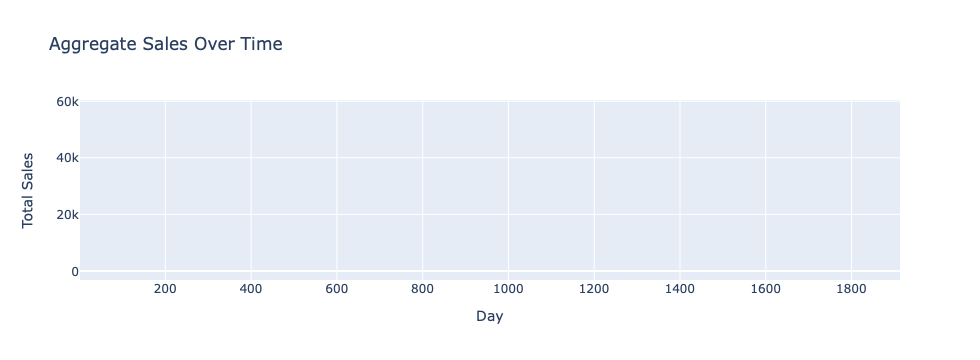

In [23]:
# convert 'day' column to numeric to aggregate sales properly
sales_train_long['day'] = sales_train_long['day'].str.extract('(\d+)').astype(int)

# aggregate sales across all items, stores, categories and departments by day
agg_sales = sales_train_long.groupby('day')['sales'].sum().reset_index()

# plot the aggregated daily sales
fig = px.line(agg_sales, x='day', y='sales',
              title='Aggregate Sales Over Time',
              labels={'sales': 'Total Sales', 'day': 'Day'})
fig.update_xaxes(title_text='Day')
fig.update_yaxes(title_text='Total Sales')
fig.show() # interactive plot that allows for zooming, panning and scalling

### Monthly Aggregate Sales per State <a id='Monthly_Aggregate_Sales_per_State'></a>

In [24]:
# merge the sales data with the calendar data to get date information
calendar['d'] = calendar['d'].str.replace('d_', '').astype(int)
sales_with_date = pd.merge(sales_train_long, calendar, left_on='day', right_on='d')

# convert 'date' to datetime and extract month and year
sales_with_date['date'] = pd.to_datetime(sales_with_date['date'])
sales_with_date['month'] = sales_with_date['date'].dt.month
sales_with_date['year'] = sales_with_date['date'].dt.year

# create a new 'month_year' column to aggregate sales on a monthly level
sales_with_date['month_year'] = sales_with_date['date'].dt.to_period('M')

In [25]:
# aggregate sales by state and month_year
monthly_sales_by_state = sales_with_date.groupby(['state_id', 'month_year'])['sales'].sum().reset_index()

# convert 'month_year' to string
monthly_sales_by_state['month_year'] = monthly_sales_by_state['month_year'].astype(str)

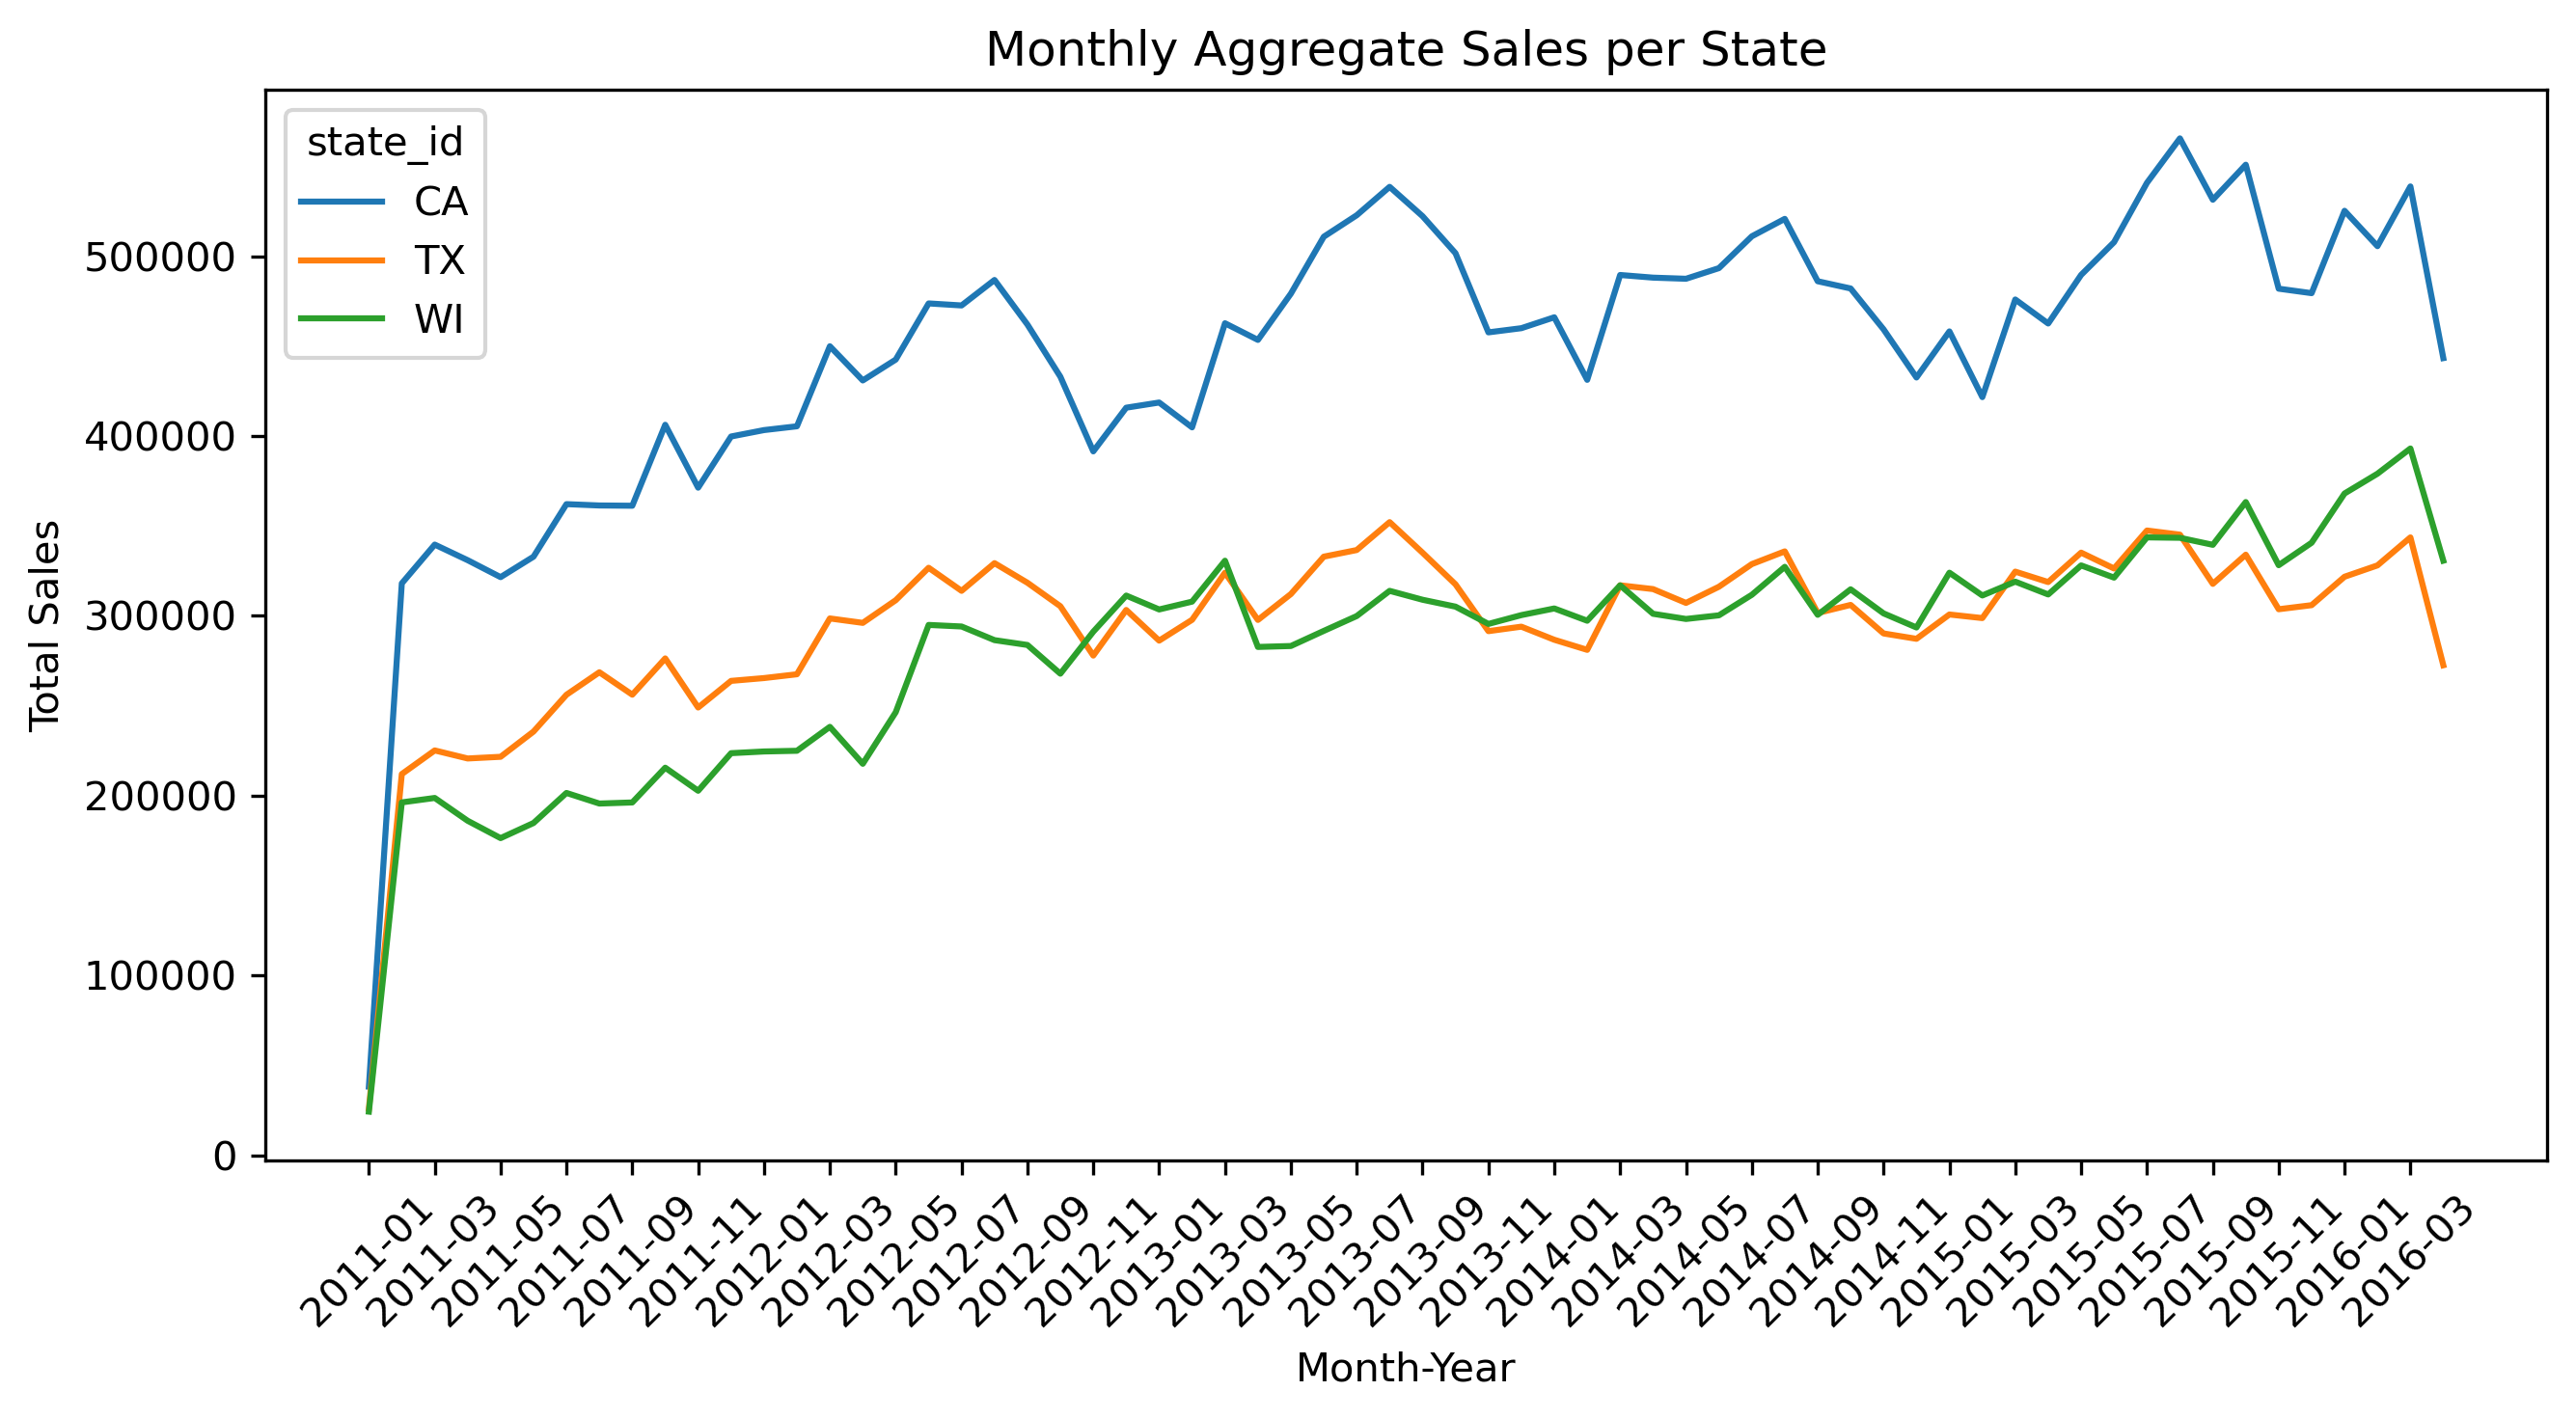

In [26]:
# plot the monthly sales by state

# create a figure
fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

# line plot for monthly sales by state
sns.lineplot(ax=ax, data=monthly_sales_by_state, x='month_year', y='sales', hue='state_id')
ax.set_title('Monthly Aggregate Sales per State')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Total Sales')
# customise x-axis labels for readability
month_years = monthly_sales_by_state['month_year'].unique()
ax.set_xticks(month_years[::2])  # set x-ticks to every 2 months
ax.set_xticklabels(month_years[::2], rotation=45)

# adjust layout and show plot
plt.tight_layout()
plt.show()

### Monthly Aggregate Sales per Store <a id='Monthly_Aggregate_Sales_per_Store'></a>

In [27]:
# aggregate sales by store and month_year
monthly_sales_by_store = sales_with_date.groupby(['store_id', 'month_year'])['sales'].sum().reset_index()

# convert 'month_year' to string
monthly_sales_by_store['month_year'] = monthly_sales_by_store['month_year'].astype(str)

In [28]:
# get unique stores and states
stores = monthly_sales_by_store['store_id'].unique()
states = ['CA', 'TX', 'WI']

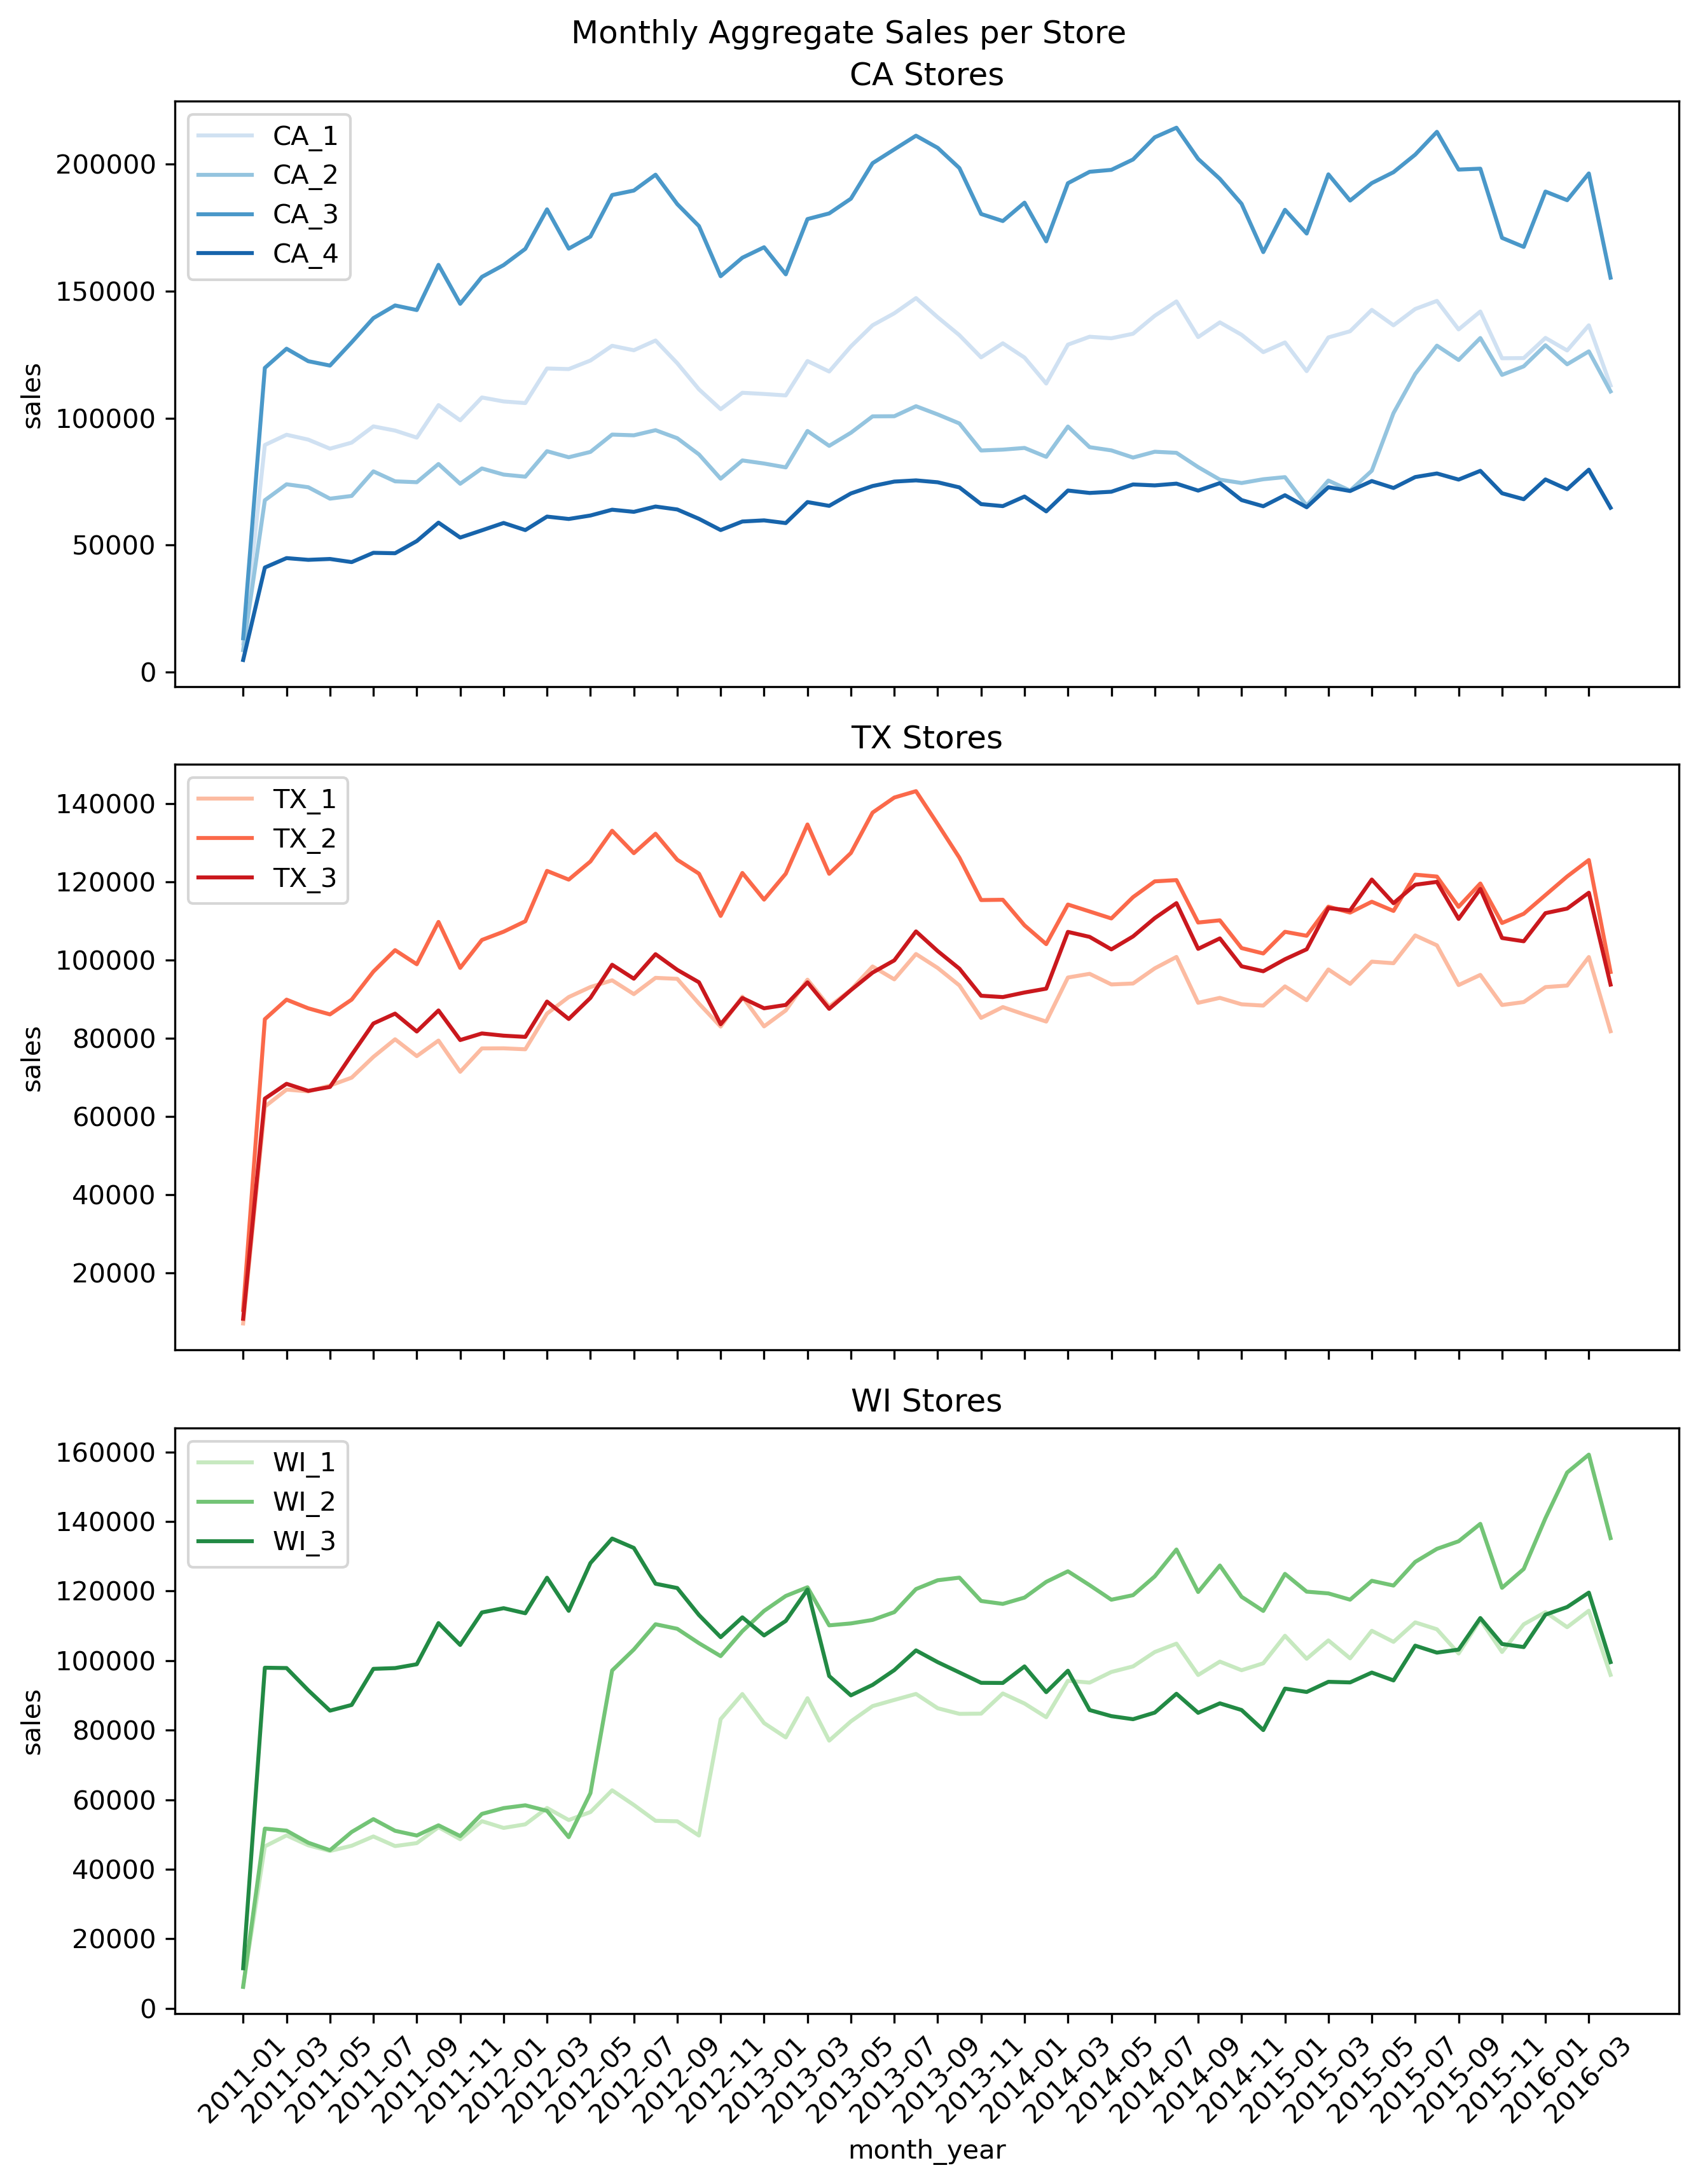

In [29]:
# plot the monthly sales by store

# create a figure with subplots: 1 row, 3 columns
fig, axes = plt.subplots(3, 1, figsize=(9, 12), dpi=300, sharex=True)

# create custom color palettes for each state that vary by store
color_palettes = {
    'CA': sns.color_palette('Blues', n_colors=4),
    'TX': sns.color_palette('Reds', n_colors=3),
    'WI': sns.color_palette('Greens', n_colors=3)
}

# get the unique months and sort them, only display every other month
unique_months = sorted(monthly_sales_by_store['month_year'].unique())
visible_months = unique_months[::2]

# plot each state's stores in a different subplot
for ax, state in zip(axes, states):
    # filter for the current state's stores
    state_stores = [store for store in stores if store.startswith(state)]
    state_data = monthly_sales_by_store[monthly_sales_by_store['store_id'].isin(state_stores)]
    # set the palette to the current state's palette
    palette = color_palettes[state]
    # use seaborn lineplot
    sns.lineplot(ax=ax, data=state_data, x='month_year', y='sales', hue='store_id', palette=palette)
    # remove the legend title
    ax.legend(title=None)
    # set x-axis to show every other month
    ax.set_xticks(visible_months)
    ax.set_xticklabels(visible_months, rotation=45)
    # set the title for each subplot to the state name
    ax.set_title(f'{state} Stores')

# set title
fig.suptitle('Monthly Aggregate Sales per Store')

# adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### Monthly Aggregate Sales per Category <a id='Monthly_Aggregate_Sales_per_Category'></a>

In [30]:
# aggregate sales by category and month_year
monthly_sales_by_category = sales_with_date.groupby(['cat_id', 'month_year'])['sales'].sum().reset_index()

# aggregate total counts by category
total_counts_by_category = sales_with_date.groupby('cat_id').size().reset_index(name='total_counts')

# convert 'month_year' to string
monthly_sales_by_category['month_year'] = monthly_sales_by_category['month_year'].astype(str)

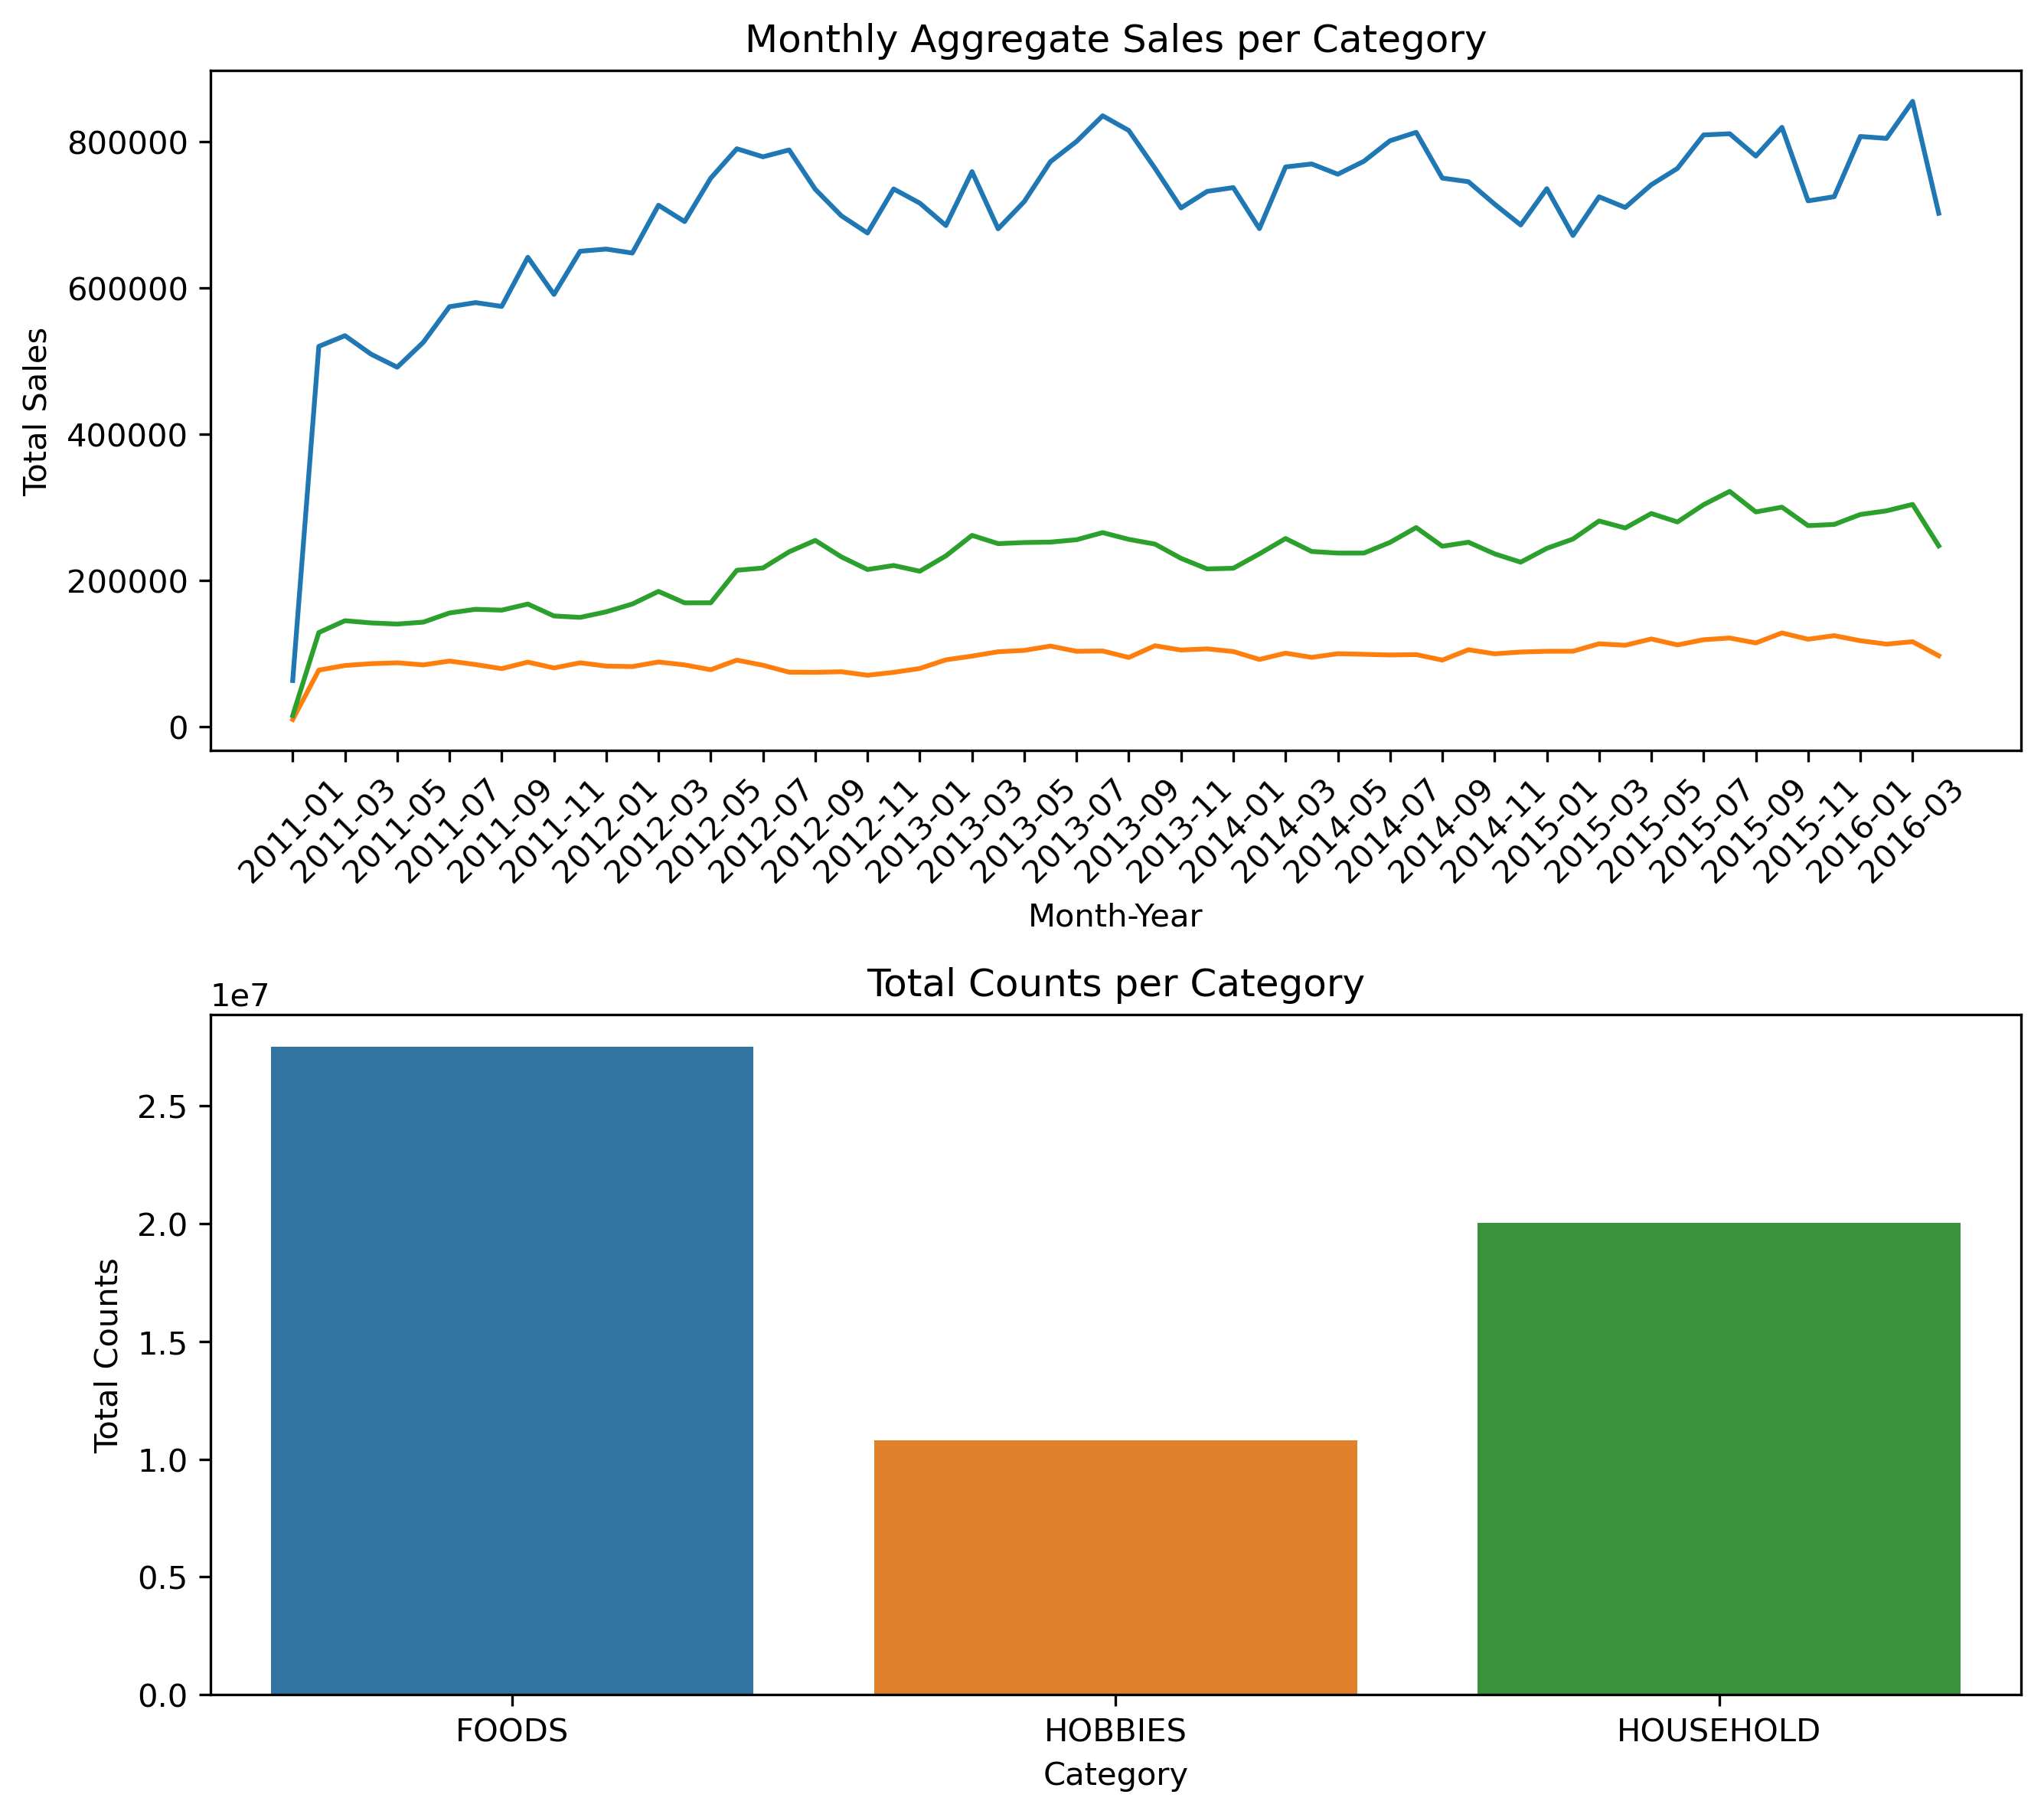

In [31]:
# plot the monthly sales by category and a count of all category occurences

# create a figure with subplots: 2 rows, 1 column
fig = plt.figure(figsize=(9, 8), dpi=300)

# line plot for monthly sales by category
ax1 = fig.add_subplot(2, 1, 1)
sns.lineplot(ax=ax1, data=monthly_sales_by_category, x='month_year', y='sales', hue='cat_id', legend=False)
ax1.set_title('Monthly Aggregate Sales per Category')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Sales')
# customise x-axis labels for readability
month_years = monthly_sales_by_category['month_year'].unique()
ax1.set_xticks(month_years[::2])  # set x-ticks to every 2 months
ax1.set_xticklabels(month_years[::2], rotation=45)

# bar plot for total counts by category
ax2 = fig.add_subplot(2, 1, 2)
sns.barplot(ax=ax2, data=total_counts_by_category, x='cat_id', y='total_counts')
ax2.set_title('Total Counts per Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Total Counts')

# adjust layout and show plot
plt.tight_layout()
plt.show()

### Monthly Aggregate Sales per Department <a id='Monthly_Aggregate_Sales_per_Department'></a>

In [32]:
# aggregate sales by department, state, and month_year
monthly_sales_by_dept_state = sales_with_date.groupby(['dept_id', 'state_id', 'month_year'])['sales'].sum().reset_index()

# convert 'month_year' to string
monthly_sales_by_dept_state['month_year'] = monthly_sales_by_dept_state['month_year'].astype(str)

In [33]:
# get unique departments and states
departments = monthly_sales_by_dept_state['dept_id'].unique()
states = ['CA', 'TX', 'WI']

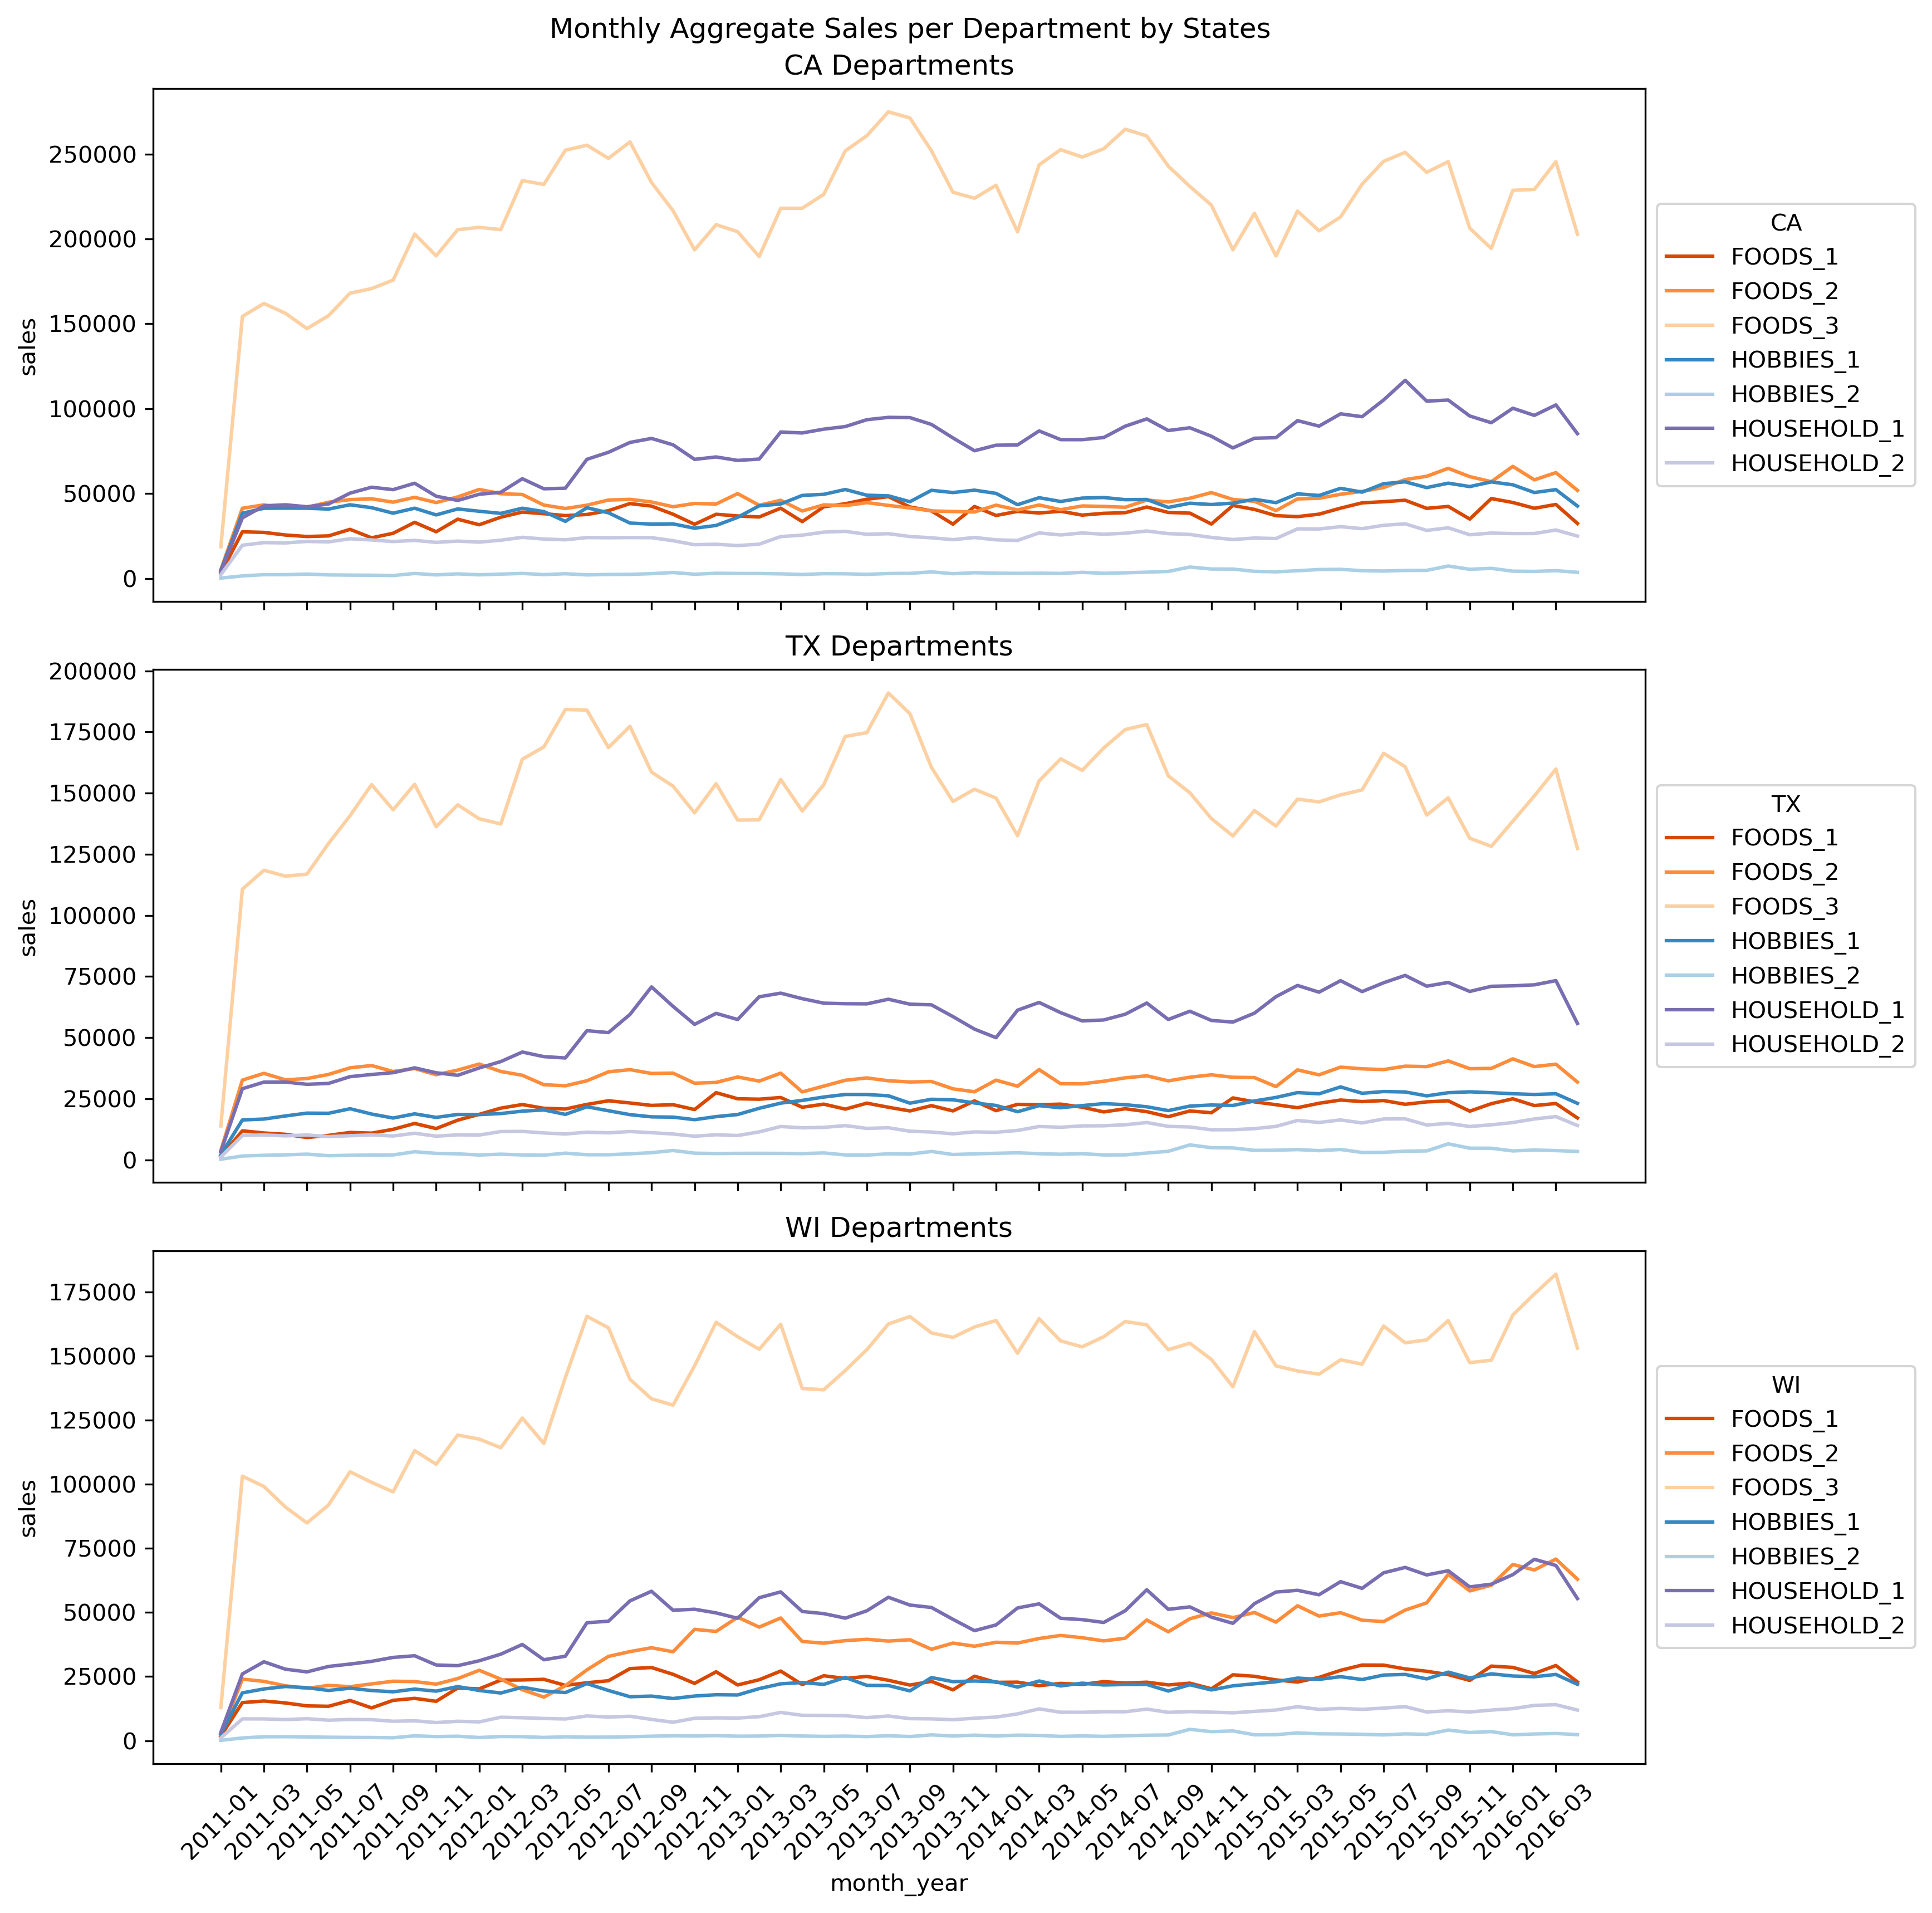

In [34]:
# plot the monthly sales by department

# create a figure with subplots: 1 row, 3 columns
fig, axes = plt.subplots(3, 1, figsize=(11, 12), dpi=300, sharex=True)

# create custom color palettes for each category that vary by department
category_colors = {
    'FOODS': sns.color_palette("Oranges", n_colors=3),
    'HOBBIES': sns.color_palette("Blues", n_colors=2),
    'HOUSEHOLD': sns.color_palette("Purples", n_colors=2)
}
# map each department to its category's color palette
dept_color_mapping = {}
for dept in monthly_sales_by_dept_state['dept_id'].unique():
    for category, palette in category_colors.items():
        if dept.startswith(category):
            dept_color_mapping[dept] = palette.pop()

# get the unique months and sort them, only display every other month
unique_months = sorted(monthly_sales_by_dept_state['month_year'].unique())
visible_months = unique_months[::2]

# plot each state's departments in a different subplot
for ax, state in zip(axes, states):
    # filter for the current state's departments
    state_data = monthly_sales_by_dept_state[monthly_sales_by_dept_state['state_id'] == state]
    # set the palette to the current state's palette
    palette = category_colors[category]
    # use seaborn lineplot
    sns.lineplot(ax=ax, data=state_data, x='month_year', y='sales', hue='dept_id', palette=dept_color_mapping)
    # remove the legend title and move legend to the right
    ax.legend(title=state, loc='center left', bbox_to_anchor=(1, 0.5))
    # set x-axis to show every other month
    ax.set_xticks(visible_months)
    ax.set_xticklabels(visible_months, rotation=45)
    # set the title for each subplot to the state name
    ax.set_title(f'{state} Departments')
    
# set title
fig.suptitle('Monthly Aggregate Sales per Department by States')

# adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.subplots_adjust(right=0.9)
plt.show()

### Seasonality Impact <a id='Seasonality_Impact'></a>

<li>Yearly Seasonalities</li> <a id='Yearly_Seasonalities'></a>

In [35]:
# aggregate the total sales data
total_sales = sales_with_date.groupby('date')['sales'].sum().reset_index()

# apply LOESS smoothing to the time series data to model the trend
loess_estimated = lowess(total_sales['sales'], np.arange(len(total_sales)), frac=0.5)

# extract the smoothed values
total_sales['loess'] = loess_estimated[:, 1]

# calculate the relative sales
total_sales['sales_rel'] = total_sales['sales'] - total_sales['loess']

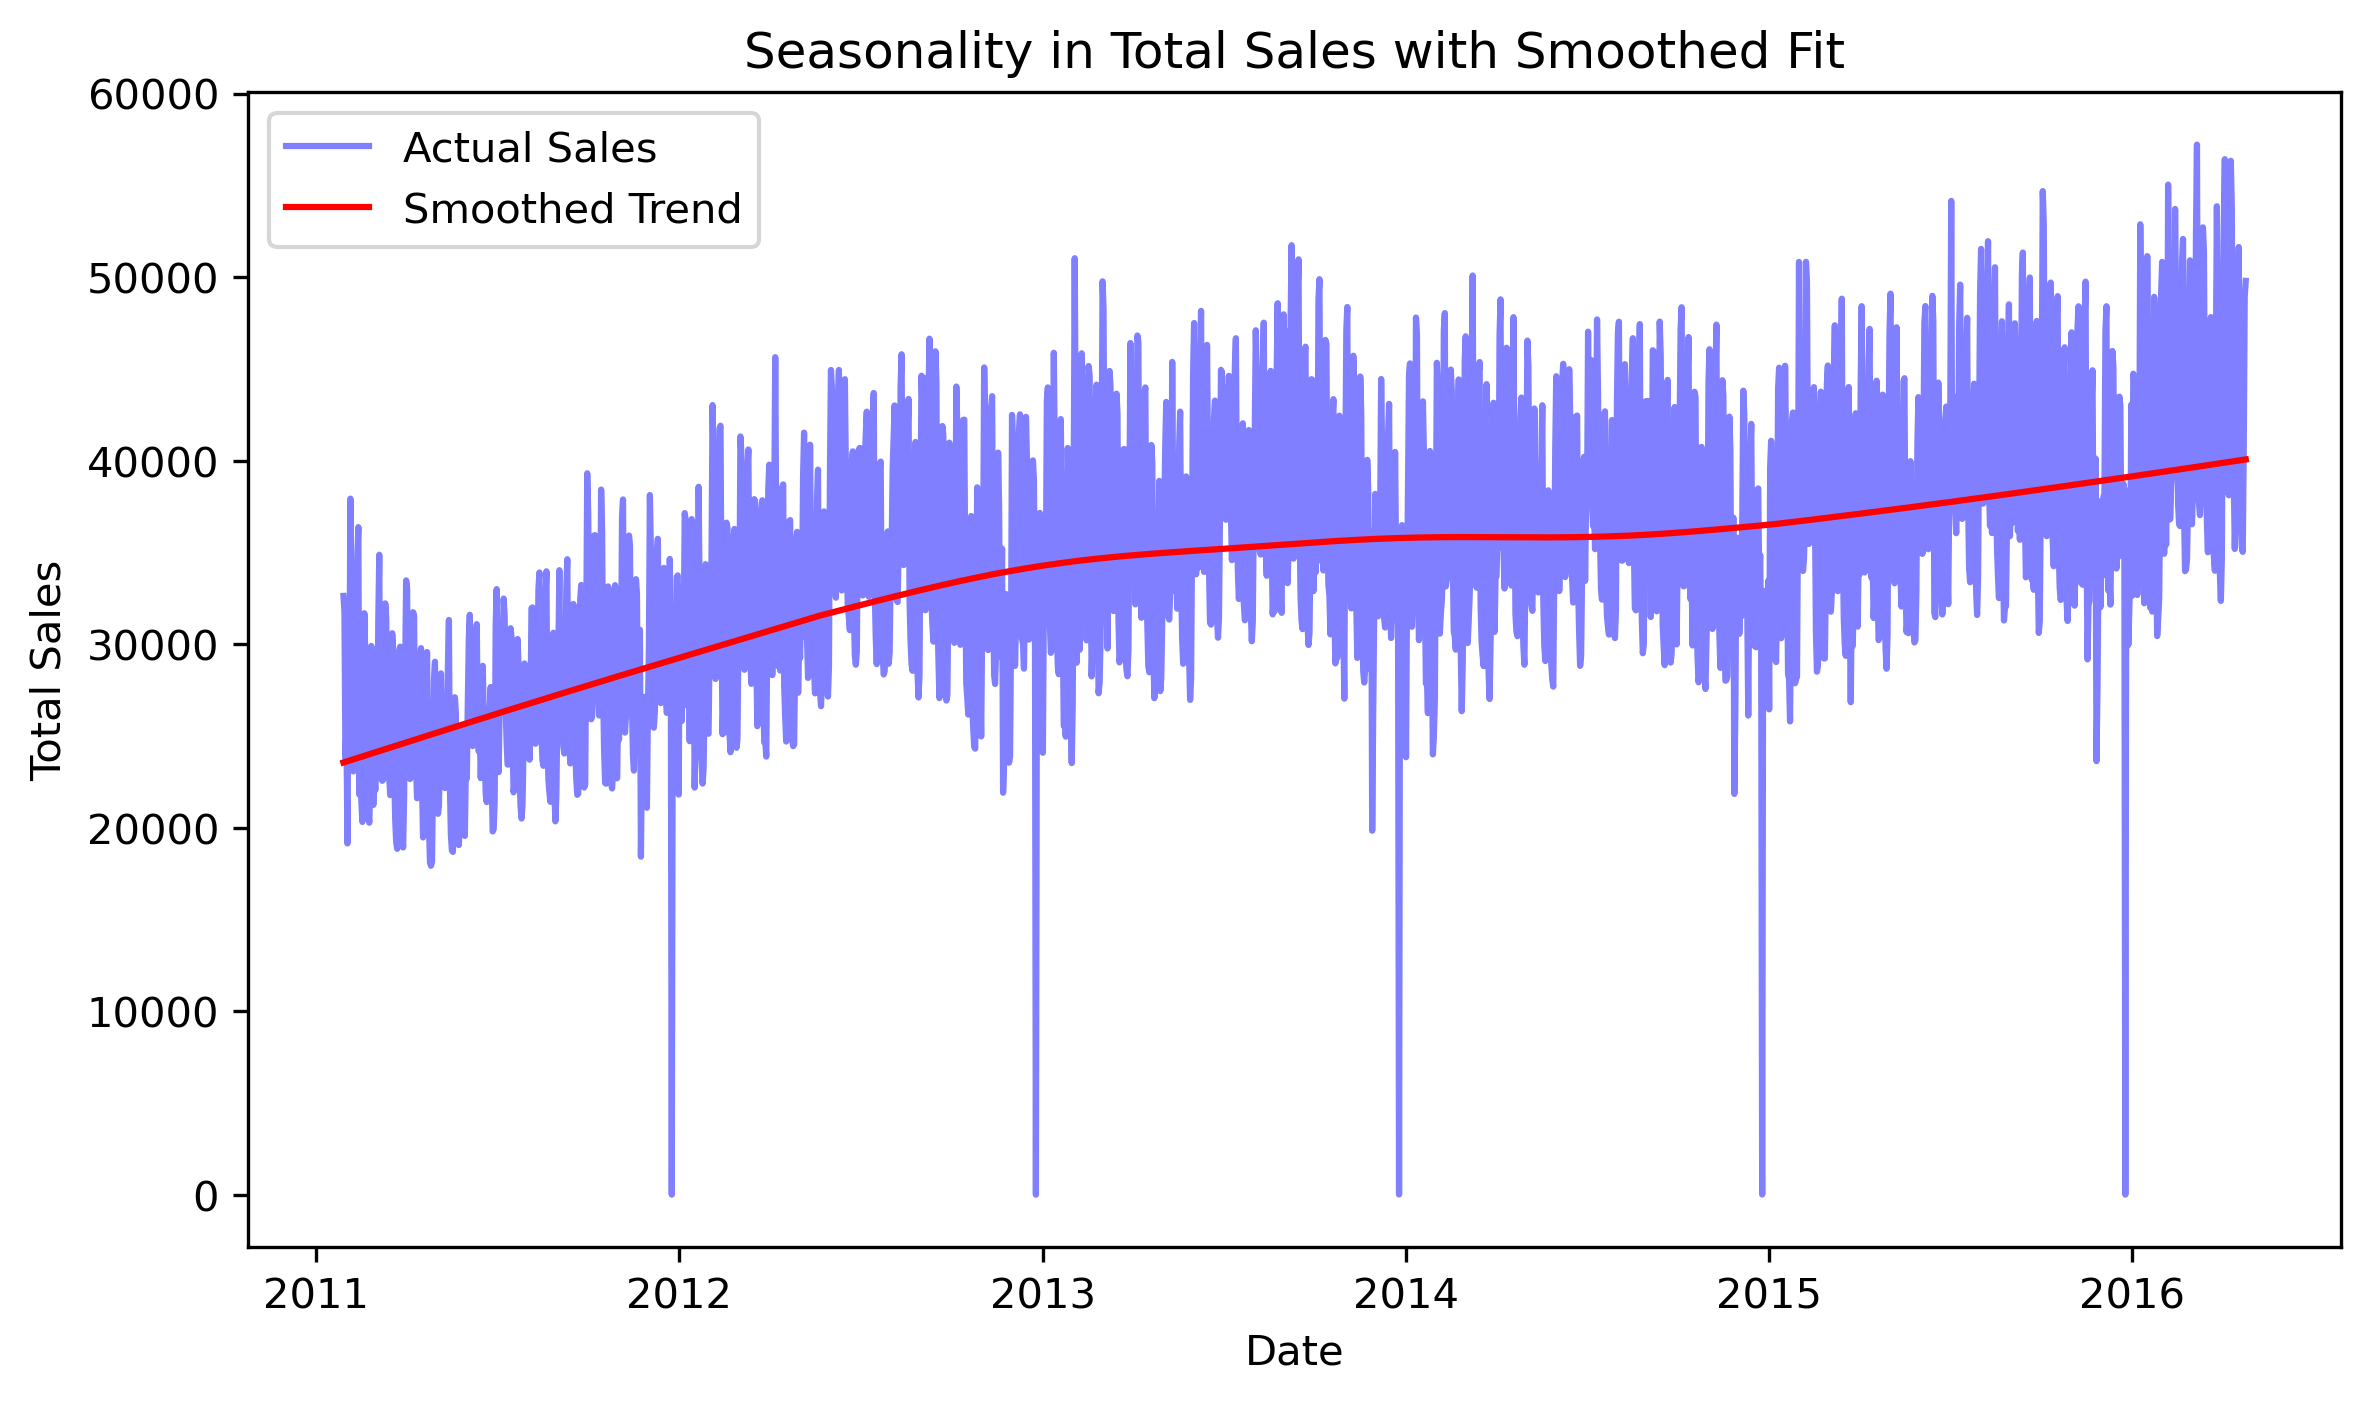

In [36]:
# plot the original sales data and the smoothed trend

# create a figure
plt.figure(figsize=(9, 5), dpi=300)

# plot the actual sales data and overlay the smoothed trend line
sns.lineplot(data=total_sales, x='date', y='sales', label='Actual Sales', color='blue', alpha=0.5)
sns.lineplot(data=total_sales, x='date', y='loess', label='Smoothed Trend', color='red')

# set title and labels
plt.title('Seasonality in Total Sales with Smoothed Fit')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# show plot
plt.legend()
plt.show()

<li>Monthly and Weekly Seasonalities</li> <a id='Monthly_and_Weekly_Seasonalities'></a>

In [37]:
# create columns for day of the week and month
total_sales['day_of_week'] = total_sales['date'].dt.day_name()
total_sales['month'] = total_sales['date'].dt.month_name()

# calculate the weekly average relative sales
weekly_sales = total_sales.groupby(['month', 'day_of_week'])['sales_rel'].mean().reset_index()

# pivot the data to get a matrix form suitable for a heatmap
sales_pivot = weekly_sales.pivot("day_of_week", "month", "sales_rel")

# sort the table to have months in chronological order and days in week order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot.reindex(index=day_order, columns=month_order)

/var/folders/wp/pqljjf2948xcm00y0g650yvc0000gn/T/ipykernel_40308/4226101462.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



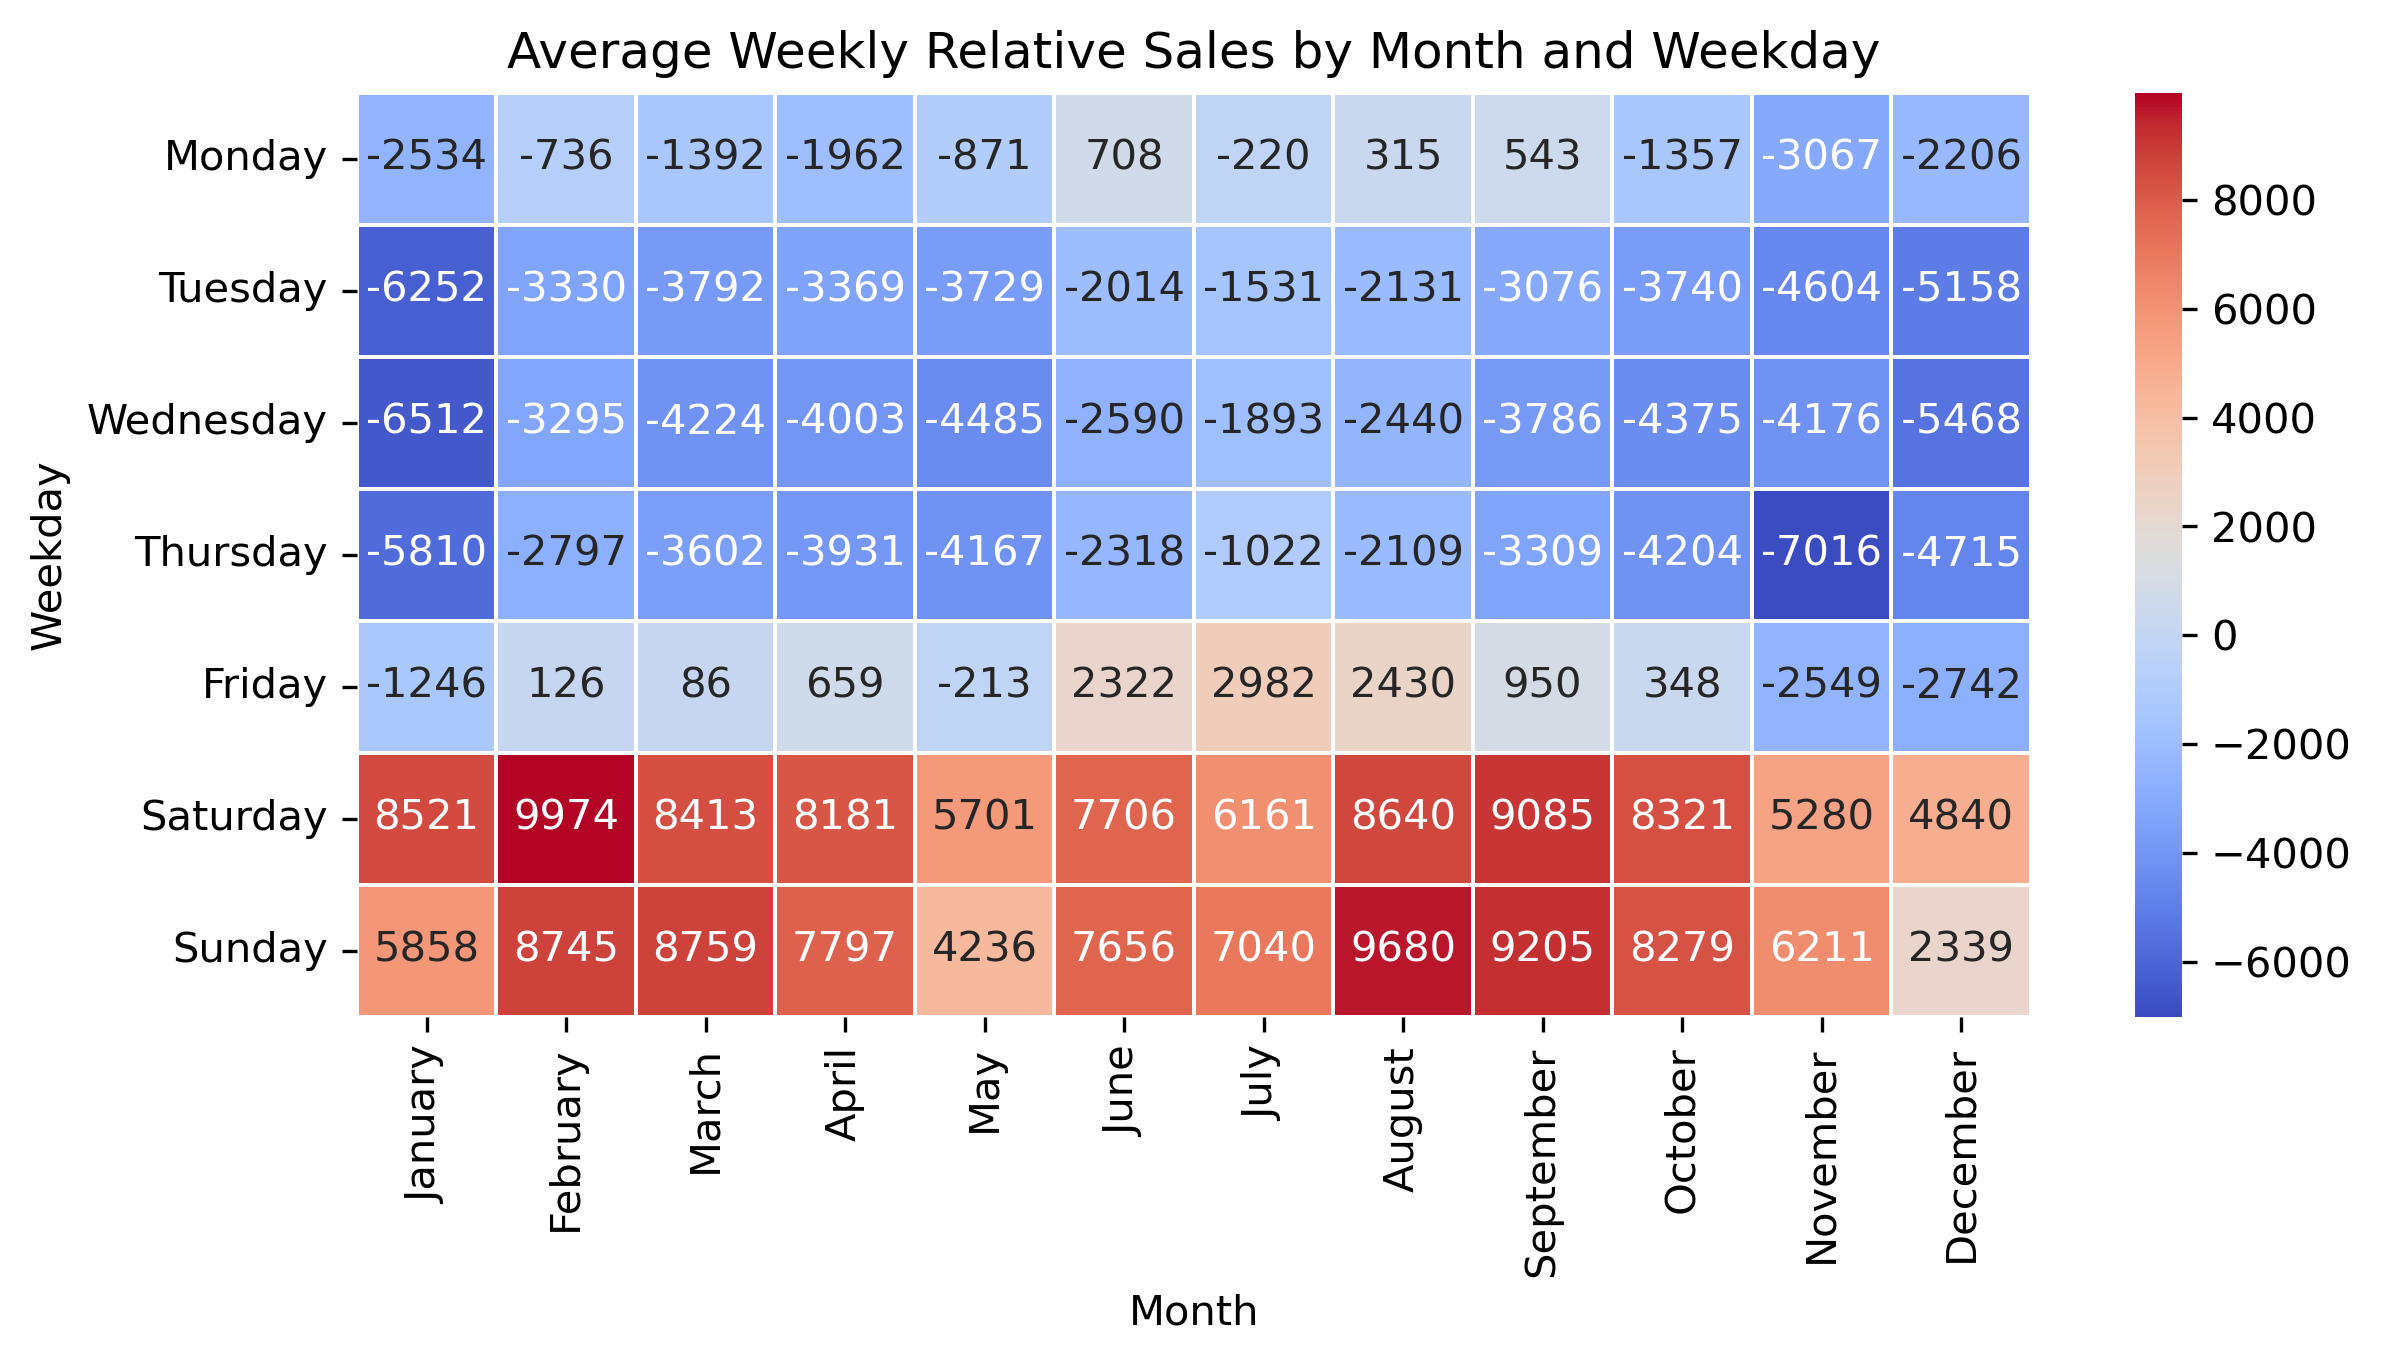

In [38]:
# plot the monthly and weekly sales as heatmap

# create a figure
plt.figure(figsize=(9, 4), dpi=300)

# plot the headmap with relative sales annotated
sns.heatmap(sales_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=.5)

# set title and labels
plt.title('Average Weekly Relative Sales by Month and Weekday')
plt.xlabel('Month')
plt.ylabel('Weekday')

# show plot
plt.show()

<li>Yearly Seasonalities by State</li> <a id='Yearly_Seasonalities_by_State'></a>

In [39]:
# aggregate the total sales data by state and date
state_sales = sales_with_date.groupby(['state_id', 'date'])['sales'].sum().reset_index()

# create helper function to apply LOESS smoothing and extract smoothed values
def apply_loess_smoothing(group, frac=0.5):
    loess_result = lowess(group['sales'], np.arange(len(group)), frac=frac)
    group['loess'] = loess_result[:, 1]
    return group

# apply the smoothing function to each state's sales data
state_sales = state_sales.groupby('state_id').apply(apply_loess_smoothing)

/var/folders/wp/pqljjf2948xcm00y0g650yvc0000gn/T/ipykernel_40308/4237324346.py:11: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



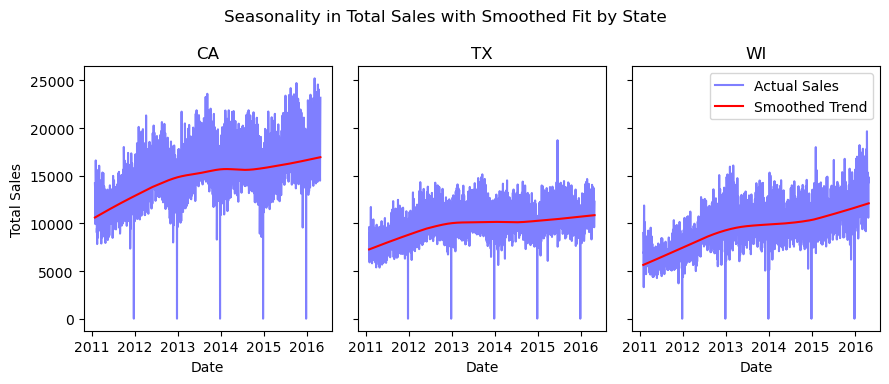

In [40]:
# plot the original sales data and the smoothed trend for each state

# create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharex=True, sharey=True)

# plot actual sales data and overlay the smoothed trend line for each state
for i, (ax, (state, state_group)) in enumerate(
    zip(axes, state_sales.groupby('state_id'))):
    sns.lineplot(ax=ax, data=state_group, x='date', y='sales', label='Actual Sales', color='blue', alpha=0.5)
    sns.lineplot(ax=ax, data=state_group, x='date', y='loess', label='Smoothed Trend', color='red')
    
    # set title and labels
    ax.set_title(f'{state}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.legend()
    # remove first two legend
    if i < 2:
        ax.legend().remove()

# set title
fig.suptitle('Seasonality in Total Sales with Smoothed Fit by State')

# adjust the layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

<li>Yearly Seasonalities by Category</li> <a id='Yearly_Seasonalities_by_Category'></a>

In [41]:
# aggregate the total sales data by category and date
category_sales = sales_with_date.groupby(['cat_id', 'date'])['sales'].sum().reset_index()

# apply the smoothing function to each state's sales data
category_sales = category_sales.groupby('cat_id').apply(apply_loess_smoothing)

/var/folders/wp/pqljjf2948xcm00y0g650yvc0000gn/T/ipykernel_40308/907444513.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



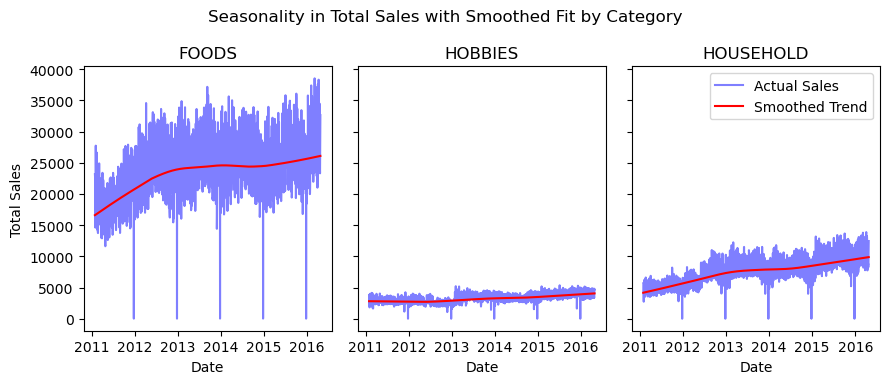

In [42]:
# plot the original sales data and the smoothed trend for each category

# create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharex=True, sharey=True)

# plot the actual sales data and overlay the smoothed trend line for each category
for i, (ax, (category, category_group)) in enumerate(
    zip(axes, category_sales.groupby('cat_id'))):
    sns.lineplot(ax=ax, data=category_group, x='date', y='sales', label='Actual Sales', color='blue', alpha=0.5)
    sns.lineplot(ax=ax, data=category_group, x='date', y='loess', label='Smoothed Trend', color='red')
    
    # set title and labels
    ax.set_title(f'{category}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Sales')
    ax.legend()
    # remove first two legend
    if i < 2:
        ax.legend().remove()

# set title
fig.suptitle('Seasonality in Total Sales with Smoothed Fit by Category')

# adjust the layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

### Additional Explanatory Variables <a id='Additional_Explanatory_Variables'></a>

<li>Calendar</li> <a id='Calendar'></a>

Event Days vs. Non-Event Days Distribution <a id='Event_Days_vs._Non-Event_Days_Distribution'></a>

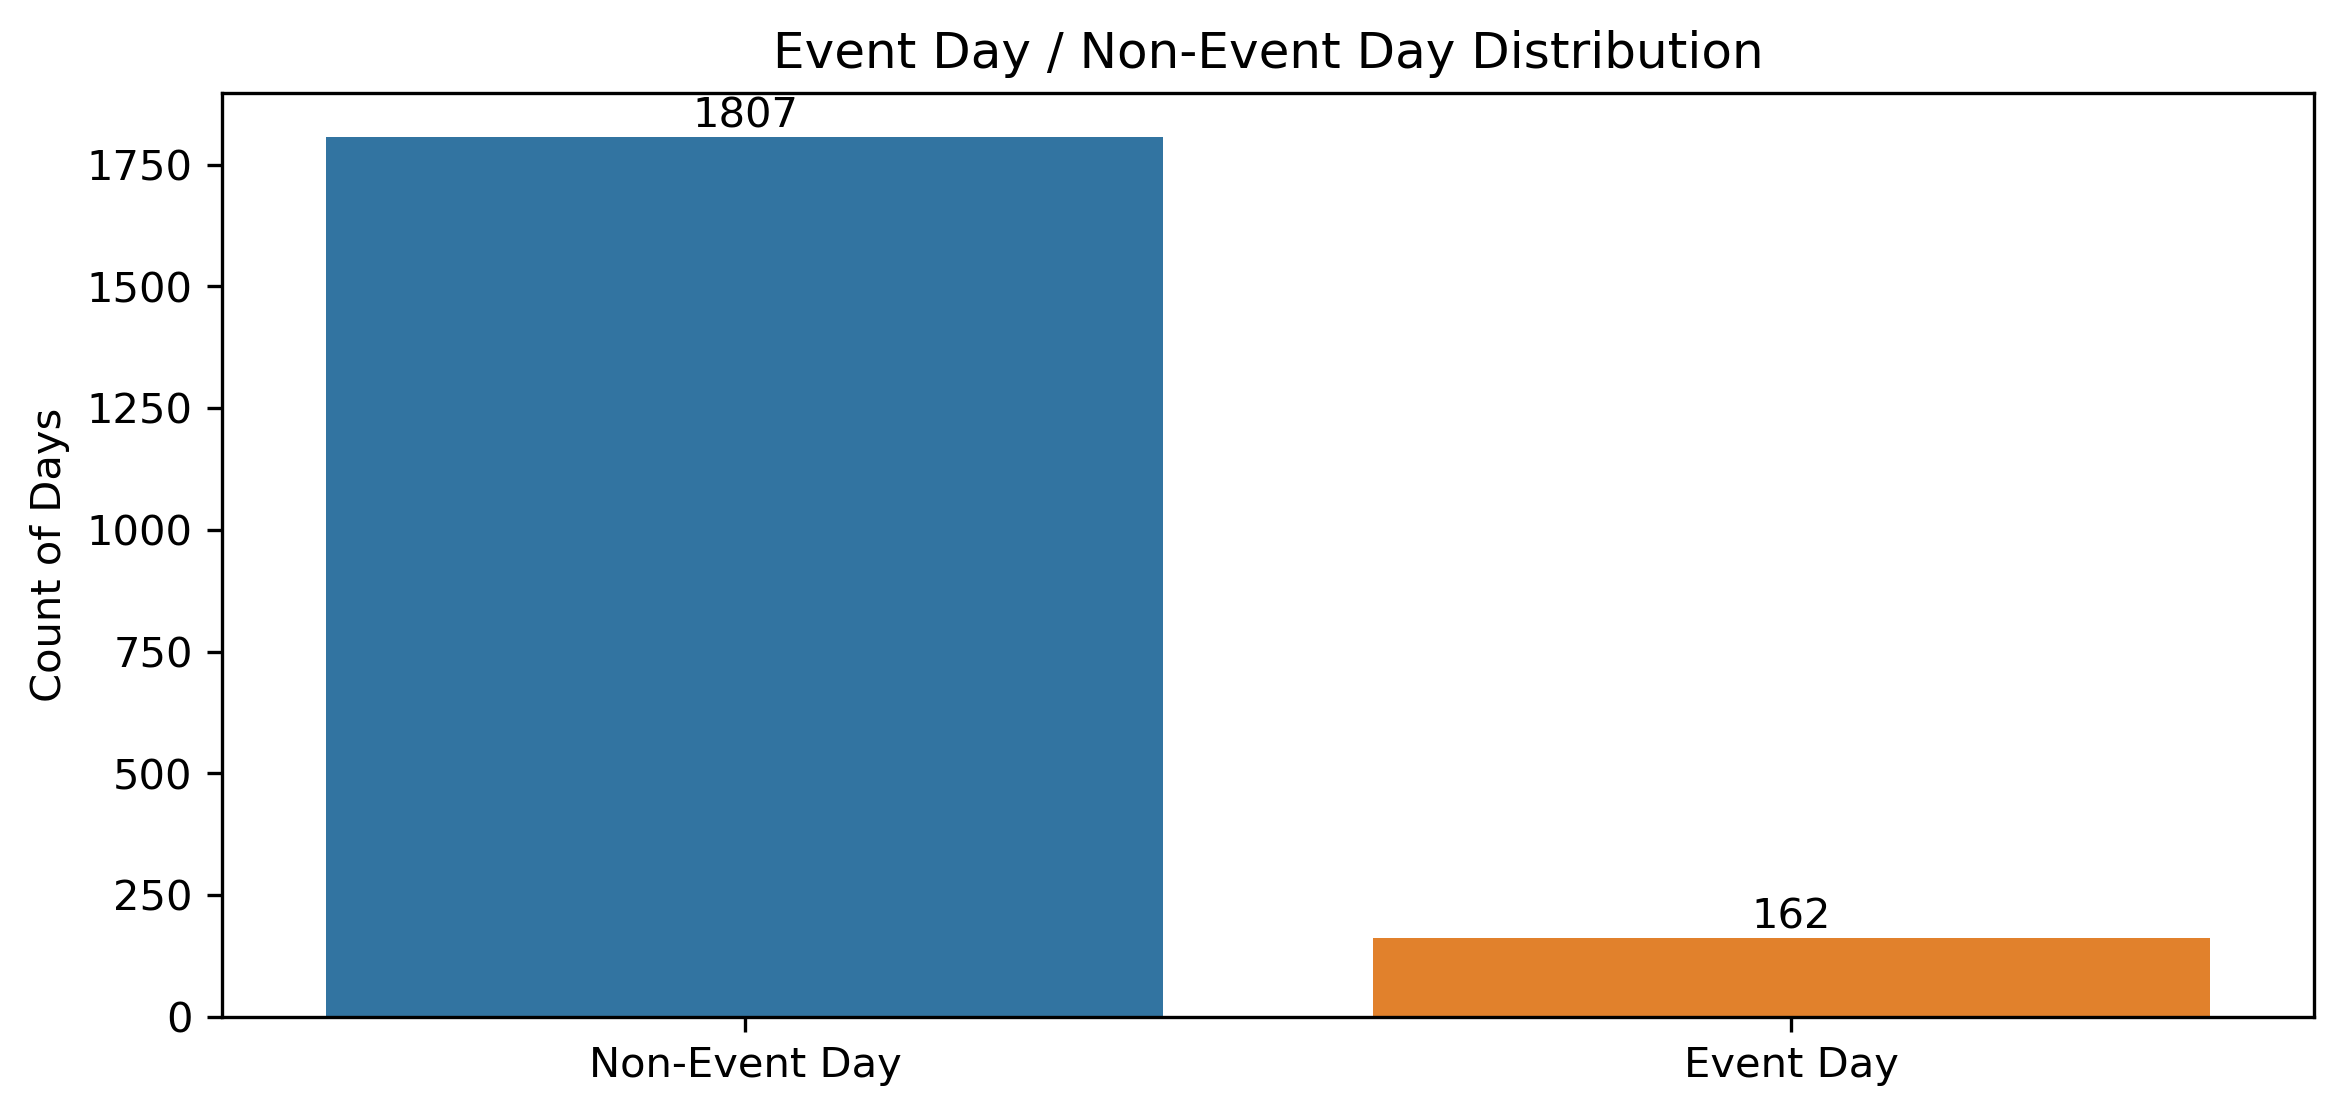

In [43]:
# create a new column 'is_event_day' to indicate if the day is an event day
calendar['is_event_day'] = (calendar['event_name_1'].notna()) | (calendar['event_name_2'].notna())

# count the number of event days and non-event days
event_day_counts = calendar['is_event_day'].value_counts().rename(index={True: 'Event Day', False: 'Non-Event Day'})

# plot the distribution of event days and non-event days
plt.figure(figsize=(9, 4), dpi=300)
event_day_bar = sns.barplot(x=event_day_counts.index, y=event_day_counts.values)
# annotate counts above bars
for p in event_day_bar.patches:
    event_day_bar.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Event Day / Non-Event Day Distribution')
plt.ylabel('Count of Days')
plt.show()

Types of Event Distribution <a id='Types_of_Event_Distribution'></a>

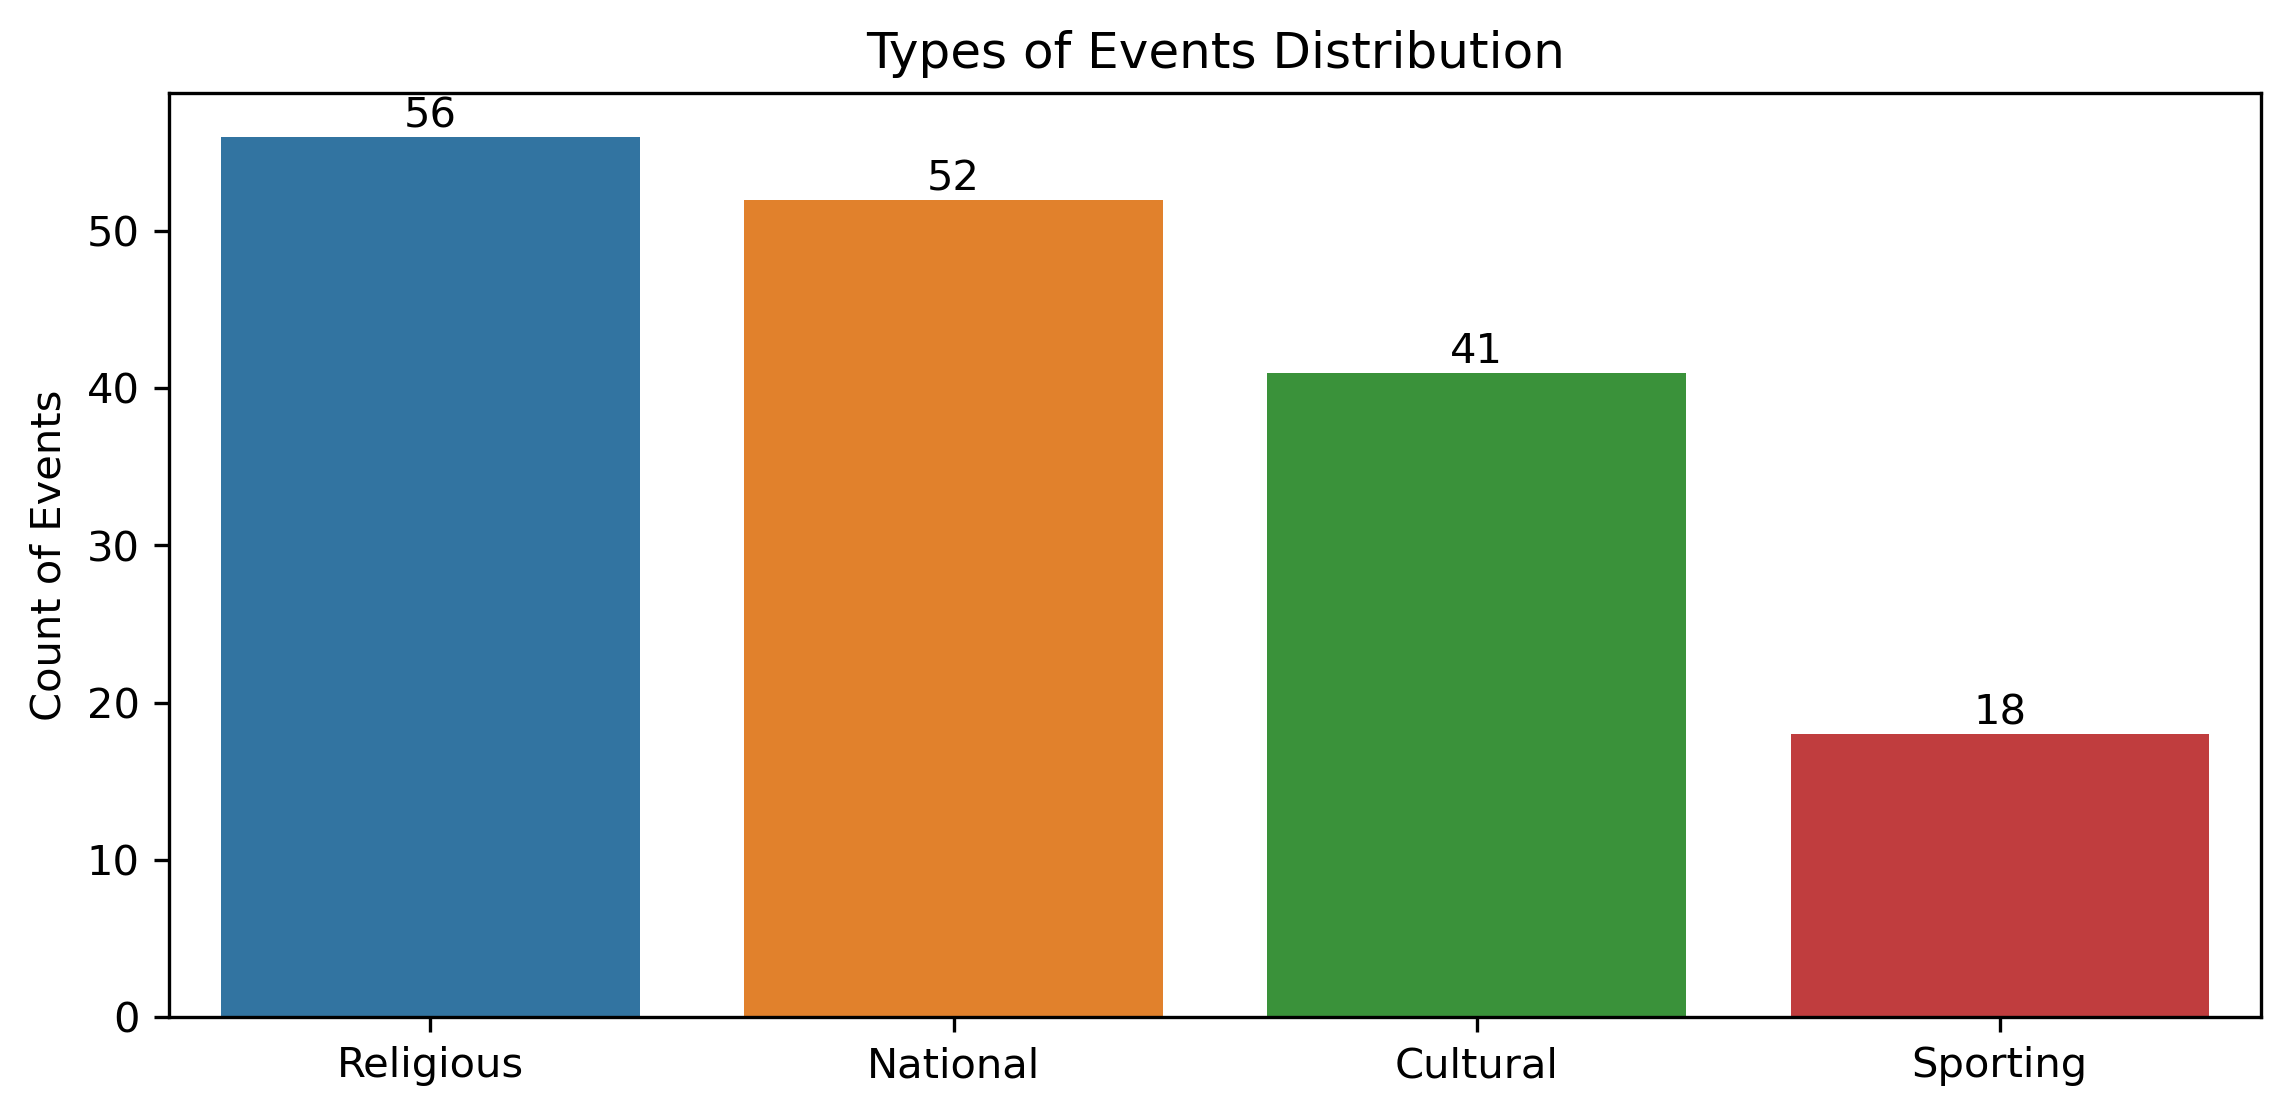

In [44]:
# concatenate event_type_1 and event_type_2 to get all event types
all_event_types = pd.concat([calendar['event_type_1'].dropna(), calendar['event_type_2'].dropna()])

# count the occurrences of each event type
event_type_counts = all_event_types.value_counts()

# plot the distribution of different types of events
plt.figure(figsize=(9, 4), dpi=300)
event_type_bar = sns.barplot(x=event_type_counts.index, y=event_type_counts.values)
# annotate counts above bars
for p in event_type_bar.patches:
    event_type_bar.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Types of Events Distribution')
plt.ylabel('Count of Events')
plt.show()

SNAP Days vs. Non-SNAP Days Distribution <a id='SNAP_Days_vs._Non-SNAP_Days_Distribution'></a>

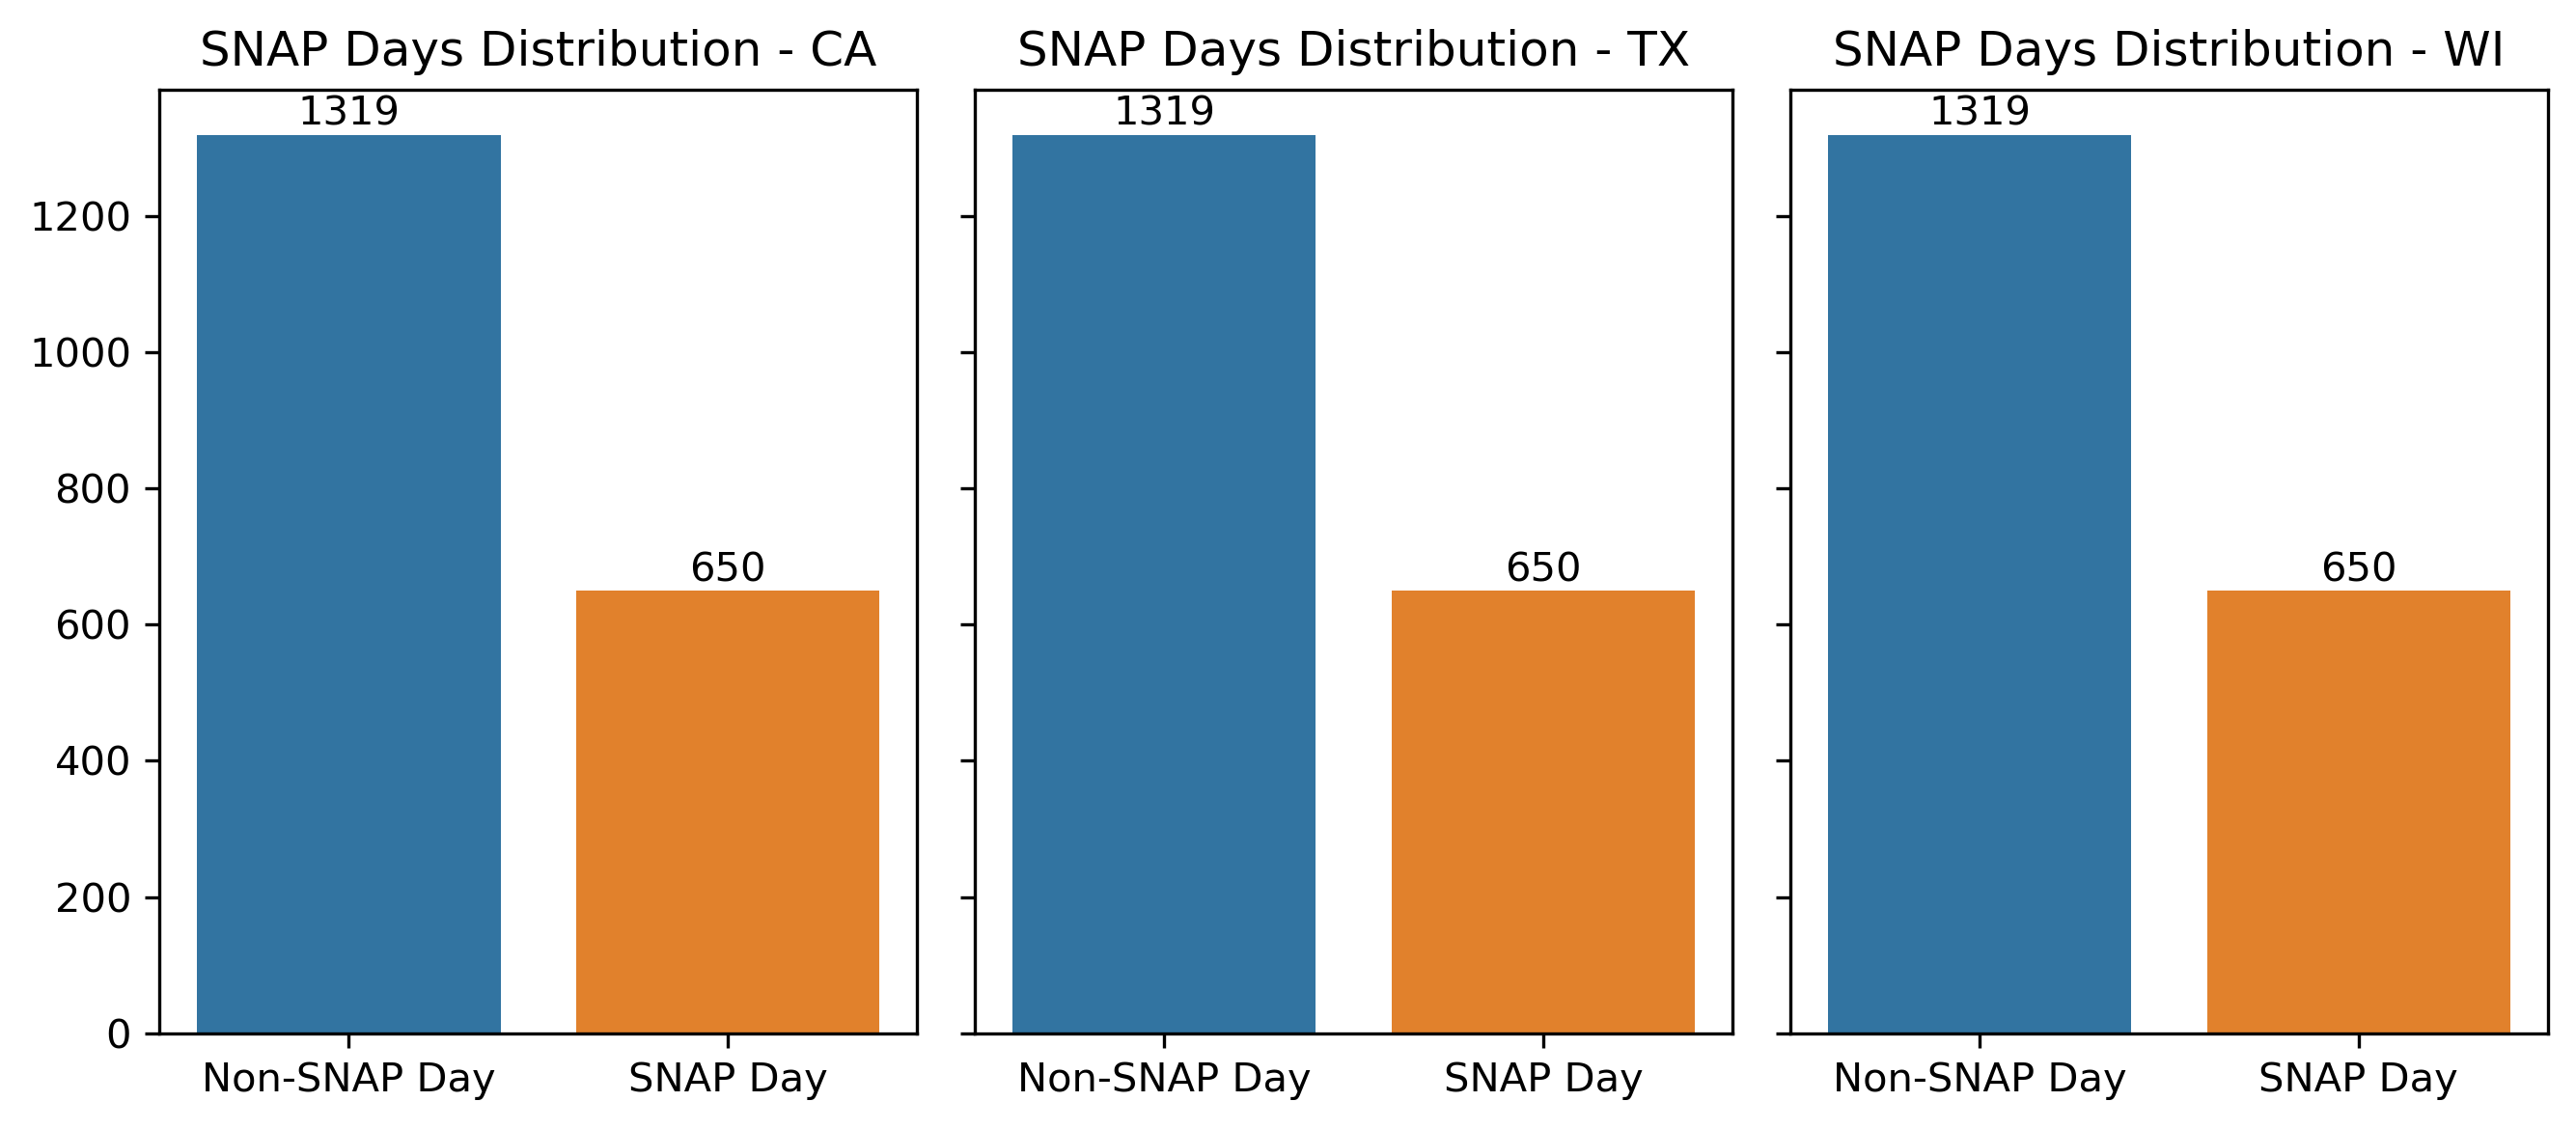

In [45]:
# unique states and corresponding SNAP columns in the calendar dataset
states = ['CA', 'TX', 'WI']
snap_columns = ['snap_CA', 'snap_TX', 'snap_WI']

# plot the distribution of SNAP days and non-SNAP days
fig, axes = plt.subplots(1, 3, figsize=(9, 4), dpi=300, sharey=True)
for ax, state, snap_col in zip(axes, states, snap_columns):
    # count SNAP and Non-SNAP days
    snap_counts = calendar[snap_col].value_counts().rename(
    index={1: 'SNAP Day', 0: 'Non-SNAP Day'})
    
    snap_bar = sns.barplot(x=snap_counts.index, y=snap_counts.values, ax=ax)
    # annotate counts above bars
    for p in snap_bar.patches:
        snap_bar.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    # set title and labels
    ax.set_title(f'SNAP Days Distribution - {state}')
    ax.set_ylabel('Count' if state == 'California' else '')
    ax.set_xlabel('')

# adjust the layout and show plot
plt.tight_layout()
plt.show()

<li>Item Prices</li> <a id='Item_Prices'></a>

Average Price Distribution Over Time by Category <a id='Average_Price_Distribution_Over_Time_by_Category'></a>

In [46]:
# extract the unique item_id and cat_id pair
item_categories = sales_train_long[['item_id', 'cat_id']].drop_duplicates()

# merge prices dataset with item categories to get the category of each item
prices_with_cat = pd.merge(prices, item_categories, on='item_id', how='left')

# merge with the calendar dataset to get the dates for wm_yr_wk
prices_with_cat_date = pd.merge(prices_with_cat, calendar[['wm_yr_wk', 'date']], on='wm_yr_wk', how='left')

# aggregate prices by category and date
avg_prices_over_time = prices_with_cat_date.groupby(['cat_id', 'date'])['sell_price'].mean().reset_index()

# convert date to datetime
avg_prices_over_time['date'] = pd.to_datetime(avg_prices_over_time['date'])

# aggregate data by month to reduce overplotting
avg_prices_over_time['month-year'] = avg_prices_over_time['date'].dt.to_period('M')
monthly_avg_prices = avg_prices_over_time.groupby(['cat_id', 'month-year'])['sell_price'].mean().reset_index()

# convert back to datetime for plotting
monthly_avg_prices['month-year'] = monthly_avg_prices['month-year'].dt.to_timestamp()

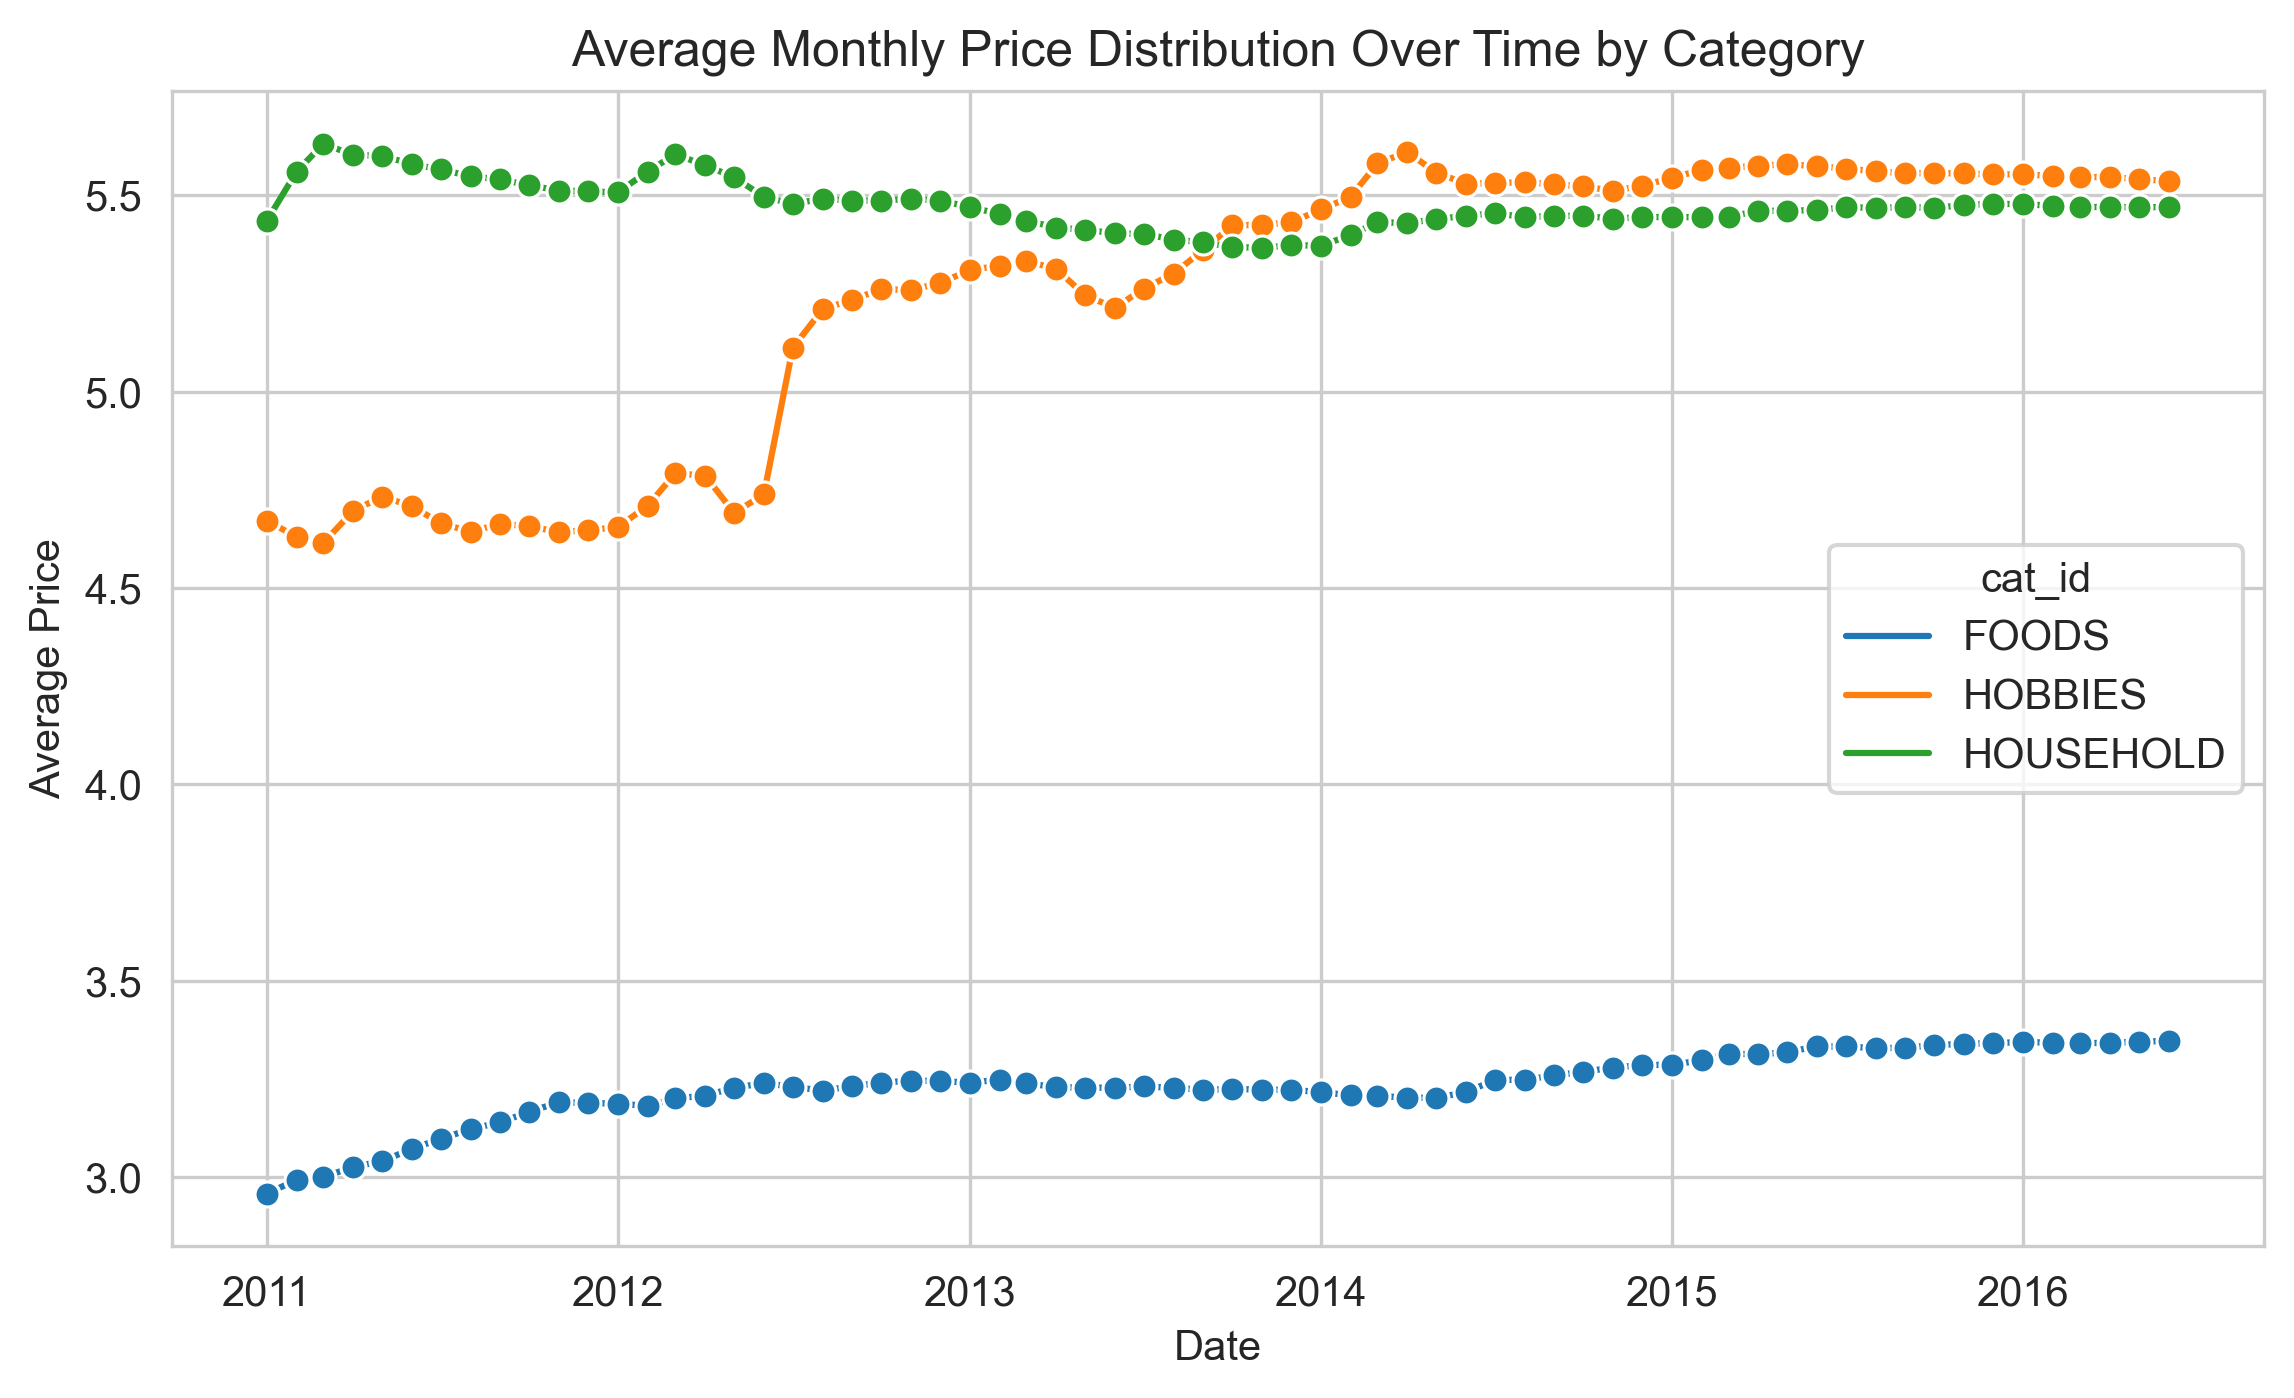

In [47]:
# plot the price distribution for each category
plt.figure(figsize=(9, 5), dpi=300)
sns.set_style("whitegrid")
sns.lineplot(data=monthly_avg_prices, x='month-year', y='sell_price', hue='cat_id', marker='o')
plt.title('Average Monthly Price Distribution Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

## Preprocessing <a id='Preprocessing'></a>

### Data Cleaning <a id='Data_Cleaning'></a>

<li>Melting Transformation</li> <a id='Melting_Transformation'></a>

In [48]:
# training data were already transformed using the helper funtion
sales_train_long

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
58327365    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
58327366    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
58327367    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
58327368    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
58327369    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id   day  sales  
0            CA_1       CA     1      0  
1            CA_1       CA     1      0  
2            CA_1       CA     1      0  
3            CA_1       CA     1      0  
4            CA_1       CA     1      0  
...           ...      ...   ...    ...  
58327365     WI_3       WI  1913      1  
58327366     WI_3       WI  1913      0  
58327367     WI_3       WI  1913      0  
58327368     WI_3       WI  1913      3  
58327369     WI_3       WI  1913      0  

[58327370 rows x 8 columns]

In [49]:
# transform the entire testing sales data
sales_test_long = melt_sales_data(sales_test)
sales_test_long

id        item_id    dept_id   cat_id  \
0       HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1       HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2       HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3       HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4       HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                               ...            ...        ...      ...   
853715    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
853716    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
853717    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
853718    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
853719    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

       store_id state_id     day  sales  
0          CA_1       CA  d_1914      0  
1          CA_1       CA  d_1914      0  
2          CA_1       CA  d_1914      0  
3          CA_1       CA  d_1914      0  
4          CA_1       CA  d_1914      1  
...         ...      ...     ...    ...  
853715     WI_3       WI  d_1941      1  
853716     WI_3       WI  d_1941      0  
853717     WI_3       WI  d_1941      2  
853718     WI_3       WI  d_1941      0  
853719     WI_3       WI  d_1941      1  

[853720 rows x 8 columns]

<li>Missing Values</li> <a id='Missing_Values'></a>

In [50]:
# check missing values for sales data
sales_train_long.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
day         0
sales       0
dtype: int64

In [51]:
sales_test_long.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
day         0
sales       0
dtype: int64

In [52]:
# check missing values for calendar data
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
is_event_day       0
dtype: int64

In [53]:
# check missing values for prices data
prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [54]:
# inpute missing values in calendar dataset
calendar.fillna({'event_name_1': 'None', 'event_type_1': 'None', 'event_name_2': 'None', 'event_type_2': 'None'}, inplace=True)
calendar.isnull().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
is_event_day    0
dtype: int64

<li>Data Types</li> <a id='Data_Types'></a>

In [55]:
# convert 'day' to integer type

# already done for sales_train_long dataset
# for sales_test_long dataset
sales_test_long['day'] = sales_test_long['day'].str.replace('d_', '').astype(int)

In [56]:
# convert categorical variables to category type
cat_cols = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
sales_train_long[cat_cols] = sales_train_long[cat_cols].astype('category')
sales_test_long[cat_cols] = sales_test_long[cat_cols].astype('category')
sales_train_long['cat_id'].dtype

CategoricalDtype(categories=['FOODS', 'HOBBIES', 'HOUSEHOLD'], ordered=False)

In [57]:
sales_train_long.head(2)

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   

  state_id  day  sales  
0       CA    1      0  
1       CA    1      0

In [58]:
sales_test_long.head(2)

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   

  state_id   day  sales  
0       CA  1914      0  
1       CA  1914      0

In [59]:
# convert 'date' to datetime type
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['date'].head()

0   2011-01-29
1   2011-01-30
2   2011-01-31
3   2011-02-01
4   2011-02-02
Name: date, dtype: datetime64[ns]

In [60]:
# convert categorical variables to category type
cat_cols = ['weekday', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
calendar[cat_cols] = calendar[cat_cols].astype('category')
calendar['weekday'].dtype

CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                  'Tuesday', 'Wednesday'],
, ordered=False)

In [61]:
# convert snap variables to boolean type
bool_cols = ['snap_CA', 'snap_TX', 'snap_WI']
calendar[bool_cols] = calendar[bool_cols].astype(bool)
calendar['snap_CA']

0       False
1       False
2       False
3        True
4        True
        ...  
1964    False
1965    False
1966    False
1967    False
1968    False
Name: snap_CA, Length: 1969, dtype: bool

In [62]:
calendar.head(2)

date  wm_yr_wk   weekday  wday  month  year  d event_name_1  \
0 2011-01-29     11101  Saturday     1      1  2011  1         None   
1 2011-01-30     11101    Sunday     2      1  2011  2         None   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0         None         None         None    False    False    False   
1         None         None         None    False    False    False   

   is_event_day  
0         False  
1         False

In [63]:
# convert categorical variables to category type
cat_cols = ['store_id', 'item_id']
prices[cat_cols] = prices[cat_cols].astype('category')
prices['store_id'].dtype

CategoricalDtype(categories=['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3',
                  'WI_1', 'WI_2', 'WI_3'],
, ordered=False)

In [64]:
prices.head(2)

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58

<li>Consistency Check</li> <a id='Consistency_Check'></a>

In [65]:
# check if item_id and store_id in sales dataset match those in prices dataset

# filter the sales data
sales_train_filtered = sales_train_long[sales_train_long['item_id'].isin(prices['item_id']) & sales_train_long['store_id'].isin(prices['store_id'])]

# check if all item_ids in sales_train_filtered are in prices
item_id_check = sales_train_filtered['item_id'].isin(prices['item_id']).all()
# check if all store_ids in sales_train_filtered are in prices
store_id_check = sales_train_filtered['store_id'].isin(prices['store_id']).all()

# print results
print(f"All item_id in sales_train_filtered are in prices: {item_id_check}")
print(f"All store_id in sales_train_filtered are in prices: {store_id_check}")

All item_id in sales_train_filtered are in prices: True
All store_id in sales_train_filtered are in prices: True


### Feature Engineering <a id='Feature_Engineering'></a>

<li>Lag Features</li> <a id='Lag_Features'></a>

In [66]:
# compute sales data from previous days
lag_days = [1, 7, 28] # lag of 1 day, 1 week, and 4 weeks
for lag in lag_days:
    sales_train_long[f'lag_{lag}'] = sales_train_long.groupby(['id'])['sales'].transform(lambda x: x.shift(lag))
    sales_test_long[f'lag_{lag}'] = sales_test_long.groupby(['id'])['sales'].transform(lambda x: x.shift(lag))

<li>Rolling Window Features</li> <a id='Rolling_Window_Features'></a>

In [67]:
# compute rolling window features such as moving average and standard deviation
rolling_windows = [7, 28]  # rolling window of 1 week and 4 weeks
for window in rolling_windows:
    sales_train_long[f'rolling_mean_{window}'] = sales_train_long.groupby(['id'])['sales'].transform(lambda x: x.shift(28).rolling(window).mean())
    sales_train_long[f'rolling_std_{window}'] = sales_train_long.groupby(['id'])['sales'].transform(lambda x: x.shift(28).rolling(window).std())
    sales_test_long[f'rolling_mean_{window}'] = sales_test_long.groupby(['id'])['sales'].transform(lambda x: x.shift(28).rolling(window).mean())
    sales_test_long[f'rolling_std_{window}'] = sales_test_long.groupby(['id'])['sales'].transform(lambda x: x.shift(28).rolling(window).std())

<li>Dataset Merging</li> <a id='Dataset_Merging'></a>

In [68]:
sales_train_long

id        item_id    dept_id   cat_id  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1         HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2         HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3         HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4         HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
58327365    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
58327366    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
58327367    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
58327368    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
58327369    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id   day  sales  lag_1  lag_7  lag_28  rolling_mean_7  \
0            CA_1       CA     1      0    NaN    NaN     NaN             NaN   
1            CA_1       CA     1      0    NaN    NaN     NaN             NaN   
2            CA_1       CA     1      0    NaN    NaN     NaN             NaN   
3            CA_1       CA     1      0    NaN    NaN     NaN             NaN   
4            CA_1       CA     1      0    NaN    NaN     NaN             NaN   
...           ...      ...   ...    ...    ...    ...     ...             ...   
58327365     WI_3       WI  1913      1    0.0    0.0     0.0        0.000000   
58327366     WI_3       WI  1913      0    1.0    0.0     0.0        0.000000   
58327367     WI_3       WI  1913      0    1.0    0.0     1.0        0.714286   
58327368     WI_3       WI  1913      3    1.0    1.0     4.0        1.571429   
58327369     WI_3       WI  1913      0    0.0    0.0     5.0        2.428571   

          rolling_std_7  rolling_mean_28  rolling_std_28  
0                   NaN              NaN             NaN  
1                   NaN              NaN             NaN  
2                   NaN              NaN             NaN  
3                   NaN              NaN             NaN  
4                   NaN              NaN             NaN  
...                 ...              ...             ...  
58327365       0.000000         0.250000        0.585314  
58327366       0.000000         0.000000        0.000000  
58327367       0.951190         1.250000        0.927961  
58327368       1.272418         1.250000        1.075829  
58327369       2.070197         1.964286        1.752927  

[58327370 rows x 15 columns]

In [69]:
# merge time-related features with sales data

# map the 'd' column in calendar dataset to 'day' column in sales dataset
calendar['day'] = calendar['d']

# merge calendar with sales_train_long and sales_test_long
sales_train_long = sales_train_long.merge(calendar, on='day', how='left')
sales_test_long = sales_test_long.merge(calendar, on='day', how='left')

# drop duplicated columns after the merges
sales_train_long = sales_train_long.drop('d', axis=1)
sales_test_long = sales_test_long.drop('d', axis=1)

In [70]:
# merge price features with sales data
# merge prices with sales_train_long and sales_test_long
sales_train_long = sales_train_long.merge(prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
sales_test_long = sales_test_long.merge(prices, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

### Post-Merge Processing <a id='Post-Merge_Processing'></a>

<li>Handling Missing Values After Merging</li> <a id='Handling_Missing_Values_After_Merging'></a>

In [71]:
# forward fill missing values in 'sell_price' column with prices from the last available price
sales_train_long['sell_price'].fillna(method='ffill', inplace=True)
sales_test_long['sell_price'].fillna(method='ffill', inplace=True)

In [72]:
# backward fill the first few missing values in 'sell_price' column
sales_train_long['sell_price'].fillna(method='bfill', inplace=True)
sales_test_long['sell_price'].fillna(method='bfill', inplace=True)

In [73]:
# fill missing values in 'lag' and 'rolling window' columns with the mean of similar items in the same category and department
lag_columns = ['lag_1', 'lag_7', 'lag_28',
               'rolling_mean_7', 'rolling_std_7', 'rolling_mean_28', 'rolling_std_28']
for col in lag_columns:
    sales_train_long[col] = sales_train_long.groupby(['cat_id', 'dept_id'])[col].transform(lambda x: x.fillna(x.mean()))
    sales_test_long[col] = sales_test_long.groupby(['cat_id', 'dept_id'])[col].transform(lambda x: x.fillna(x.mean()))

In [74]:
sales_train_long.isna().sum()

id                 0
item_id            0
dept_id            0
cat_id             0
store_id           0
state_id           0
day                0
sales              0
lag_1              0
lag_7              0
lag_28             0
rolling_mean_7     0
rolling_std_7      0
rolling_mean_28    0
rolling_std_28     0
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
event_name_1       0
event_type_1       0
event_name_2       0
event_type_2       0
snap_CA            0
snap_TX            0
snap_WI            0
is_event_day       0
sell_price         0
dtype: int64

In [75]:
sales_test_long.isna().sum()

id                      0
item_id                 0
dept_id                 0
cat_id                  0
store_id                0
state_id                0
day                     0
sales                   0
lag_1                   0
lag_7                   0
lag_28             853720
rolling_mean_7     853720
rolling_std_7      853720
rolling_mean_28    853720
rolling_std_28     853720
date                    0
wm_yr_wk                0
weekday                 0
wday                    0
month                   0
year                    0
event_name_1            0
event_type_1            0
event_name_2            0
event_type_2            0
snap_CA                 0
snap_TX                 0
snap_WI                 0
is_event_day            0
sell_price              0
dtype: int64

In [76]:
# fill remaining missing values in 'lag' and 'rolling window' columns in sales_test_long using temporal imputation (impute missing lag and rolling features based on historical patterns observed in the training set)

# find the date 28 days before the first date in sales_test_long for lag_28
first_test_date = sales_test_long['date'].min()
lag_28_date = first_test_date - pd.Timedelta(days=28)

# identify the date ranges for rolling windows
rolling_7_start = first_test_date - pd.Timedelta(days=7)
rolling_28_start = first_test_date - pd.Timedelta(days=28)

# create a function to calculate rolling metrics
def calculate_rolling_metrics(df, start_date, end_date, column='sales', window=7):
    relevant_sales = df[(df['date'] >= start_date) & (df['date'] < end_date)][column]
    mean = relevant_sales.mean()
    std = relevant_sales.std()
    return mean, std

# lag features: use the last available sales from training for the corresponding item and store for the first day in testing and roll forward
lag_28_value = sales_train_long[sales_train_long['date'] == lag_28_date]['sales'].values

# rolling features: calculate based on the last available periods in training
rolling_mean_7, rolling_std_7 = calculate_rolling_metrics(sales_train_long, rolling_7_start - pd.Timedelta(days=6), rolling_7_start, 'sales', 7)
rolling_mean_28, rolling_std_28 = calculate_rolling_metrics(sales_train_long, rolling_28_start - pd.Timedelta(days=27), rolling_28_start, 'sales', 28)

# initialize missing values for the first day in the test set
sales_test_long.loc[sales_test_long['date'] == first_test_date, 'lag_28'] = lag_28_value
sales_test_long.loc[sales_test_long['date'] == first_test_date, 'rolling_mean_7'] = rolling_mean_7
sales_test_long.loc[sales_test_long['date'] == first_test_date, 'rolling_std_7'] = rolling_std_7
sales_test_long.loc[sales_test_long['date'] == first_test_date, 'rolling_mean_28'] = rolling_mean_28
sales_test_long.loc[sales_test_long['date'] == first_test_date, 'rolling_std_28'] = rolling_std_28

# forward fill the missing values
sales_test_long[['lag_28', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_28', 'rolling_std_28']] = \
sales_test_long[['lag_28', 'rolling_mean_7', 'rolling_std_7', 'rolling_mean_28', 'rolling_std_28']].fillna(method='ffill')

In [77]:
sales_test_long.isna().sum()

id                 0
item_id            0
dept_id            0
cat_id             0
store_id           0
state_id           0
day                0
sales              0
lag_1              0
lag_7              0
lag_28             0
rolling_mean_7     0
rolling_std_7      0
rolling_mean_28    0
rolling_std_28     0
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
event_name_1       0
event_type_1       0
event_name_2       0
event_type_2       0
snap_CA            0
snap_TX            0
snap_WI            0
is_event_day       0
sell_price         0
dtype: int64

<li>Column Merge</li> <a id='Column_Merge'></a>

In [78]:
# concatenate event names and types into two new columns
sales_train_long['event_name'] = sales_train_long['event_name_1'].combine_first(sales_train_long['event_name_2'])
sales_train_long['event_type'] = sales_train_long['event_type_1'].combine_first(sales_train_long['event_type_2'])

sales_test_long['event_name'] = sales_test_long['event_name_1'].combine_first(sales_test_long['event_name_2'])
sales_test_long['event_type'] = sales_test_long['event_type_1'].combine_first(sales_test_long['event_type_2'])

# drop the original columns
sales_train_long.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)
sales_test_long.drop(['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'], axis=1, inplace=True)

<li>Downcasting</li> <a id='Downcasting'></a>

In [79]:
# downcast numerical features to appropriate type to optimise memory usage
def downcast_dtypes(df):
    int_cols = df.select_dtypes(include=['int', 'int32', 'int64']).columns
    flt_cols = df.select_dtypes(include=['float', 'float32', 'float64']).columns

    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')
    df[flt_cols] = df[flt_cols].apply(pd.to_numeric, downcast='float')
    
    return df

sales_train_long = downcast_dtypes(sales_train_long)
sales_test_long = downcast_dtypes(sales_test_long)

In [80]:
sales_train_long.dtypes, sales_test_long.dtypes

(id                         object
 item_id                  category
 dept_id                  category
 cat_id                   category
 store_id                 category
 state_id                 category
 day                         int16
 sales                       int16
 lag_1                     float32
 lag_7                     float32
 lag_28                    float32
 rolling_mean_7            float32
 rolling_std_7             float32
 rolling_mean_28           float32
 rolling_std_28            float32
 date               datetime64[ns]
 wm_yr_wk                    int16
 weekday                  category
 wday                         int8
 month                        int8
 year                        int16
 snap_CA                      bool
 snap_TX                      bool
 snap_WI                      bool
 is_event_day                 bool
 sell_price                float32
 event_name               category
 event_type               category
 dtype: object,
 id 

## Test Harness <a id='Test_Harness'></a>

### Training Data Downsizing <a id='Training_Data_Downsizing'></a>

In [81]:
# filter the sales data to keep only 6 months as training set
sales_train_long_f = sales_train_long[(sales_train_long['day'] >= 1730)]
sales_train_long_f

id        item_id    dept_id   cat_id  \
52717210  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
52717211  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
52717212  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
52717213  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
52717214  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
58327365    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
58327366    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
58327367    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
58327368    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
58327369    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id   day  sales  lag_1  lag_7  ...  wday  month  year  \
52717210     CA_1       CA  1730      1    0.0    3.0  ...     1     10  2015   
52717211     CA_1       CA  1730      2    0.0    0.0  ...     1     10  2015   
52717212     CA_1       CA  1730      0    0.0    1.0  ...     1     10  2015   
52717213     CA_1       CA  1730      5    5.0    4.0  ...     1     10  2015   
52717214     CA_1       CA  1730      3    2.0    0.0  ...     1     10  2015   
...           ...      ...   ...    ...    ...    ...  ...   ...    ...   ...   
58327365     WI_3       WI  1913      1    0.0    0.0  ...     2      4  2016   
58327366     WI_3       WI  1913      0    1.0    0.0  ...     2      4  2016   
58327367     WI_3       WI  1913      0    1.0    0.0  ...     2      4  2016   
58327368     WI_3       WI  1913      3    1.0    1.0  ...     2      4  2016   
58327369     WI_3       WI  1913      0    0.0    0.0  ...     2      4  2016   

          snap_CA  snap_TX snap_WI  is_event_day sell_price  event_name  \
52717210    False    False   False         False       8.26        None   
52717211    False    False   False         False       3.97        None   
52717212    False    False   False         False       2.97        None   
52717213    False    False   False         False       4.64        None   
52717214    False    False   False         False       2.88        None   
...           ...      ...     ...           ...        ...         ...   
58327365    False    False   False         False       2.98        None   
58327366    False    False   False         False       2.48        None   
58327367    False    False   False         False       3.98        None   
58327368    False    False   False         False       1.28        None   
58327369    False    False   False         False       1.00        None   

          event_type  
52717210        None  
52717211        None  
52717212        None  
52717213        None  
52717214        None  
...              ...  
58327365        None  
58327366        None  
58327367        None  
58327368        None  
58327369        None  

[5610160 rows x 28 columns]

### Data Splitting <a id='Data_Splitting'></a>

In [82]:
# define the start and end dates for training and testing
training_start = sales_train_long[sales_train_long['day'] == 1730]['date'].min()
training_end = sales_train_long[sales_train_long['day'] == 1913]['date'].min()
testing_start = sales_test_long[sales_test_long['day'] == 1914]['date'].min()
testing_end = sales_test_long[sales_test_long['day'] == 1941]['date'].min()

print('Training set starts on ' + str(training_start))
print('Training set ends on ' + str(training_end))
print('Testing set starts on ' + str(testing_start))
print('Testing set ends on ' + str(testing_end))

Training set starts on 2015-10-24 00:00:00
Training set ends on 2016-04-24 00:00:00
Testing set starts on 2016-04-25 00:00:00
Testing set ends on 2016-05-22 00:00:00


In [83]:
# training data
sales_train_long = sales_train_long_f
sales_train_long

id        item_id    dept_id   cat_id  \
52717210  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
52717211  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
52717212  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
52717213  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
52717214  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                                 ...            ...        ...      ...   
58327365    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
58327366    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
58327367    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
58327368    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
58327369    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

         store_id state_id   day  sales  lag_1  lag_7  ...  wday  month  year  \
52717210     CA_1       CA  1730      1    0.0    3.0  ...     1     10  2015   
52717211     CA_1       CA  1730      2    0.0    0.0  ...     1     10  2015   
52717212     CA_1       CA  1730      0    0.0    1.0  ...     1     10  2015   
52717213     CA_1       CA  1730      5    5.0    4.0  ...     1     10  2015   
52717214     CA_1       CA  1730      3    2.0    0.0  ...     1     10  2015   
...           ...      ...   ...    ...    ...    ...  ...   ...    ...   ...   
58327365     WI_3       WI  1913      1    0.0    0.0  ...     2      4  2016   
58327366     WI_3       WI  1913      0    1.0    0.0  ...     2      4  2016   
58327367     WI_3       WI  1913      0    1.0    0.0  ...     2      4  2016   
58327368     WI_3       WI  1913      3    1.0    1.0  ...     2      4  2016   
58327369     WI_3       WI  1913      0    0.0    0.0  ...     2      4  2016   

          snap_CA  snap_TX snap_WI  is_event_day sell_price  event_name  \
52717210    False    False   False         False       8.26        None   
52717211    False    False   False         False       3.97        None   
52717212    False    False   False         False       2.97        None   
52717213    False    False   False         False       4.64        None   
52717214    False    False   False         False       2.88        None   
...           ...      ...     ...           ...        ...         ...   
58327365    False    False   False         False       2.98        None   
58327366    False    False   False         False       2.48        None   
58327367    False    False   False         False       3.98        None   
58327368    False    False   False         False       1.28        None   
58327369    False    False   False         False       1.00        None   

          event_type  
52717210        None  
52717211        None  
52717212        None  
52717213        None  
52717214        None  
...              ...  
58327365        None  
58327366        None  
58327367        None  
58327368        None  
58327369        None  

[5610160 rows x 28 columns]

In [84]:
# testing data
sales_test_long

id        item_id    dept_id   cat_id  \
0       HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1       HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2       HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3       HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4       HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                               ...            ...        ...      ...   
853715    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
853716    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
853717    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
853718    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
853719    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

       store_id state_id   day  sales     lag_1     lag_7  ...  wday  month  \
0          CA_1       CA  1914      0  0.871029  0.877656  ...     3      4   
1          CA_1       CA  1914      0  0.871029  0.877656  ...     3      4   
2          CA_1       CA  1914      0  0.871029  0.877656  ...     3      4   
3          CA_1       CA  1914      0  0.871029  0.877656  ...     3      4   
4          CA_1       CA  1914      1  0.871029  0.877656  ...     3      4   
...         ...      ...   ...    ...       ...       ...  ...   ...    ...   
853715     WI_3       WI  1941      1  1.000000  3.000000  ...     2      5   
853716     WI_3       WI  1941      0  1.000000  0.000000  ...     2      5   
853717     WI_3       WI  1941      2  0.000000  1.000000  ...     2      5   
853718     WI_3       WI  1941      0  1.000000  1.000000  ...     2      5   
853719     WI_3       WI  1941      1  5.000000  0.000000  ...     2      5   

        year  snap_CA  snap_TX snap_WI  is_event_day sell_price  event_name  \
0       2016    False    False   False         False       8.38        None   
1       2016    False    False   False         False       3.97        None   
2       2016    False    False   False         False       2.97        None   
3       2016    False    False   False         False       4.64        None   
4       2016    False    False   False         False       2.88        None   
...      ...      ...      ...     ...           ...        ...         ...   
853715  2016    False    False   False         False       2.98        None   
853716  2016    False    False   False         False       2.48        None   
853717  2016    False    False   False         False       3.98        None   
853718  2016    False    False   False         False       1.28        None   
853719  2016    False    False   False         False       1.00        None   

        event_type  
0             None  
1             None  
2             None  
3             None  
4             None  
...            ...  
853715        None  
853716        None  
853717        None  
853718        None  
853719        None  

[853720 rows x 28 columns]

### Evaluation Metric Implementation <a id='Evaluation_Metric_Implementation'></a>

<li>Root Mean Squared Scaled Error (RMSSE)</li> <a id='RMSSE'></a>

In [85]:
def rmsse(y_true, y_pred, y_train, epsilon=1e-8):
    """
    Compute the Root Mean Squared Scaled Error (RMSSE) with a check for zero denominator and epsilon adjustment.

    Parameters:
    y_true (array-like): Actual sales values in the test period.
    y_pred (array-like): Predicted sales values for the test period.
    y_train (array-like): Actual sales values in the training period.
    epsilon (float): A small value added to the denominator to prevent division by zero.

    Returns:
    float: The RMSSE score, adjusted for potential zero denominator issues.
    """
    # input numpy arrays for mathematical operations
    y_true, y_pred, y_train = np.array(y_true), np.array(y_pred), np.array(y_train)
    
    # calculate the numerator: sum of squared forecast errors (differences between the forecasted values and the actual sales values)
    numerator = np.sum((y_true - y_pred) ** 2)
    
    # calculate the denominator: scaling factor based on historical data the mean squared error of the simple forecast (naive forecast) using one-step lagged sales as predictions
    denominator = np.sum((y_train[1:] - y_train[:-1]) ** 2) / (len(y_train) - 1) + epsilon
    
    # calculate RMSSE: taking the square root of the scaled sum
    rmsse_score = np.sqrt(numerator / denominator / len(y_true))
    
    return rmsse_score

### Cross-Validation Implementation <a id='Cross-Validation_Implementation'></a>

In [86]:
def time_series_cv(model, X, y, n_splits):
    """
    Perform time series cross-validation.

    Parameters:
    model: The machine learning model to be trained.
    X (DataFrame): Features dataset.
    y (Series): Target variable.
    n_splits (int): Number of splits/folds for cross-validation.

    Yields:
    tuple: The cloned model, training features, training target, validation features, validation target for each fold.
    """
    n_samples = len(X)
    fold_size = n_samples // n_splits

    for i in range(n_splits):
        start_val = fold_size * i
        end_val = fold_size * (i + 1)
        
        if start_val <= 0:
            continue
        
        X_train_fold = X[:start_val]
        y_train_fold = y[:start_val]
        X_val_fold = X[start_val:end_val]
        y_val_fold = y[start_val:end_val]
        
        model_clone = clone(model)
        model_clone.fit(X_train_fold, y_train_fold)
        
        yield model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold

## Benchmark Models <a id='Benchmark_Models'></a>

### Naive Forecast <a id='Naive_Forecast'></a>

<li>Data Preparation</li> <a id='Data_Preparation'></a>

In [87]:
# ensure the data is sorted chronologically
sales_train_long['date'], sales_test_long['date']

(52717210   2015-10-24
 52717211   2015-10-24
 52717212   2015-10-24
 52717213   2015-10-24
 52717214   2015-10-24
               ...    
 58327365   2016-04-24
 58327366   2016-04-24
 58327367   2016-04-24
 58327368   2016-04-24
 58327369   2016-04-24
 Name: date, Length: 5610160, dtype: datetime64[ns],
 0        2016-04-25
 1        2016-04-25
 2        2016-04-25
 3        2016-04-25
 4        2016-04-25
             ...    
 853715   2016-05-22
 853716   2016-05-22
 853717   2016-05-22
 853718   2016-05-22
 853719   2016-05-22
 Name: date, Length: 853720, dtype: datetime64[ns])

In [88]:
# get the sales data into series format
y_train = sales_train_long['sales'].values
y_test = sales_test_long['sales'].values

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [89]:
# define the naive forecast function
def naive_forecast(series):
    """
    Naive forecast method that predicts the next value to be equal to the last observed value.

    Parameters:
    series (array-like): The time series data.

    Returns:
    array-like: The forecasted values, same length as input series, first value is NaN.
    """
    return np.append([np.nan], series[:-1])

In [90]:
# apply naive forecasts on both the training and testing series
naive_predictions_train = naive_forecast(y_train)
naive_predictions_test = naive_forecast(y_test)

In [91]:
# evaluate on the training set to get the scaling factor
rmsse_train = rmsse(y_train[1:], naive_predictions_train[1:], y_train[:-1])

# print results
print(f"Training RMSSE: {rmsse_train:.4f}")

Training RMSSE: 1.0096


<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [92]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []

# calculate the size of each fold
fold_size = len(y_train) // n_splits # '//' for integer result

for i in range(n_splits):
    # define the start and end of the training data for the current fold
    train_end = fold_size * (i + 1)
    
    # ensure there is enough data for the validation fold
    if i == n_splits - 1 or train_end + fold_size > len(y_train):
        # for the last fold, use all remaining data for validation
        val_end = len(y_train)
    else:
        val_end = train_end + fold_size
    
    # split the data into training and validation sets for the current fold
    y_train_fold = y_train[:train_end]
    y_val_fold = y_train[train_end:val_end]

    # generate naive forecasts for the validation fold
    naive_predictions_val = naive_forecast(y_val_fold)
     
    # check if there are enough data points in the fold for meaningful RMSSE computation
    if len(y_val_fold) > 1 and np.var(y_train_fold) != 0:
        # evaluate the forecasts using RMSSE
        score = rmsse(y_val_fold[1:], naive_predictions_val[1:], y_train_fold[:-1])
        rmsse_scores.append(score)
        print(f"Fold {i+1} RMSSE: {score:.4f}")
    else:
        print(f"Fold {i+1} Skipped due to insufficient data or zero variance in training fold.")

# calculate the average RMSSE across all evaluated folds
if rmsse_scores:  # check if the list is not empty
    average_rmsse = np.mean(rmsse_scores)
    print(f"Average RMSSE across evaluated folds: {average_rmsse:.4f}")
else:
    print("No folds were evaluated due to insufficient data or zero variance.")

Fold 1 RMSSE: 0.9807
Fold 2 RMSSE: 1.0363
Fold 3 RMSSE: 1.0709
Fold 4 RMSSE: 1.0493
Fold 5 Skipped due to insufficient data or zero variance in training fold.
Average RMSSE across evaluated folds: 1.0343


In [93]:
# calculate the standard deviation of RMSSE across all folds
std_dev_rmsse = np.std(rmsse_scores)
print(f"Standard Deviation of RMSSE across {n_splits} folds: {std_dev_rmsse:.4f}")

# calculate the coefficient of variation of RMSSE
cv_rmsse = std_dev_rmsse / average_rmsse if average_rmsse != 0 else float('inf')  # avoid division by zero
print(f"Coefficient of Variation of RMSSE across {n_splits} folds: {cv_rmsse:.4f}")

Standard Deviation of RMSSE across 5 folds: 0.0333
Coefficient of Variation of RMSSE across 5 folds: 0.0322


<li>Model Testing</li> <a id='Model_Testing'></a>

In [94]:
# testing on the testing set, using y_train for the scaling factor
rmsse_test = rmsse(y_test[1:], naive_predictions_test[1:], y_train[:-1])

# print results
print(f"Testing RMSSE: {rmsse_test:.4f}")

Testing RMSSE: 1.0470


### Linear Regression <a id='Linear_Regression'></a>

<li>Data Preparation</li> <a id='Data_Preparation'></a>

In [95]:
# train test split
y_train = sales_train_long['sales']
X_train = sales_train_long.drop(['sales', 'id', 'item_id', 'date'], axis=1)

y_test = sales_test_long['sales']
X_test = sales_test_long.drop(['sales', 'id', 'item_id', 'date'], axis=1)

In [96]:
# create custom transformer for model-specific preprocessing
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        # ensure X is a DataFrame
        X_df = pd.DataFrame(X, columns=self.columns) if self.columns is not None else pd.DataFrame(X)

        for col in X_df.columns:
            le = LabelEncoder()
            le.fit(list(X_df[col].astype(str).values) + ['Unknown'])
            self.encoders[col] = le
        return self

    def transform(self, X, y=None):
        # ensure X is a DataFrame
        X_df = pd.DataFrame(X, columns=self.columns) if self.columns is not None else pd.DataFrame(X)

        for col, le in self.encoders.items():
            X_df[col] = X_df[col].astype(str).map(
                lambda s: 'Unknown' if s not in le.classes_ else s)
            X_df[col] = le.transform(X_df[col])
        return X_df

In [97]:
# encode categorical variables and scale numerical variables

# identify categorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "category"]
numerical_cols = [cname for cname in X_train.columns if cname not in categorical_cols]

# preprocessing pipeline for categorical data
custom_label_encoder = CustomLabelEncoder(columns=categorical_cols)
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), ('labelencoder', custom_label_encoder)])

# preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

# bundle preprocessing for categorical and numerical data
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols), ('num', numerical_transformer, numerical_cols)])

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [108]:
# define pipeline for preprocessing and training linear Regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

In [109]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('labelencoder',
                                                                   CustomLabelEncoder(columns=['dept_id',
                                                                                               'cat_id',
                                                                                               'store_id',
                                                                                               'state_id',
                                                                                               'weekday',
                                                                                               'event_name',
                                                                                               'event_type']))]),
                                                  ['dept_id', 'cat_id',
                                                   'store_id', 'state_id',
                                                   'weekday', 'event_name',
                                                   'event_type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['day', 'lag_1', 'lag_7',
                                                   'lag_28', 'rolling_mean_7',
                                                   'rolling_std_7',
                                                   'rolling_mean_28',
                                                   'rolling_std_28', 'wm_yr_wk',
                                                   'wday', 'month', 'year',
                                                   'snap_CA', 'snap_TX',
                                                   'snap_WI', 'is_event_day',
                                                   'sell_price'])])),
                ('model', LinearRegression())])

<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [112]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []
i = 0

for model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_cv(lr_pipeline, X_train, y_train, n_splits):
    
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold.values, val_preds, y_train_fold.values[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")
    
    # diagnostic checks
    print("\nDiagnostic checks:")
    print("Actual values:", y_val_fold.values)
    print("Predicted values:", val_preds)
    scaling_data = y_train_fold.values[-len(y_val_fold):]
    print("Variance of scaling data:", np.var(scaling_data))
    i += 1

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

Validation fold RMSSE: 0.5150

Diagnostic checks:
Actual values: [0 1 0 ... 2 0 0]
Predicted values: [0.10357042 0.21872003 0.13417221 ... 2.97736902 5.11666715 2.82005321]
Variance of scaling data: 12.148710604049828
Validation fold RMSSE: 562488.5682

Diagnostic checks:
Actual values: [0 0 0 ... 0 1 0]
Predicted values: [ 6.95167236e-01  3.10870602e-01  3.79520557e-01 ... -4.34691465e+06
 -4.34691388e+06 -4.34691473e+06]
Variance of scaling data: 11.209559264597644
Validation fold RMSSE: 0.4542

Diagnostic checks:
Actual values: [0 0 0 ... 0 2 3]
Predicted values: [0.65730219 0.15622897 0.23459674 ... 0.21995347 0.90861598 1.62313085]
Variance of scaling data: 12.263645017583519
Validation fold RMSSE: 0.4200

Diagnostic checks:
Actual values: [2 0 0 ... 0 3 0]
Predicted values: [0.74664045 0.20672561 0.58828402 ... 0.88590834 1.42416841 1.15181355]
Variance of scaling data: 13.43291880807042

Average RMSSE across 5 folds: 140622.4894


<li>Model Testing</li> <a id='Model_Testing'></a>

In [113]:
# make predictions
y_pred = lr_pipeline.predict(X_test)

# evaluate using RMSSE
rmsse_score = rmsse(y_test, y_pred, y_train)

# print result
print(f"Testing RMSSE: {rmsse_score:.4f}")

Testing RMSSE: 0.5476


### Regularised Regression <a id='Regularised_Regression'></a>

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [98]:
# apply Ridge regression in the pipeline
rdg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge(alpha=0.5))])

In [99]:
rdg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('labelencoder',
                                                                   CustomLabelEncoder(columns=['dept_id',
                                                                                               'cat_id',
                                                                                               'store_id',
                                                                                               'state_id',
                                                                                               'weekday',
                                                                                               'event_name',
                                                                                               'event_type']))]),
                                                  ['dept_id', 'cat_id',
                                                   'store_id', 'state_id',
                                                   'weekday', 'event_name',
                                                   'event_type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['day', 'lag_1', 'lag_7',
                                                   'lag_28', 'rolling_mean_7',
                                                   'rolling_std_7',
                                                   'rolling_mean_28',
                                                   'rolling_std_28', 'wm_yr_wk',
                                                   'wday', 'month', 'year',
                                                   'snap_CA', 'snap_TX',
                                                   'snap_WI', 'is_event_day',
                                                   'sell_price'])])),
                ('model', Ridge(alpha=0.5))])

<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [116]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []
i = 0

for model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_cv(rdg_pipeline, X_train, y_train, n_splits):
    
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold.values, val_preds, y_train_fold.values[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")
    
    # diagnostic checks
    print("\nDiagnostic checks:")
    print("Actual values:", y_val_fold.values)
    print("Predicted values:", val_preds)
    scaling_data = y_train_fold.values[-len(y_val_fold):]
    print("Variance of scaling data:", np.var(scaling_data))
    i += 1

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

Validation fold RMSSE: 0.4830

Diagnostic checks:
Actual values: [0 1 0 ... 2 0 0]
Predicted values: [0.12933794 0.24452764 0.15998347 ... 1.06840832 3.20705206 0.91097338]
Variance of scaling data: 12.148710604049828
Validation fold RMSSE: 0.4821

Diagnostic checks:
Actual values: [0 0 0 ... 0 1 0]
Predicted values: [0.68748238 0.30314084 0.3718093  ... 0.25218768 1.01914255 0.16879961]
Variance of scaling data: 11.209559264597644
Validation fold RMSSE: 0.4542

Diagnostic checks:
Actual values: [0 0 0 ... 0 2 3]
Predicted values: [0.65730639 0.15623316 0.23460094 ... 0.21995901 0.90862155 1.62313673]
Variance of scaling data: 12.263645017583519
Validation fold RMSSE: 0.4200

Diagnostic checks:
Actual values: [2 0 0 ... 0 3 0]
Predicted values: [0.74664178 0.20672681 0.58828519 ... 0.88590746 1.4241676  1.15181287]
Variance of scaling data: 13.43291880807042

Average RMSSE across 5 folds: 0.4598


In [100]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []
i = 0

for model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_cv(rdg_pipeline, X_train, y_train, n_splits):
    
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold.values, val_preds, y_train_fold.values[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")
    i += 1

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

Validation fold RMSSE: 0.4830
Validation fold RMSSE: 0.4821
Validation fold RMSSE: 0.4542
Validation fold RMSSE: 0.4200

Average RMSSE across 5 folds: 0.4598


In [101]:
# calculate the standard deviation of RMSSE across all folds
std_dev_rmsse = np.std(rmsse_scores)
print(f"Standard Deviation of RMSSE across {n_splits} folds: {std_dev_rmsse:.4f}")

# calculate the coefficient of variation of RMSSE
cv_rmsse = std_dev_rmsse / average_rmsse if average_rmsse != 0 else float('inf')  # avoid division by zero
print(f"Coefficient of Variation of RMSSE across {n_splits} folds: {cv_rmsse:.4f}")

Standard Deviation of RMSSE across 5 folds: 0.0257
Coefficient of Variation of RMSSE across 5 folds: 0.0560


<li>Model Testing</li> <a id='Model_Testing'></a>

In [117]:
# make predictions
y_pred = rdg_pipeline.predict(X_test)

# evaluate using RMSSE
rmsse_score = rmsse(y_test, y_pred, y_train)

# print result
print(f"Testing RMSSE: {rmsse_score:.4f}")

Testing RMSSE: 0.5476


### Random Forest <a id='Random_Forest'></a>

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [102]:
# apply Random Forest model in the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

In [103]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('labelencoder',
                                                                   CustomLabelEncoder(columns=['dept_id',
                                                                                               'cat_id',
                                                                                               'store_id',
                                                                                               'state_id',
                                                                                               'weekday',
                                                                                               'event_name',
                                                                                               'event_type']))]),
                                                  ['dept_id', 'cat_id',
                                                   'store_id', 'state_id',
                                                   'weekday', 'event_name',
                                                   'event_type']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['day', 'lag_1', 'lag_7',
                                                   'lag_28', 'rolling_mean_7',
                                                   'rolling_std_7',
                                                   'rolling_mean_28',
                                                   'rolling_std_28', 'wm_yr_wk',
                                                   'wday', 'month', 'year',
                                                   'snap_CA', 'snap_TX',
                                                   'snap_WI', 'is_event_day',
                                                   'sell_price'])])),
                ('model', RandomForestRegressor(random_state=42))])

<li>Fine-Tuning</li> <a id='Fine-Tuning'></a>

In [104]:
# define custom scoring metric
def rmsse_scorer(y_train):
    """
    Returns a scorer function for RMSSE that incorporates y_train for scaling.
    """

    def rmsse_scoring_function(y_true, y_pred):
        """
        Calculates RMSSE given only y_true and y_pred, using y_train from the outer scope.
        """
        return rmsse(y_true, y_pred, y_train[-len(y_true):])

    return rmsse_scoring_function

# create the custom RMSSE scorer (lower RMSSE is better)
rmsse_scorer = make_scorer(rmsse_scorer(y_train), greater_is_better=False)

In [121]:
# define the parameter distributions
param_dist = {
    # number of trees in the forest
    'model__n_estimators': randint(50, 300),
    # maximum depth of the tree
    'model__max_depth': [10, 20],
    # minimum number of samples required to split an internal node
    'model__min_samples_split': randint(2, 11),
    # minimum number of samples required to be at a leaf node
    'model__min_samples_leaf': randint(1, 5)
}

# initiate randomised search
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=rmsse_scorer, # use custom RMSSE scorer
    verbose=1,
    n_jobs=7,
    random_state=42)

# fit the randomised search to the data
random_search.fit(X_train, y_train)

# print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (RMSSE):", -random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 9, 'model__n_estimators': 238}
Best score (RMSSE): 0.42959426626975206


In [105]:
# define best parameters from the search
best_params = {
    'n_estimators': 238,
    'max_depth': 10,
    'min_samples_split': 9,
    'min_samples_leaf': 4
}

# update the model with best parameters
rf_model_best = RandomForestRegressor(**best_params)

In [106]:
# integrate the model with best parameters with processing pipeline
rf_pipeline_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', rf_model_best)])

<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [107]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []

for model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_cv(rf_pipeline_best, X_train, y_train, n_splits):
    
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold.values, val_preds, y_train_fold.values[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

Validation fold RMSSE: 0.4643
Validation fold RMSSE: 0.4704
Validation fold RMSSE: 0.4430
Validation fold RMSSE: 0.4073

Average RMSSE across 5 folds: 0.4462


In [108]:
# calculate the standard deviation of RMSSE across all folds
std_dev_rmsse = np.std(rmsse_scores)
print(f"Standard Deviation of RMSSE across {n_splits} folds: {std_dev_rmsse:.4f}")

# calculate the coefficient of variation of RMSSE
cv_rmsse = std_dev_rmsse / average_rmsse if average_rmsse != 0 else float('inf')  # avoid division by zero
print(f"Coefficient of Variation of RMSSE across {n_splits} folds: {cv_rmsse:.4f}")

Standard Deviation of RMSSE across 5 folds: 0.0247
Coefficient of Variation of RMSSE across 5 folds: 0.0553


<li>Model Testing</li> <a id='Model_Testing'></a>

In [132]:
# fit the best model
rf_pipeline_best.fit(X_train, y_train)

# make predictions
y_pred = rf_pipeline_best.predict(X_test)

# evaluate using RMSSE
rmsse_score = rmsse(y_test, y_pred, y_train)

# print result
print(f"Testing RMSSE: {rmsse_score:.4f}")

Testing RMSSE: 0.5470


### Light Gradient Boosting Machine (LightGBM) <a id='LightGBM'></a>

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [109]:
lgbm_model = lgb.LGBMRegressor()

In [110]:
lgbm_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],
               eval_metric='l2', # 'l2' (MSE) for simplicity
               categorical_feature='auto')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1801
[LightGBM] [Info] Number of data points in the train set: 5610160, number of used features: 24
[LightGBM] [Info] Start training from score 1.300714


LGBMRegressor()

<li>Fine-Tuning</li> <a id='Fine-Tuning'></a>

In [103]:
# define the parameter grid
param_dist = {
    # boosting learning rate
    'learning_rate': uniform(0.001, 0.1),
    # number of leaves in one tree
    'num_leaves': randint(20, 200),
    # maximum depth of the tree
    'max_depth': randint(10, 20),
    # subsample ratio of the training instance
    'subsample': uniform(0.5, 0.5),
}

# initiate randomised search
random_search = RandomizedSearchCV(
    lgbm_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=rmsse_scorer, # use custom RMSSE scorer
    verbose=1,
    n_jobs=7,
    random_state=42)

# fit the randomised search to the data
random_search.fit(X_train, y_train, categorical_feature=categorical_cols)

# print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (RMSSE):", -random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.282071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 3740107, number of used features: 24
[LightGBM] [Info] Start training from score 1.306410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.297549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1728
[LightGBM] [Info] Number of data points in the train set: 3740107, number of used features: 24
[LightGBM] [Info] Start training from score 1.262248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187105 seconds.
You can set `force_

In [111]:
# define best parameters from the search
best_params = {
    'learning_rate': 0.046049925196954306,
    'num_leaves': 151,
    'max_depth': 11,
    'subsample': 0.9711008778424264
}

# update the model with best parameters
lgbm_model_best = lgb.LGBMRegressor(**best_params)

<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [112]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []

for fold_idx, (model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold) in enumerate(time_series_cv(lgbm_model_best, X_train, y_train, n_splits)):
    
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold.values, val_preds, y_train_fold.values[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 1122032, number of used features: 23
[LightGBM] [Info] Start training from score 1.231334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Validation fold RMSSE: 0.4666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1652
[LightGBM] [Info] Number of data points in the train set: 2244064, number of used features: 24
[LightGBM] [Info] Start training from score 1.214522
Vali

In [113]:
# calculate the standard deviation of RMSSE across all folds
std_dev_rmsse = np.std(rmsse_scores)
print(f"Standard Deviation of RMSSE across {n_splits} folds: {std_dev_rmsse:.4f}")

# calculate the coefficient of variation of RMSSE
cv_rmsse = std_dev_rmsse / average_rmsse if average_rmsse != 0 else float('inf')  # avoid division by zero
print(f"Coefficient of Variation of RMSSE across {n_splits} folds: {cv_rmsse:.4f}")

Standard Deviation of RMSSE across 5 folds: 0.0266
Coefficient of Variation of RMSSE across 5 folds: 0.0599


<li>Model Testing</li> <a id='Model Testing'></a>

In [106]:
# fit the best model
lgbm_model_best.fit(X_train, y_train)

# make predictions
y_pred = lgbm_model_best.predict(X_test)

# evaluate using RMSSE
rmsse_score = rmsse(y_test, y_pred, y_train)

# print result
print(f"Testing RMSSE: {rmsse_score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.089944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1801
[LightGBM] [Info] Number of data points in the train set: 5610160, number of used features: 24
[LightGBM] [Info] Start training from score 1.300714
Testing RMSSE: 0.5341
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.335435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1725
[LightGBM] [Info] Number of data points in the train set: 3740107, number of used features: 24
[LightGBM] [Info] Start training from score 1.306410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145345 seconds.
You can set `force_row_wise=true` to remove the overhead.


## Neural Network <a id='Neural_Network'></a>

### Feedforward Neural Network (FNN) <a id='FNN'></a>

<li>Data Preparation</li> <a id='Data_Preparation'></a>

In [115]:
# apply the preprocessing pipeline to training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [116]:
# ensure y_train and y_test are in the correct format for neural network input
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [117]:
# set up a validation set based on time
split_idx = int(len(X_train_preprocessed) * 0.9) # 90% training set, 10% validation set

X_train_split = X_train_preprocessed[:split_idx]
y_train_split = y_train[:split_idx]

X_val = X_train_preprocessed[split_idx:]
y_val = y_train[split_idx:]

<li>Model Implementation</li> <a id='Model_Implementation'></a>

In [98]:
# define the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
                         activation='relu',  # activation function for the hidden layer
                         solver='adam',  # solver for weight optimization
                         max_iter=1000,  # maximum number of iterations
                         random_state=42,
                         verbose=True)

# train the model
mlp_model.fit(X_train_split, y_train_split)

Iteration 1, loss = 2.19643580
Iteration 2, loss = 2.14115280
Iteration 3, loss = 2.12125167
Iteration 4, loss = 2.10893632
Iteration 5, loss = 2.10124835
Iteration 6, loss = 2.09072975
Iteration 7, loss = 2.08857492
Iteration 8, loss = 2.08128606
Iteration 9, loss = 2.07768782
Iteration 10, loss = 2.07118991
Iteration 11, loss = 2.06339291
Iteration 12, loss = 2.06521517
Iteration 13, loss = 2.06033324
Iteration 14, loss = 2.05681378
Iteration 15, loss = 2.05245077
Iteration 16, loss = 2.05182511
Iteration 17, loss = 2.05011175
Iteration 18, loss = 2.04503909
Iteration 19, loss = 2.04655160
Iteration 20, loss = 2.04592197
Iteration 21, loss = 2.03932108
Iteration 22, loss = 2.03709094
Iteration 23, loss = 2.03755123
Iteration 24, loss = 2.03691440
Iteration 25, loss = 2.03297376
Iteration 26, loss = 2.03459762
Iteration 27, loss = 2.03296521
Iteration 28, loss = 2.03450579
Iteration 29, loss = 2.03078103
Iteration 30, loss = 2.03150324
Iteration 31, loss = 2.03167289
Iteration 32, los

MLPRegressor(max_iter=1000, random_state=42, verbose=True)

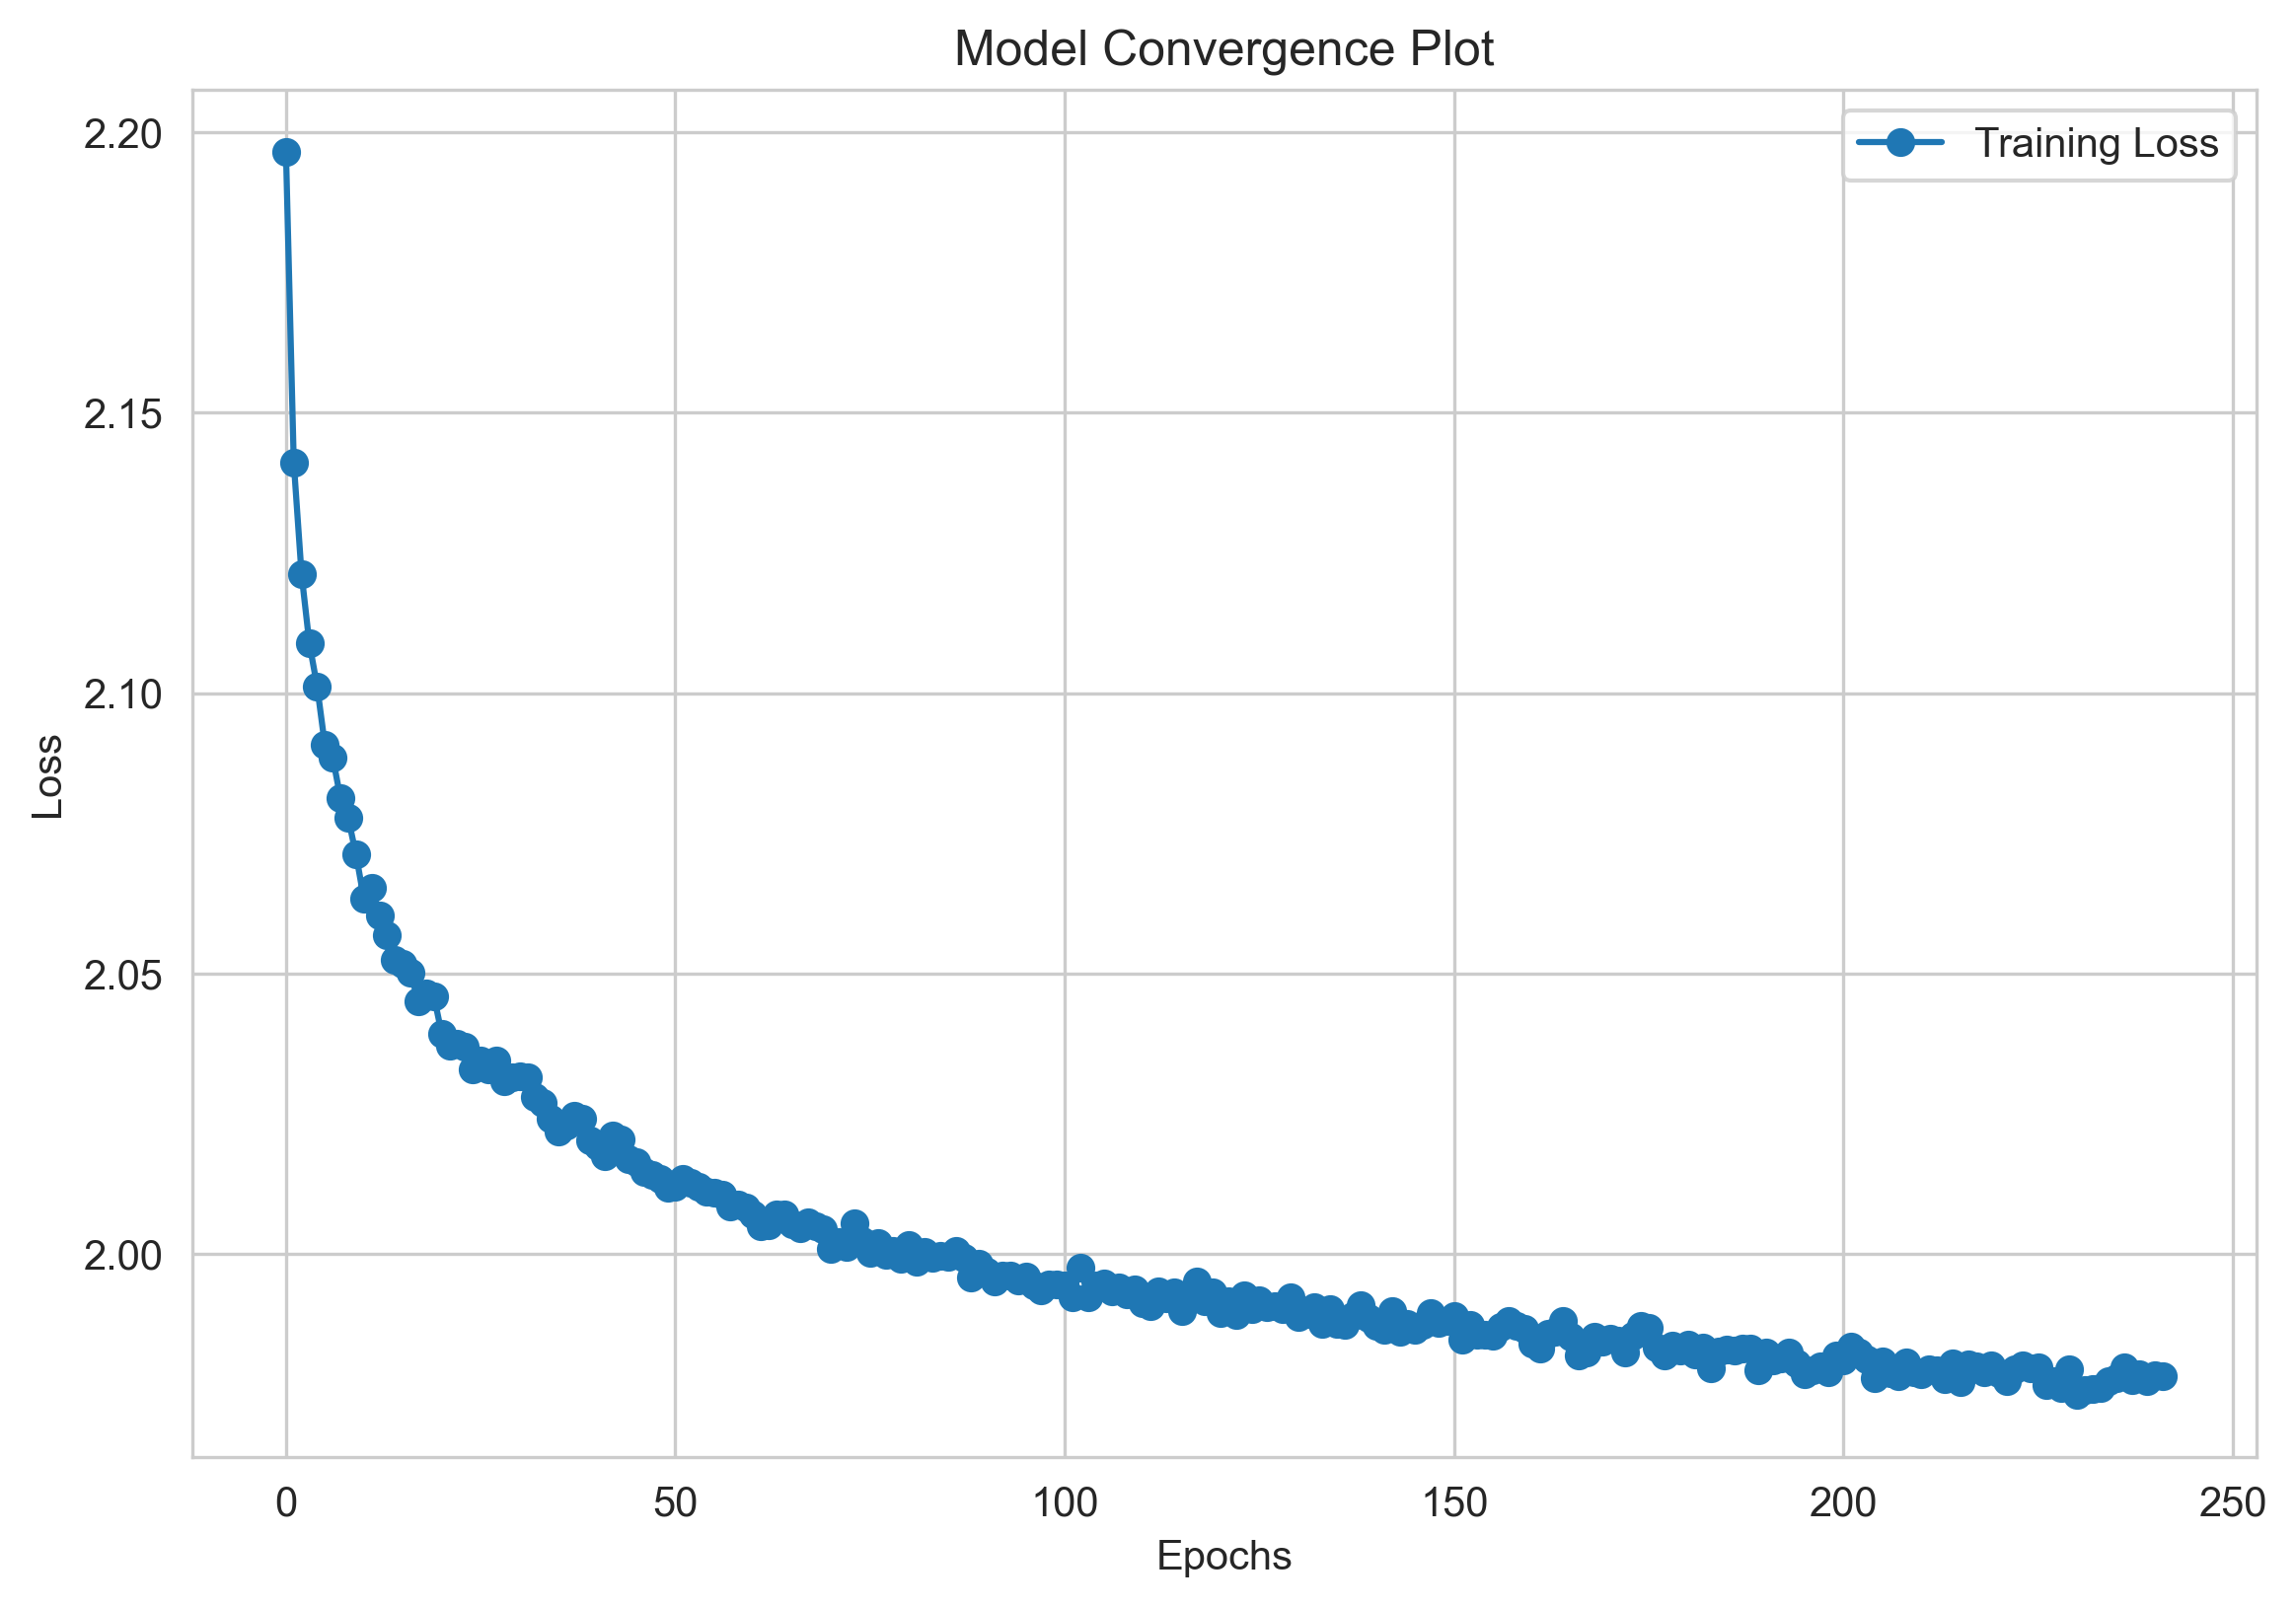

In [101]:
# plot a convergence plot to track loss across epochs during training
plt.figure(figsize=(9, 6), dpi=300)
plt.plot(mlp_model.loss_curve_, marker='o', label='Training Loss')
plt.title('Model Convergence Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

<li>Fine-Tuning</li> <a id='Fine-Tuning'></a>

In [158]:
# define the parameter grid
param_dist = {
    # model architectures
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],
    # l2 penalty parameter
    'alpha': [0.001, 0.01, 0.1],
    # learning rate schedule
    'learning_rate': ['constant', 'adaptive'],
    # initial learning rate
    'learning_rate_init': [0.001, 0.01]
}

# initialise the MLP model
mlp_model = MLPRegressor(max_iter=1000, random_state=42)

# initiate randomised search
random_search = RandomizedSearchCV(
    mlp_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring=rmsse_scorer, # use custom RMSSE scorer
    verbose=10,
    n_jobs=7,
    random_state=42)

# fit the randomised search to the data
random_search.fit(X_train_preprocessed, y_train)

# print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (RMSSE):", -random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 2/10] START alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001
[CV 1/3; 2/10] END alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001;, score=-0.458 total time= 6.0min
[CV 2/3; 4/10] START alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01
[CV 2/3; 4/10] END alpha=0.1, hidden_layer_sizes=(100, 50), learning_rate=adaptive, learning_rate_init=0.01;, score=-0.447 total time= 2.6min
[CV 1/3; 5/10] START alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001
[CV 1/3; 5/10] END alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate=constant, learning_rate_init=0.001;, score=-0.470 total time=12.9min
[CV 1/3; 8/10] START alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.01
[CV 1/3; 8/10] END alpha=0.01, hidden_layer_sizes=(50,), learning_rate

In [118]:
# define best parameters from the search
best_params = {
    'hidden_layer_sizes': (100, 50),
    'alpha': 0.1,
    'learning_rate': 'adaptive',
    'learning_rate_init': 0.01
}

# update the model with best parameters
mlp_model_best = MLPRegressor(max_iter=1000, random_state=42, **best_params)

<li>Time Series Cross-Validation</li> <a id='Time_Series_Cross-Validation'></a>

In [116]:
# set 5-fold time series cross-validation
n_splits = 5

# initialize a list to collect the RMSSE scores for each fold
rmsse_scores = []

for model_clone, X_train_fold, y_train_fold, X_val_fold, y_val_fold in time_series_cv(mlp_model_best, X_train_preprocessed, y_train, n_splits):
    # make predictions on the validation fold
    val_preds = model_clone.predict(X_val_fold)
    
    # evaluate the model using RMSSE
    fold_rmsse_score = rmsse(y_val_fold, val_preds, y_train_fold[-len(y_val_fold):])
    rmsse_scores.append(fold_rmsse_score)
    print(f"Validation fold RMSSE: {fold_rmsse_score:.4f}")

# calculate and print the average RMSSE across all folds
average_rmsse = np.mean(rmsse_scores)
print(f"\nAverage RMSSE across {n_splits} folds: {average_rmsse:.4f}")

Validation fold RMSSE: 0.4693
Validation fold RMSSE: 0.4741
Validation fold RMSSE: 0.4500
Validation fold RMSSE: 0.4220

Average RMSSE across 5 folds: 0.4538


In [119]:
# calculate the standard deviation of RMSSE across all folds
std_dev_rmsse = np.std(rmsse_scores)
print(f"Standard Deviation of RMSSE across {n_splits} folds: {std_dev_rmsse:.4f}")

# calculate the coefficient of variation of RMSSE
cv_rmsse = std_dev_rmsse / average_rmsse if average_rmsse != 0 else float('inf')  # avoid division by zero
print(f"Coefficient of Variation of RMSSE across {n_splits} folds: {cv_rmsse:.4f}")

Standard Deviation of RMSSE across 5 folds: 0.0205
Coefficient of Variation of RMSSE across 5 folds: 0.0452


<li>Model Testing</li> <a id='Model Testing'></a>

In [119]:
# fit the best model
mlp_model_best.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = mlp_model_best.predict(X_test_preprocessed)

# Evaluate the model using RMSSE
rmsse_score = rmsse(y_test, y_pred, y_train[-len(y_test):])
print(f"Testing RMSSE: {rmsse_score:.4f}")

Testing RMSSE: 0.5383


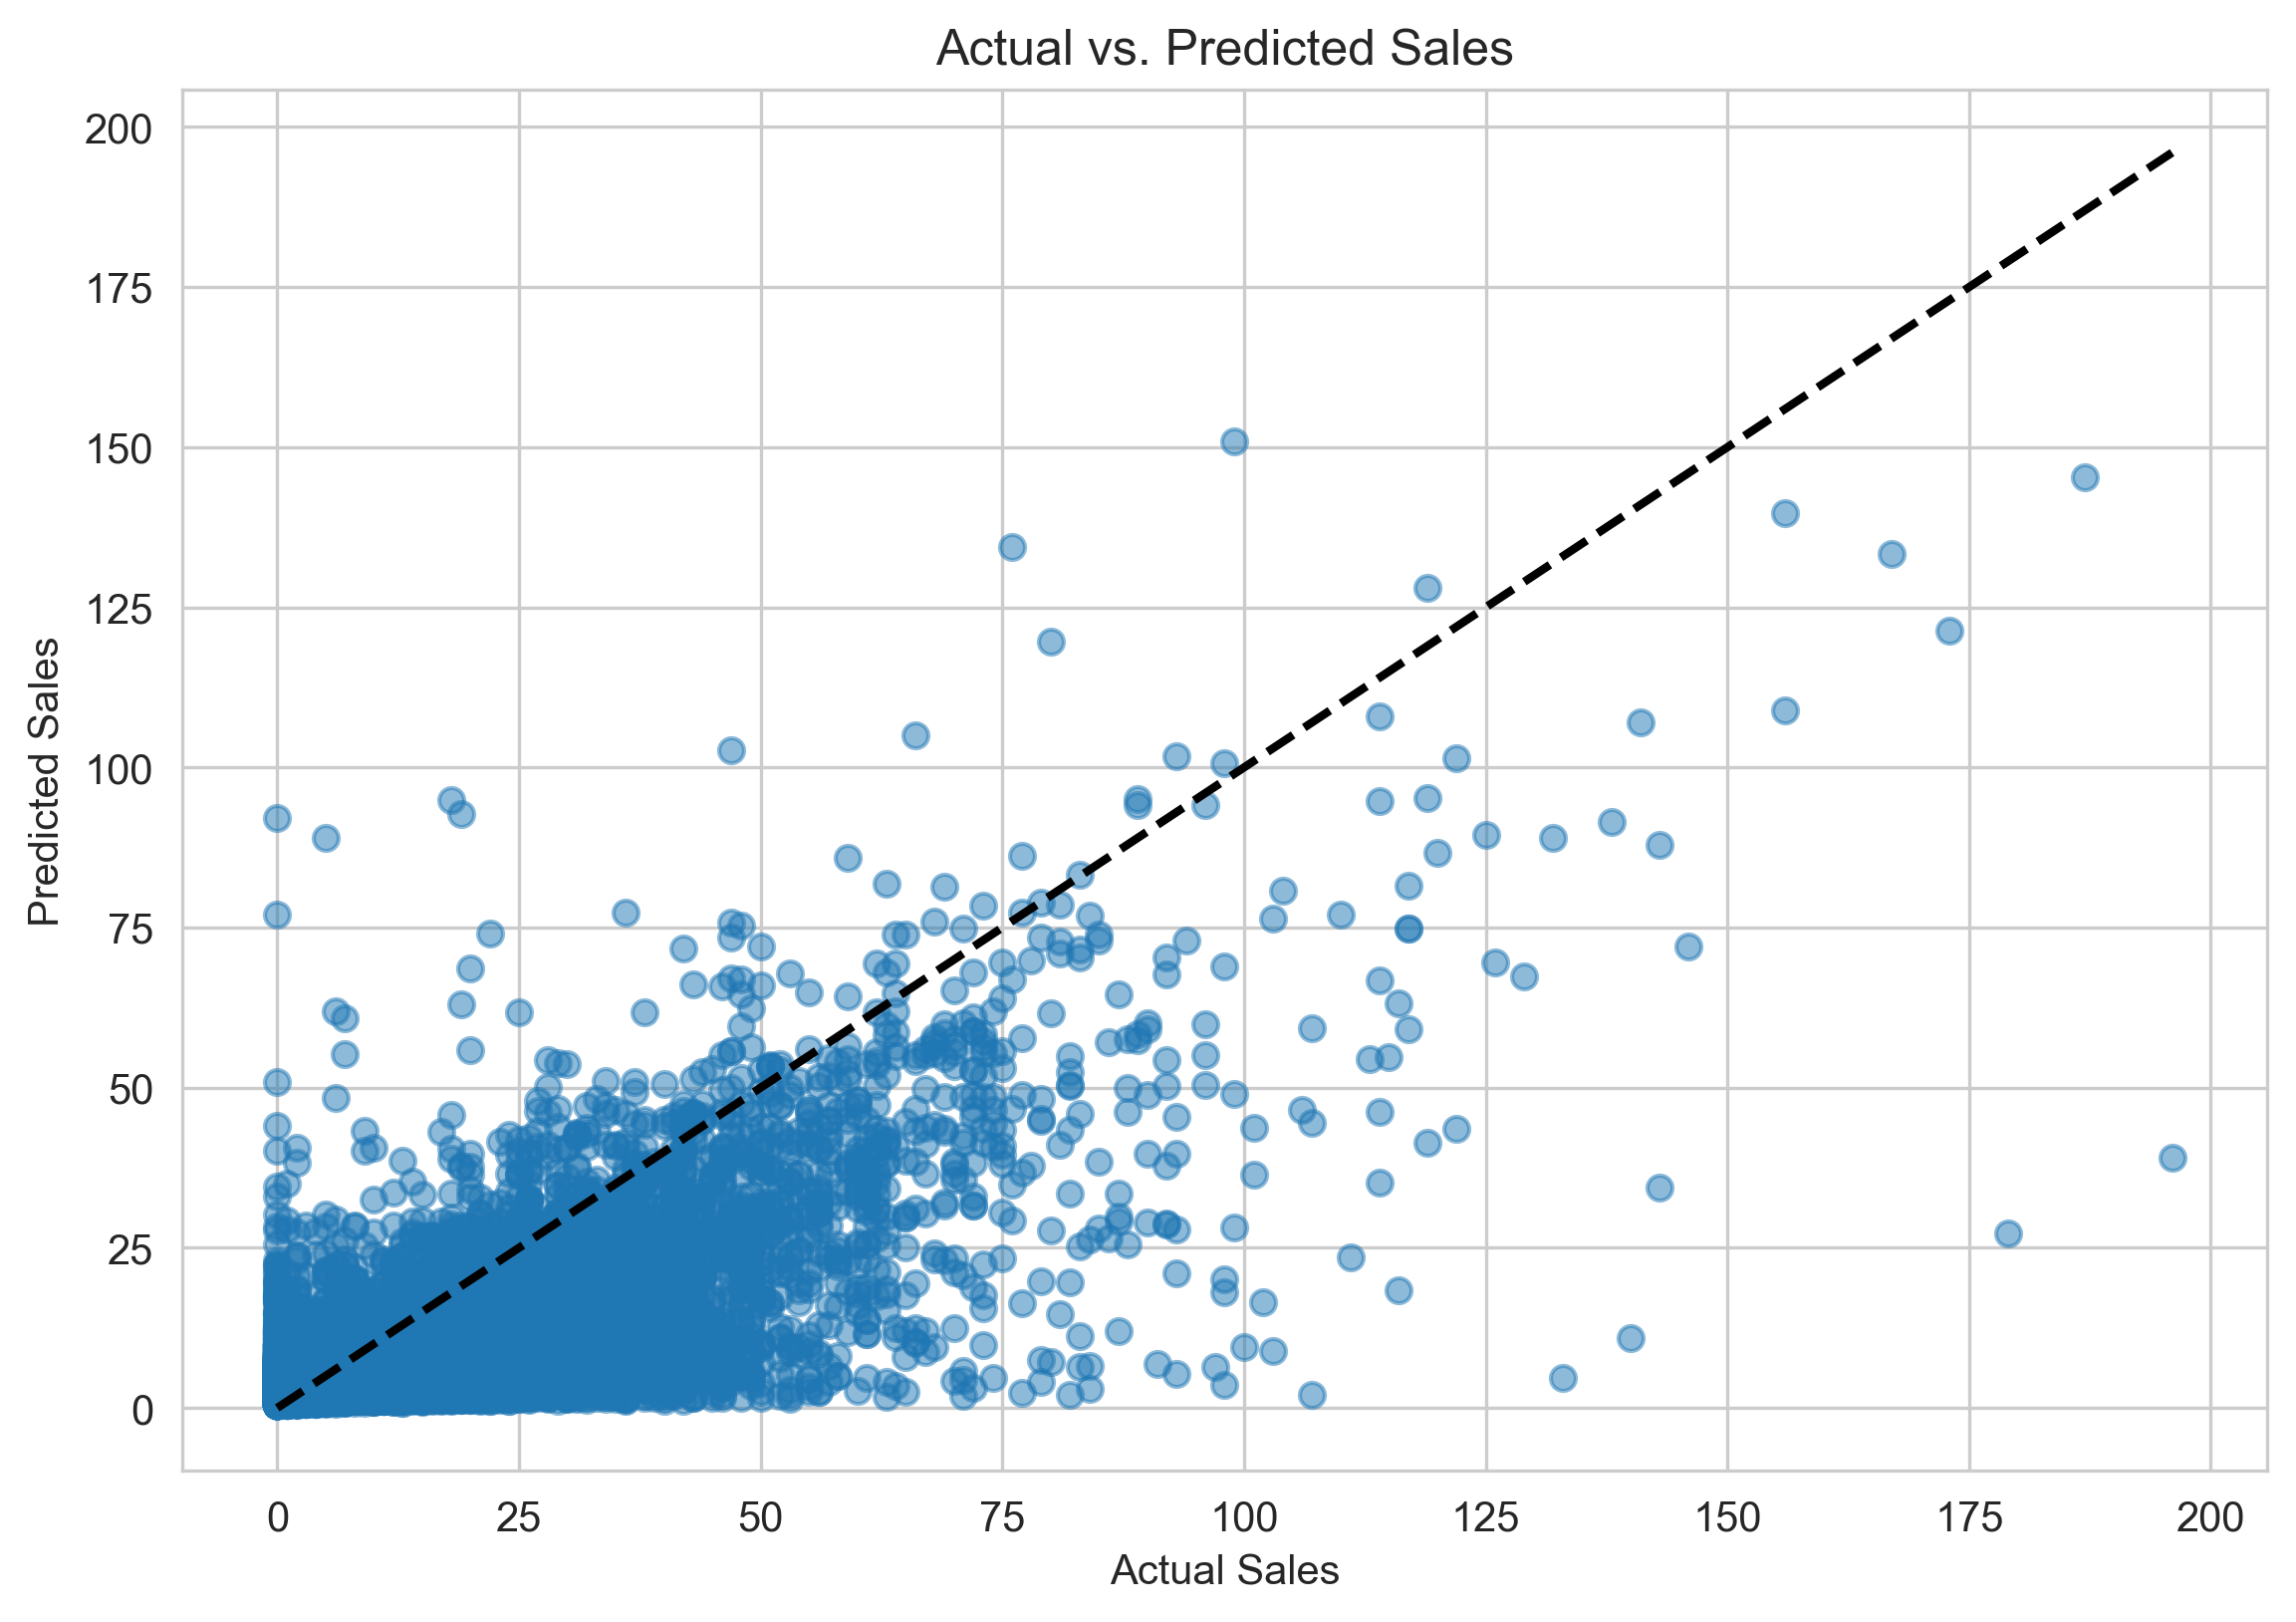

In [102]:
# plot the actual sales values against predictions to assess model performance
plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # line representing perfect predictions
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

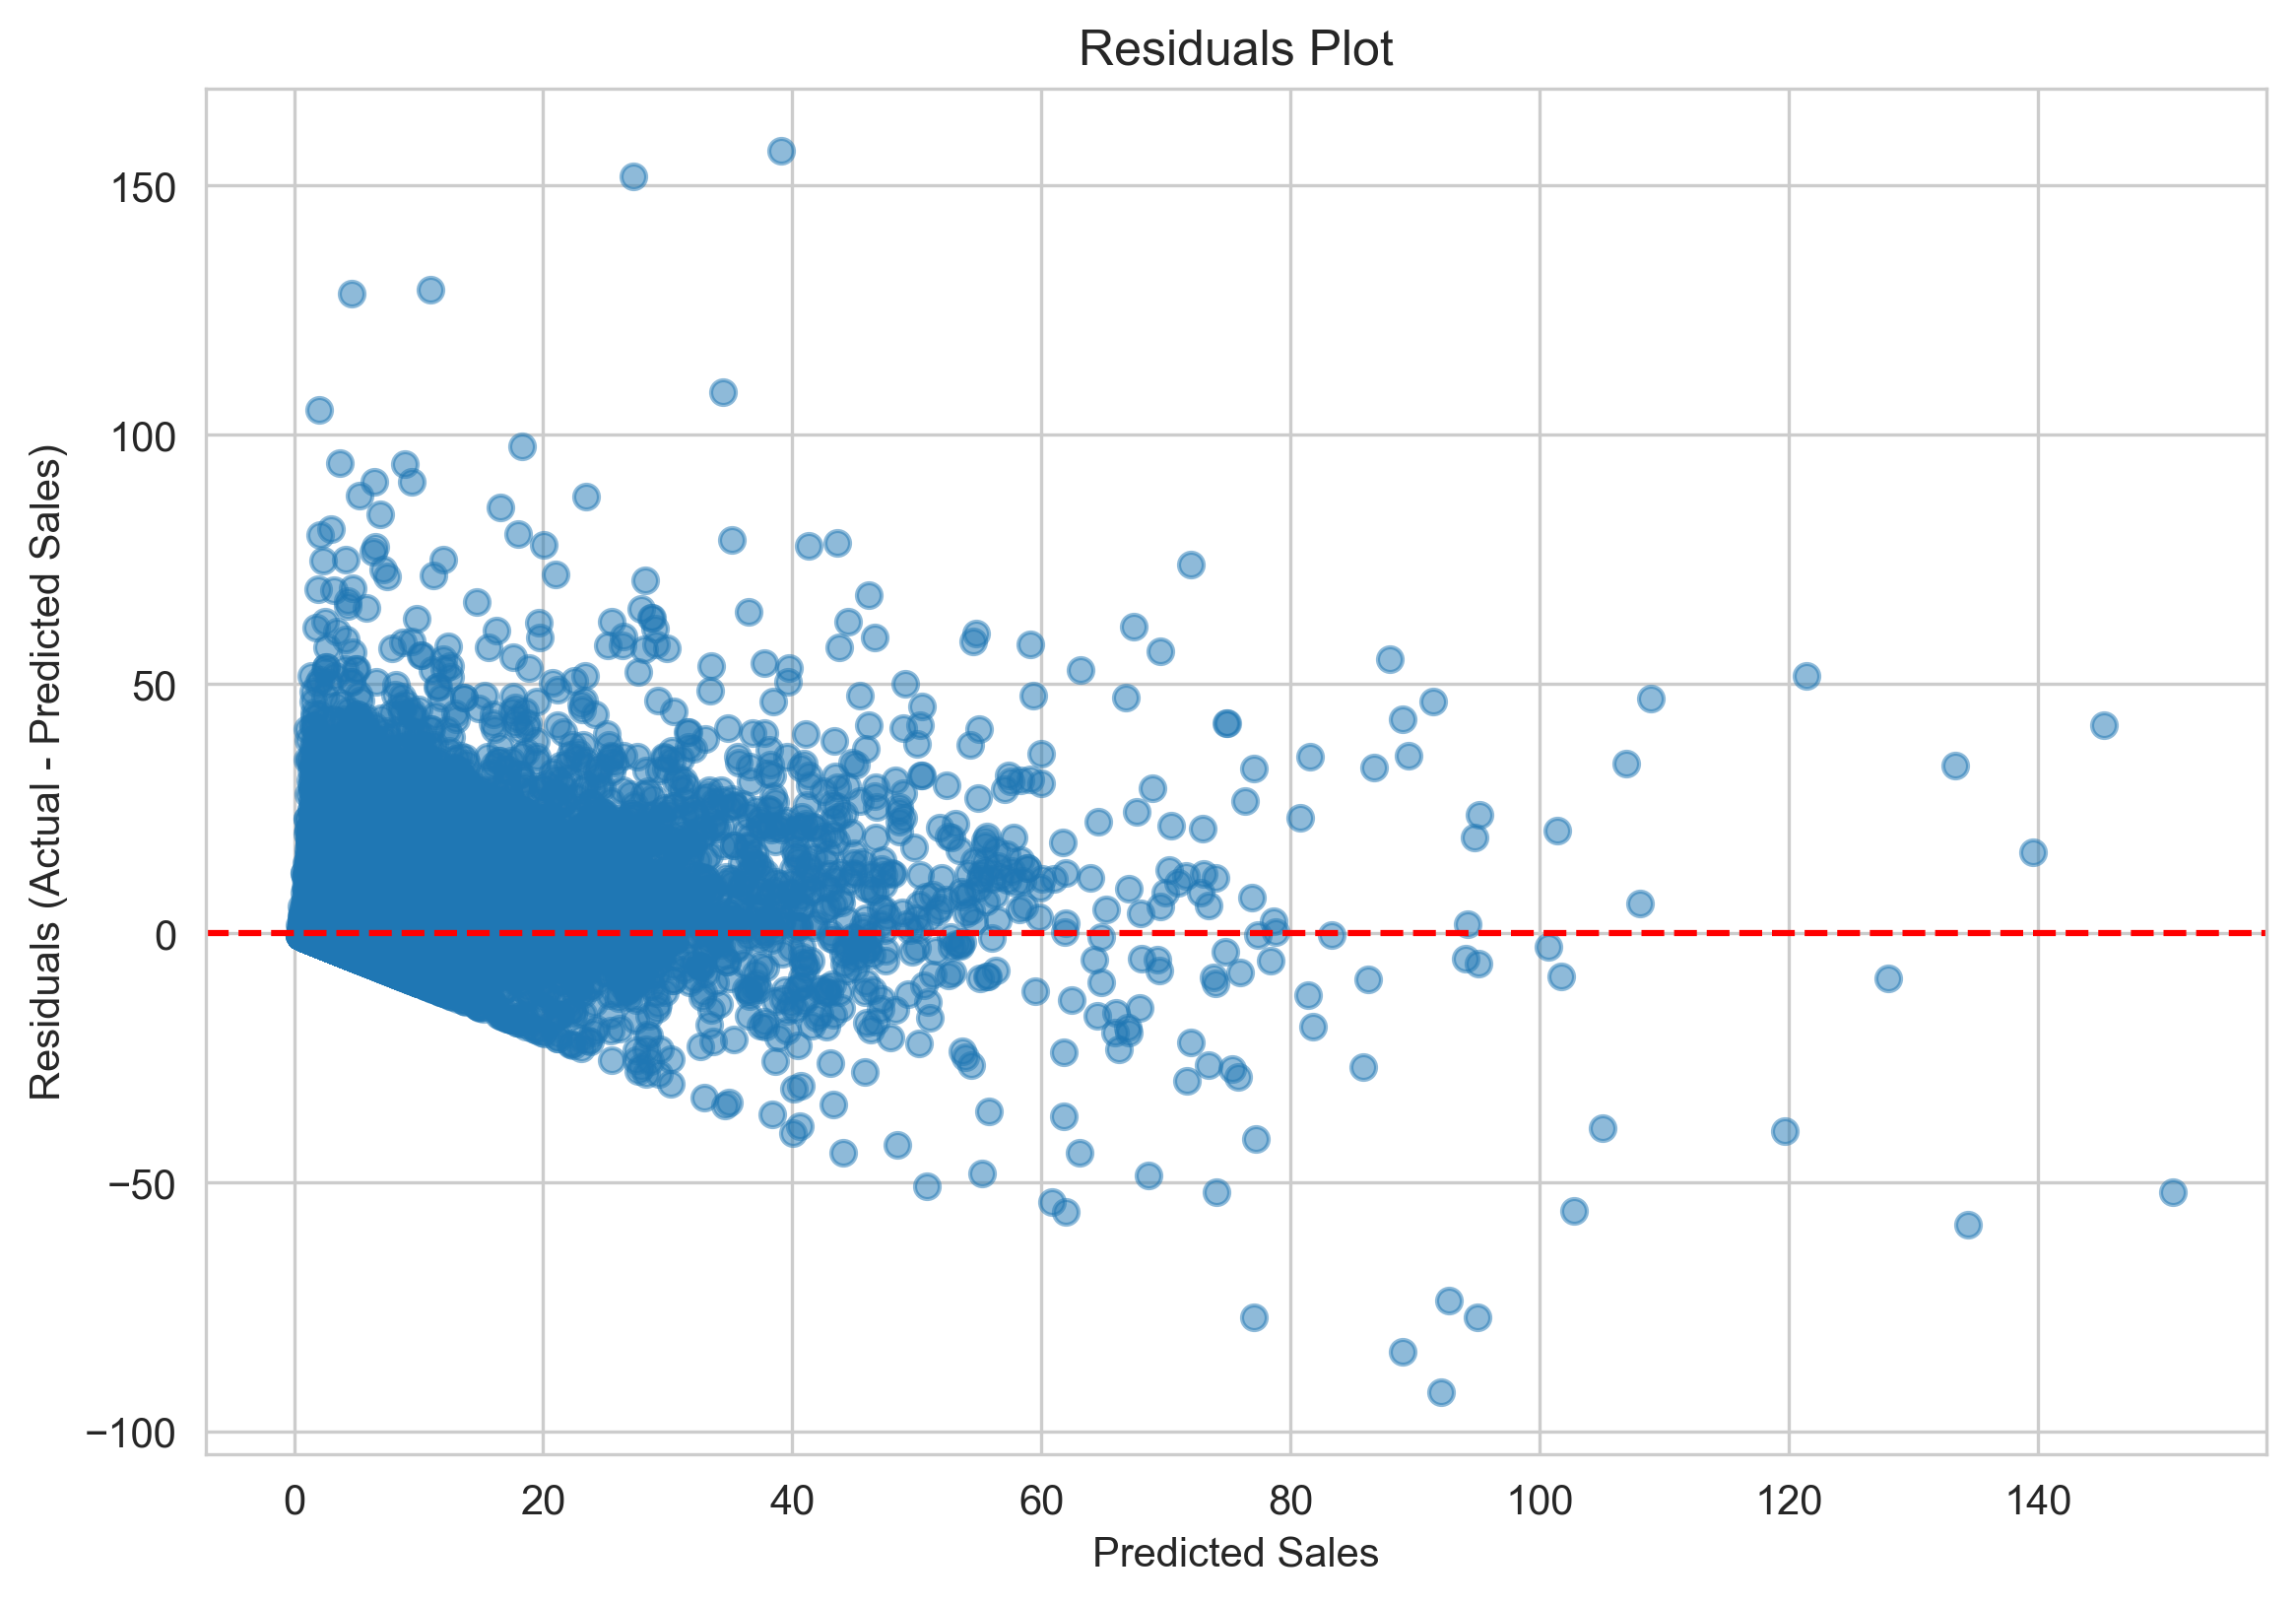

In [121]:
# plot the residuals to check heteroscedasticity
residuals = y_test - y_pred

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted Sales)')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

<hr>
<hr>

## References <a id='References'></a>

Larose, D.T. (2015). <i>Data Mining and Predictive Analytics.</i> John Wiley & Sons.

Géron, A. (2017). <i>Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.</i> O’Reilly Media, Inc.

Abbott, D. (2014). <i>Applied Predictive Analytics: Principles and Techniques for the Professional Data Analyst.</i> John Wiley & Sons.

Kumar, V. and Garg, M.L. (2018). Predictive Analytics: A Review of Trends and Techniques. <i>International Journal of Computer Applications</i>, 182(1), pp.31-37.

Kaggle. (2020). M5 Forecasting - Accuracy. Available at: [https://www.kaggle.com/competitions/m5-forecasting-accuracy](https://www.kaggle.com/competitions/m5-forecasting-accuracy) [Accessed 3 February 2024].

Hamilton, J.D. (2020). <i>Time Series Analysis.</i> Princeton University Press.

Shumway, R.H. and Stoffer, D.S. (2000). <i>Time Series Analysis and Its Applications</i> (Vol. 3). New York: Springer. 

Wei, W.W.S. (2013). Time Series Analysis, in Todd D. Little (ed.), <i>The Oxford Handbook of Quantitative Methods in Psychology: Vol. 2: Statistical Analysis</i>, Oxford Library of Psychology

Bradlow, E.T., Gangwar, M., Kopalle, P. and Voleti, S. (2017). The Role of Big Data and Predictive Analytics in Retailing. <i>Journal of retailing</i>, 93(1), pp.79-95.

Chu, C.W. and Zhang, G.P. (2003). A Comparative Study of Linear and Nonlinear Models for Aggregate Retail Sales Forecasting. <i>International Journal of Production Economics</i>, 86(3), pp.217-231.

Fildes, R., Ma, S. and Kolassa, S. (2022). Retail Forecasting: Research and Practice. <i>International Journal of Forecasting</i>, 38(4), pp.1283-1318.

Tukey, J.W. (1977). <i>Exploratory Data Analysis</i> (Vol. 2, pp.131-160).

Behrens, J.T. (1997). Principles and Procedures of Exploratory Data Analysis. <i>Psychological methods</i>, 2(2), pp.131.

Myatt, G.J. (2007). <i>Making Sense of Data: A Practical Guide to Exploratory Data Analysis and Data Mining.</i> John Wiley & Sons.

Famili, A., Shen, W.M., Weber, R. and Simoudis, E. (1997). Data Preprocessing and Intelligent Data Analysis. <i>Intelligent data analysis</i>, 1(1), pp.3-23.

Kotsiantis, S.B., Kanellopoulos, D. and Pintelas, P.E. (2006). Data Preprocessing for Supervised Leaning. <i>International journal of computer science</i>, 1(2), pp.111-117.

Bernard, J., Hutter, M., Reinemuth, H., Pfeifer, H., Bors, C. and Kohlhammer, J. (2019), Visual‐Interactive Preprocessing of Multivariate Time Series Data. In <i>Computer Graphics Forum</i>, 38(3), pp.401-412.

Wu, C.L., Chau, K.W. and Fan, C. (2010). Prediction of Rainfall Time Series using Modular Artificial Neural Networks Coupled with Data-Preprocessing Techniques. <i>Journal of hydrology</i>, 389(1-2), pp.146-167.

Raschka, S. (2018). Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning. <i>arXiv preprint arXiv:1811.12808</i>.

Flach, P. (2019). Performance Evaluation in Machine Learning: the Good, the Bad, the Ugly, and the Way Forward. In <i>Proceedings of the AAAI conference on artificial intelligence</i>, 33(1), pp.9808-9814.

Kozak, A. and Kozak, R., 2003. Does Cross Validation Provide Additional Information in the Evaluation of Regression Models?. <i>Canadian Journal of forest research</i>, 33(6), pp.976-987.

Bergmeir, C. and Benítez, J.M. (2012). On the Use of Cross-Validation for Time Series Predictor Evaluation. <i>Information Sciences</i>, 191, pp.192-213.

Donate, J.P., Cortez, P., Sánchez, G.G. and De Miguel, A.S. (2013). Time Series Forecasting Using A Weighted Cross-Validation Evolutionary Artificial Neural Network Ensemble. <i>Neurocomputing</i>, 109, pp.27-32.

Han, Z., Zhao, J., Leung, H., Ma, K.F. and Wang, W. (2019). A Review of Deep Learning Models for Time Series Prediction. <i>IEEE Sensors Journal</i>, 21(6), pp.7833-7848.

Weigend, A.S. (2018). <i>Time Series Prediction: Forecasting the Future and Understanding the Past.</i> Routledge.

Frank, R.J., Davey, N. and Hunt, S.P. (2001). Time Series Prediction and Neural Networks. <i>Journal of intelligent and robotic systems</i>, 31, pp.91-103.

Hua, Y., Zhao, Z., Li, R., Chen, X., Liu, Z. and Zhang, H. (2019). Deep Learning with Long Dhort-Term Memory for Time Series Prediction. <i>IEEE Communications Magazine</i>, 57(6), pp.114-119.

Chandra, R., Goyal, S. and Gupta, R. (2021). Evaluation of Deep Learning Models for Multi-Step Ahead Time Series Prediction. <i>IEEE Access</i>, 9, pp.83105-83123.

Gao, Y. and Er, M.J. (2005). NARMAX Time Series Model Prediction: Feedforward and Recurrent Fuzzy Neural Network Approaches. <i>Fuzzy Sets and Systems</i>, 150(2), pp.331-350.

Wu, C.L. and Chau, K.W. (2010). Data-Driven Models for Monthly Streamflow Time Series Prediction. <i>Engineering Applications of Artificial Intelligence</i>, 23(8), pp.1350-1367.

<hr>
<hr>